#NOTE BEFORE RUNNING
To pick the execution context you desire change the following code block one time for each upgraded execution context. IE if you want to skip image generation. You may have to rerun some cells to get the class.

In [ ]:
I_WANT_TO_RERUN_ALL_CODE = True
I_DONT_WANT_TO_GENERATE_IMAGES = False #this will provide the pickles of all generated not the images
                                      #made by the output generated images section
I_WANT_ALL_AUTHOR_MODELS = False #NOTE need to rerun kmeans tests for data
I_WANT_ALL_CONTENT = False #when done turn just this one true for all data and images
!pip install gdown --upgrade
import os, shutil

def move(path):
  parent_path = os.path.dirname(path)
  for item in os.listdir(path):
    source_path = os.path.join(path, item)
    destination_path = os.path.join(parent_path, item)
    shutil.move(source_path, destination_path)
  if not os.listdir(path):
    os.rmdir(path)

if(I_WANT_TO_RERUN_ALL_CODE):
  !gdown --folder 1vi7Amt4kkVArQd3TFl8v9-QxMu5QhcfV
  folder_to_move = "/content/MNIST CSVs"
  move(folder_to_move)
if(I_DONT_WANT_TO_GENERATE_IMAGES):
  !gdown --folder 1jjI00p7INrT5XHqXyZ0si1VemmgzYkBY?usp
  folder_to_move = "/content/Adv Algs"
  move(folder_to_move)
if(I_WANT_ALL_AUTHOR_MODELS):
  !gdown --folder 1LTiBe6o0kX_u538wz4LuKGQPZboQ8YWG
  folder_to_move = "/content/All Models"
  move(folder_to_move)
if(I_WANT_ALL_CONTENT):
  !gdown --folder
  folder_to_move = "/content/All Content"
  move(folder_to_move)

Retrieving folder contents
Processing file 1BPJ6TE8snxHAZdor0YgQrG3KjDFf1v2Q logisticMulticlassData.pkl
Processing file 1EeOiQxoYbYouoNJ7-Nk4IlsUf9yR-2lQ logisticBinaryModel.pkl
Processing file 1QsGR-PlwdkIj4c13DXgVt-pCQmON0VRl logisticClassModel.pkl
Processing file 1qBxxvllJOxIQivAGceL20jfWe6GMfDWn logisticBinaryData.pkl
Processing file 1wfz49YfL9FrqCK1e7tawYO6hwlzvCzLh cnnClassModel.pkl
Processing file 1SQ8tVC56BN5ikRllkE39pkIf8yuO9px1 kmeansBinaryModel.pkl
Processing file 1VEaoyoBVsR02sFykuDKCZ0O_BJoj_7gF cnnBinaryData.pkl
Processing file 1ofsGHHKwTRmOf_SbDYb-3KAUDtDXbIfy randomForestMulticlassData.pkl
Processing file 1LSLlfeKocIEXa6qE_3zzxnnibJuR2kuK cnnMulticlassData.pkl
Processing file 1gKlC--5SpAN3CISDfpNdpePM0GloBqY_ randomForestBinaryModel.pkl
Processing file 1vnXQfj7XvJXbwoo_AjVasTGvxdWPdywD randomForestBinaryData.pkl
Processing file 1z1p7rqqFWjxbUIyVPWK-of9aWlARQbi- randomForestClassModel.pkl
Processing file 1_cnVdN7NZOzGS82qDsaYNWsFN8wK2XeR cnnBinaryModel.pkl
Processing fil

If you want to download any of the content for yourself set this boolean to true to download the content folder in its entirety.

In [ ]:
I_WANT_TO_DOWNLOAD_CONTENT = False

def downloadAll():
  !zip -r /content.zip /content
  from google.colab import files
  files.download("/content.zip")

if(I_WANT_TO_DOWNLOAD_CONTENT):
  downloadAll()

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2025.04.16/ (stored 0%)
  adding: content/.config/logs/2025.04.16/13.40.10.090744.log (deflated 57%)
  adding: content/.config/logs/2025.04.16/13.39.57.291033.log (deflated 86%)
  adding: content/.config/logs/2025.04.16/13.39.18.062772.log (deflated 92%)
  adding: content/.config/logs/2025.04.16/13.39.48.364195.log (deflated 58%)
  adding: content/.config/logs/2025.04.16/13.40.01.202474.log (deflated 58%)
  adding: content/.config/logs/2025.04.16/13.40.10.795692.log (deflated 56%)
  adding: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.l

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model And Base Data Initialization + Training

## Model Class
This is the Convolutionarty Neural Network(CNN) that the adversaries will be developed against. Initializes 120 input layer, 84 midddle, 10 output. Window size is 4x4 step size 5. Uses simple forward propegation as in forward() method. Gradient method outputs gradient necesarry for all gradient descents. Predict() ensures input image is correct form and softmaxes output.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

class SimpleNN(nn.Module):
    """A simple two-layer neural network."""

    def __init__(self):
        super(SimpleNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        c1 = F.relu(self.conv1(x))
        s2 = F.max_pool2d(c1, (2, 2))
        c3 = F.relu(self.conv2(s2))
        s4 = F.max_pool2d(c3, 2)
        s4 = torch.flatten(s4, 1)
        f5 = F.relu(self.fc1(s4))
        f6 = F.relu(self.fc2(f5))
        output = self.fc3(f6)
        return output

    def predict(self, x):
        with torch.no_grad():
            x = x.reshape(-1, 1, 28, 28)
            x = torch.tensor(x, dtype=torch.float32)
            output = self(x)
            return torch.softmax(output, dim=1).detach().numpy()

    def gradient(self, x, y):
        x = torch.tensor(x, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.long)
        self.eval()
        x.requires_grad = True
        output = self(x)
        loss = F.cross_entropy(output, y)
        self.zero_grad()
        loss.backward()
        return x.grad.numpy()

##Train Class on Loaded MNIST CSVs
First we load both the MNIST training testing CSVs and relabel the dataframe to match the desired labels. Then we normalize our training data, create our tensor dataset with the normalized data, and train the model on our device. Finally szve all all files including the final model as a pickel

In [ ]:
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pickle
#from model import SimpleNN


#import all data and create their pickle files
try:
    df0 = pd.read_csv('mnist_train.csv')
    df1 = pd.read_csv('mnist_test.csv')
    columns = ['number_label'] + [f'pixel_{i}' for i in range(784)]
    df0.columns = columns
    df1.columns = columns
    df0.to_pickle('mnist_train.pkl')
    df1.to_pickle('mnist_test.pkl')
    print(df1)
except FileNotFoundError as e:
    print(f"Error loading CSV files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

try:
    with open('mnist_train.pkl', 'rb') as fid:
        mnist_train = pickle.load(fid)
except FileNotFoundError:
    print("mnist_train.pkl not found. Please ensure the file exists.")
    exit(1)



#normalize data to train on
mnist_mean = 0.1307
mnist_std = 0.3081

if mnist_train.empty or len(mnist_train.columns) != 785:
    raise ValueError("Invalid MNIST data format. Expected 785 columns (label + 784 pixels)")

X_train = mnist_train.iloc[:, 1:].values.astype(np.float32) / 255.0
X_train = (X_train - mnist_mean) / mnist_std
X_train = X_train.reshape(-1, 1, 28, 28)
y_train = mnist_train.iloc[:, 0].values.astype(np.int64)



#create data loader to train on
try:
    train_dataset = TensorDataset(
        torch.from_numpy(X_train),
        torch.from_numpy(y_train)
    )
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
except Exception as e:
    print(f"Error creating DataLoader: {e}")
    exit(1)


#init model on device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#train over 10 epochs
def train(train_loader, epochs=10):
    #Train the model with a DataLoader.
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (data, target) in enumerate(train_loader, 0):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

train(train_loader, epochs=10)

#save model
try:
    with open('model.pkl', 'wb') as fid:
        pickle.dump(model, fid)
except Exception as e:
    print(f"Error saving model: {e}")

      number_label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  \
0                2        0        0        0        0        0        0   
1                1        0        0        0        0        0        0   
2                0        0        0        0        0        0        0   
3                4        0        0        0        0        0        0   
4                1        0        0        0        0        0        0   
...            ...      ...      ...      ...      ...      ...      ...   
9994             2        0        0        0        0        0        0   
9995             3        0        0        0        0        0        0   
9996             4        0        0        0        0        0        0   
9997             5        0        0        0        0        0        0   
9998             6        0        0        0        0        0        0   

      pixel_6  pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  \
0           0 

Model loaded successfully


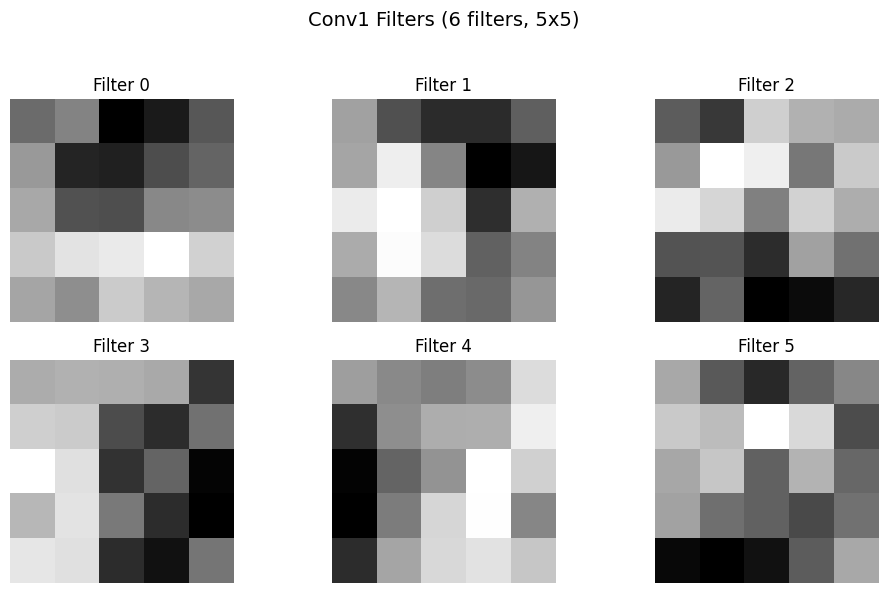

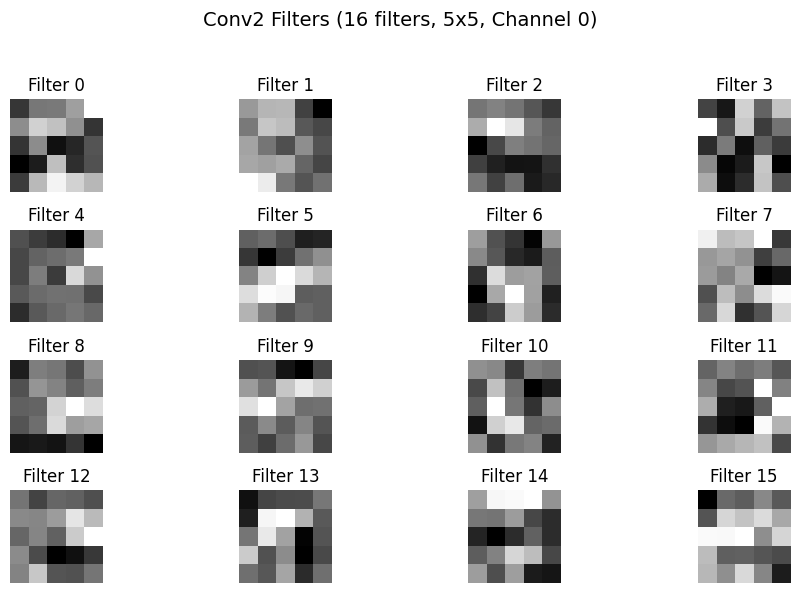

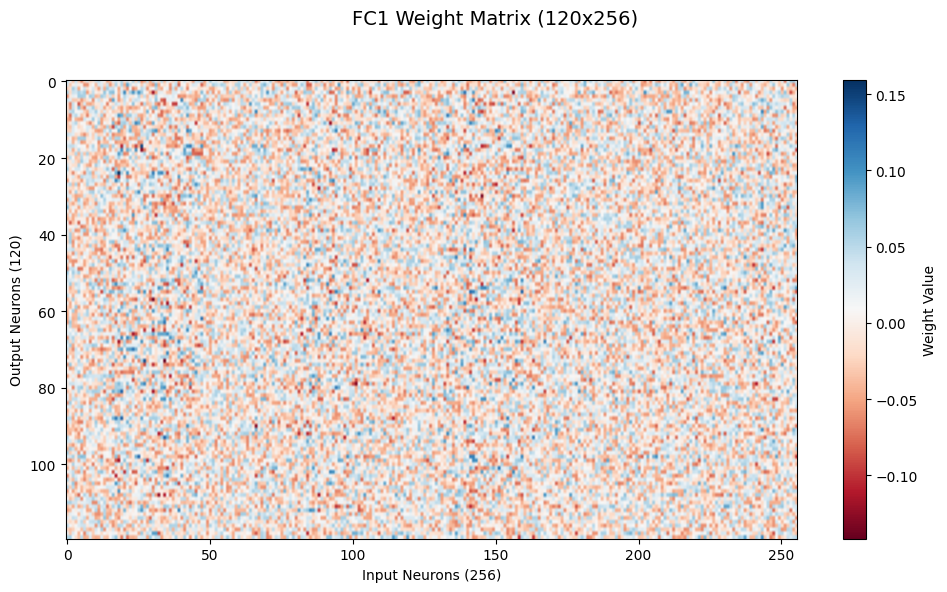

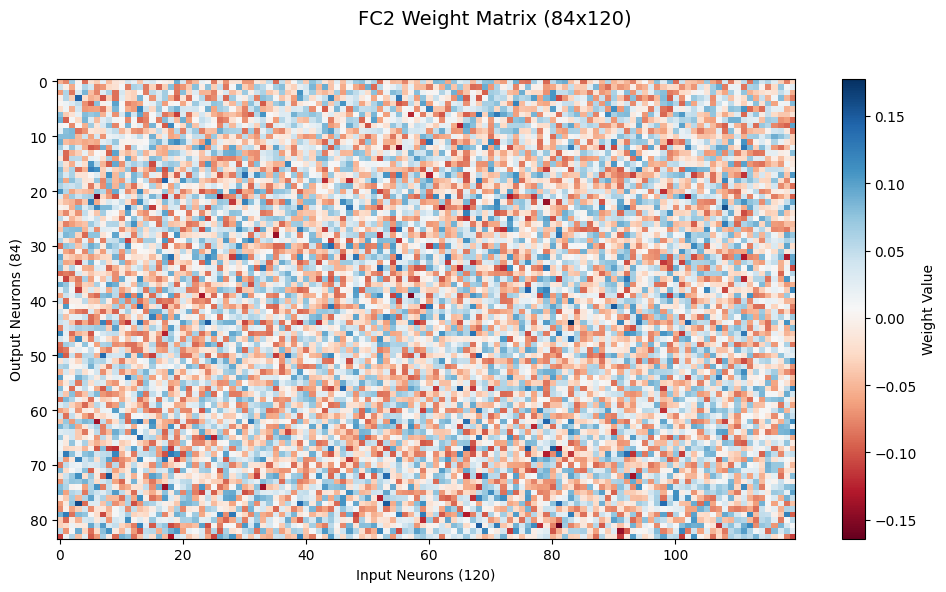

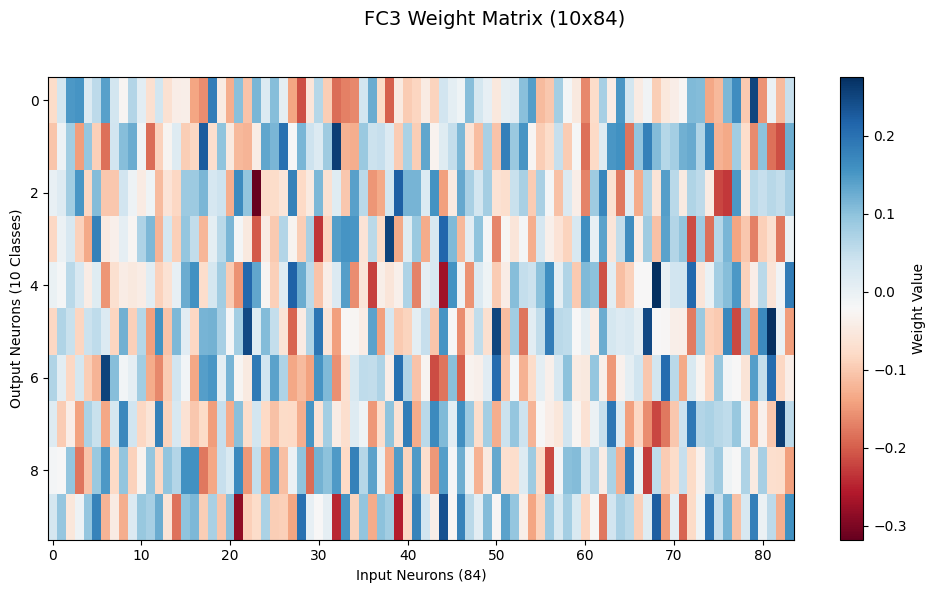

Sample image label: 6


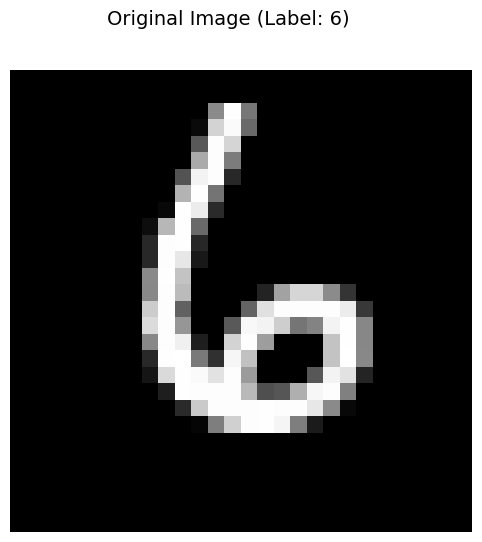

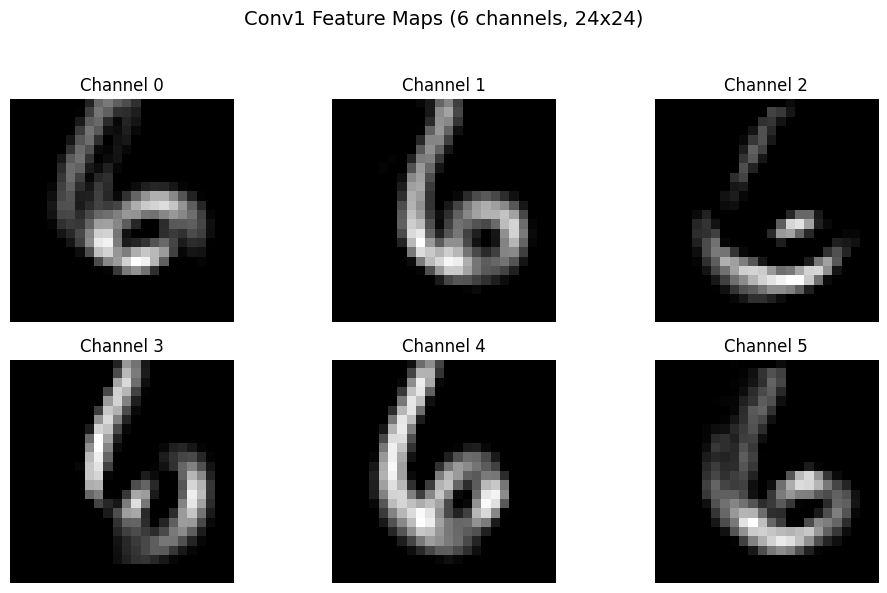

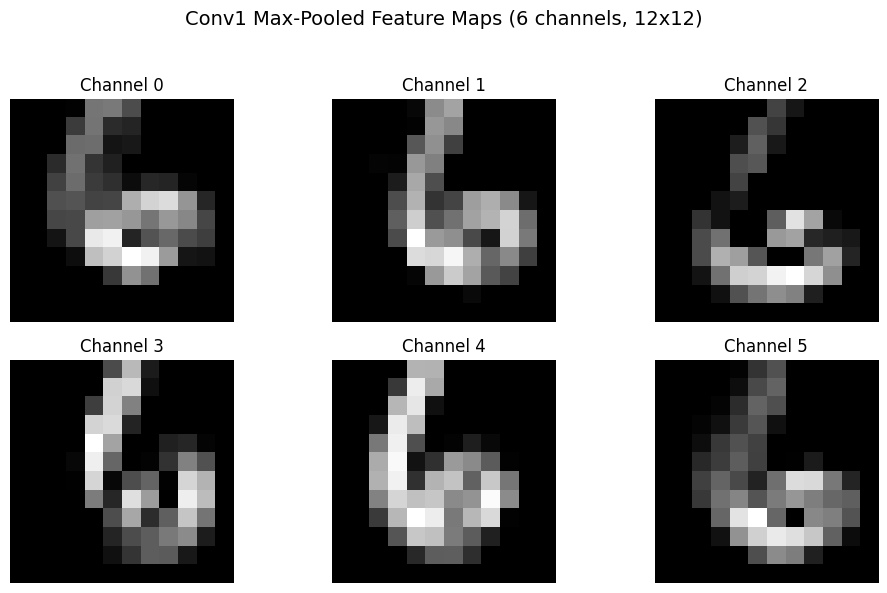

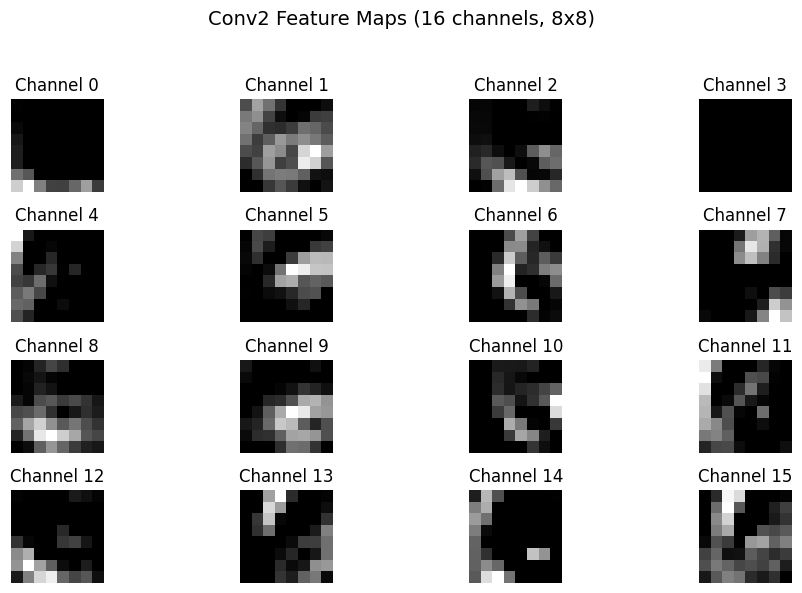

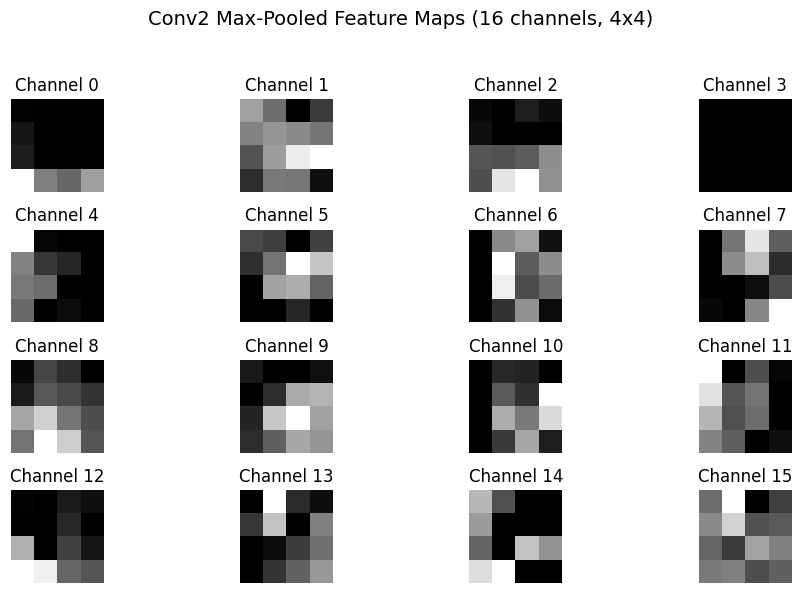

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from torch.utils.data import DataLoader, TensorDataset

# --- Step 1: Load the Trained Model ---
try:
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)
    model.eval()  # Set to evaluation mode
    print("Model loaded successfully")
except FileNotFoundError:
    print("model.pkl not found. Please ensure the model is trained and saved.")
    exit(1)
except Exception as e:
    print(f"Error loading model: {e}")
    exit(1)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# --- Step 2: Load MNIST Test Data for Feature Maps ---
try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
except FileNotFoundError:
    print("mnist_test.pkl not found. Please ensure the file exists.")
    exit(1)

# Normalize test data (same as training)
mnist_mean = 0.1307
mnist_std = 0.3081
X_test = mnist_test.iloc[:, 1:].values.astype(np.float32) / 255.0
X_test = (X_test - mnist_mean) / mnist_std
X_test = X_test.reshape(-1, 1, 28, 28)  # Shape: [n_samples, 1, 28, 28]
y_test = mnist_test.iloc[:, 0].values.astype(np.int64)

# Create DataLoader for a single sample
test_dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# --- Step 3: Visualize Convolutional Filters ---
# Extract weights
conv1_filters = model.conv1.weight.detach().cpu().numpy()  # Shape: [6, 1, 5, 5]
conv2_filters = model.conv2.weight.detach().cpu().numpy()  # Shape: [16, 6, 5, 5]

# Plot conv1 filters (6 filters)
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Filters (6 filters, 5x5)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    filter_img = conv1_filters[i, 0]  # Shape: [5, 5]
    plt.imshow(filter_img, cmap='gray')
    plt.title(f"Filter {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 filters (16 filters, show first channel)
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Filters (16 filters, 5x5, Channel 0)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    filter_img = conv2_filters[i, 0]  # Shape: [5, 5]
    plt.imshow(filter_img, cmap='gray')
    plt.title(f"Filter {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Step 4: Visualize Fully Connected Layer Weights ---
# Extract weights
fc1_weights = model.fc1.weight.detach().cpu().numpy()  # Shape: [120, 256]
fc2_weights = model.fc2.weight.detach().cpu().numpy()  # Shape: [84, 120]
fc3_weights = model.fc3.weight.detach().cpu().numpy()  # Shape: [10, 84]

# Plot fc1 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC1 Weight Matrix (120x256)", fontsize=14)
plt.imshow(fc1_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (256)")
plt.ylabel("Output Neurons (120)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot fc2 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC2 Weight Matrix (84x120)", fontsize=14)
plt.imshow(fc2_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (120)")
plt.ylabel("Output Neurons (84)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot fc3 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC3 Weight Matrix (10x84)", fontsize=14)
plt.imshow(fc3_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (84)")
plt.ylabel("Output Neurons (10 Classes)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Step 5: Visualize Feature Maps for a Sample Image ---
# Get a single test image
data_iter = iter(test_loader)
sample_image, sample_label = next(data_iter)
sample_image = sample_image.to(device)  # Shape: [1, 1, 28, 28]
sample_label = sample_label.item()
print(f"Sample image label: {sample_label}")

# Forward pass through conv1 and conv2
with torch.no_grad():
    c1 = F.relu(model.conv1(sample_image))  # Shape: [1, 6, 24, 24]
    s2 = F.max_pool2d(c1, (2, 2))  # Shape: [1, 6, 12, 12]
    c3 = F.relu(model.conv2(s2))  # Shape: [1, 16, 8, 8]
    s4 = F.max_pool2d(c3, 2)  # Shape: [1, 16, 4, 4]

# Move to CPU and convert to numpy
c1 = c1.cpu().numpy().squeeze(0)  # Shape: [6, 24, 24]
s2 = s2.cpu().numpy().squeeze(0)  # Shape: [6, 12, 12]
c3 = c3.cpu().numpy().squeeze(0)  # Shape: [16, 8, 8]
s4 = s4.cpu().numpy().squeeze(0)  # Shape: [16, 4, 4]

# Plot original image
plt.figure(figsize=(10, 6))
plt.suptitle(f"Original Image (Label: {sample_label})", fontsize=14)
plt.imshow(sample_image.cpu().numpy().squeeze(), cmap='gray')
plt.axis('off')
plt.show()

# Plot conv1 feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Feature Maps (6 channels, 24x24)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(c1[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv1 max-pooled feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Max-Pooled Feature Maps (6 channels, 12x12)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(s2[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Feature Maps (16 channels, 8x8)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(c3[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 max-pooled feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Max-Pooled Feature Maps (16 channels, 4x4)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(s4[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##Validate CNN
Here we do some simple testing with complete MNIST testing data on our CNN from before

In [ ]:
with open('mnist_test.pkl', 'rb') as fid:
    mnist_test = pickle.load(fid)
with open('model.pkl', 'rb') as fid:
    model = pickle.load(fid)

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)

correct = 0
total = 9999
class_counts = np.zeros(10)
class_correct = np.zeros(10)
for i in range(total):
  x = normalize(mnist_test.iloc[i, 1:].values)
  y = int(mnist_test.iloc[i, 0])
  class_counts[y] += 1
  label = np.argmax(model.predict(x))
  if label == y:
    correct += 1
    class_correct[y] += 1
print(correct/total)
print(class_correct/class_counts)

0.9846984698469847
[0.99489796 0.99207048 0.98643411 0.99207921 0.99185336 0.97982063
 0.98016701 0.98149951 0.97125257 0.97522299]


#Adversarial Image Handling
All output dataframes get saved as a pickel

##Image Generation

###Fast Gradient Sign Method Untargeted Attack
Using the FGSM untargeted attack, we generate adversarial images by normalizing data and adding the gradient of the current image with respect to the initial class multiplied by some epsilon until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def fgsmun(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])

        probabilities = model.predict(x)
        epsilon = 0.0075
        max_iterations = 200
        iteration = 0
        while (np.argmax(probabilities) == y[0] and iteration < max_iterations):
            gradients = model.gradient(x, y)
            if gradients is None:
                break
            x = x + epsilon * np.sign(gradients)
            probabilities = model.predict(normalize(unnormalize(x)))
            iteration += 1

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration
        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    FGSMUntargeted = fgsmun(mnist_test[:400], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    FGSMUntargeted.to_pickle('fgsmun_train.pkl')

    print("testing data")
    start_time = time.time()
    FGSMUntargeted = fgsmun(mnist_test[6400:6500], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    FGSMUntargeted.to_pickle('fgsmun_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 62.9425
Number failed to misclassify: 0
Number started misclassified: 4
Create training data execution time: 599.74 seconds
testing data
Average iterations to end: 68.25
Number failed to misclassify: 0
Number started misclassified: 0
Create testing data execution time: 155.14 seconds


###Fast Gradient Sign Method Targeted Attack
Using the FGSM Targeted attack, we generate adversarial images by normalizing data and subtracting the gradient of the current image with respect to the 0th class multiplied by some epsilon until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def fgsmtar(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])

        probabilities = model.predict(x)
        epsilon = 0.0075
        max_iterations = 200
        iteration = 0

        while (np.argmax(probabilities) != 0 and iteration < max_iterations):
            gradients = model.gradient(x, np.array([0]))
            if gradients is None:
                break
            x = x - epsilon * np.sign(gradients)
            probabilities = model.predict(normalize(unnormalize(x)))
            iteration += 1

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration

        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    FGSMtargeted = fgsmtar(mnist_test[400:800], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    FGSMtargeted.to_pickle('fgsmtar_train.pkl')

    print("testing data")
    start_time = time.time()
    FGSMtargeted = fgsmtar(mnist_test[6500:6600], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    FGSMtargeted.to_pickle('fgsmtar_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 110.4975
Number failed to misclassify: 1
Number started misclassified: 39
Create training data execution time: 665.48 seconds
testing data
Average iterations to end: 98.63
Number failed to misclassify: 0
Number started misclassified: 11
Create testing data execution time: 163.72 seconds


###DeepFool Untargeted Attack
Using the DeepFool Untargeted attack, we generate adversarial images by subtracting the gradient of the current image with respect to the initial class from the gradient of the current iamge with respect to all classes to form an array of gradient differences. We then do the same subtracting the original classes probability from the probability of every other class. Now for all classes which are not the original class you divide the absolute value of the diffence in probabilties of each class by the L2 norm of the gradient difference. Finally multiply the minimum result of that operation by the gradient difference and subtract it from the image. Do this until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def dfun(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])
        probabilities = model.predict(normalize(unnormalize(x)))
        curClass = np.argmax(probabilities)

        if(curClass != y[0]):
            startsMisclassified += 1
            retData.iloc[i, 0] = y[0]
            retData.iloc[i, 1:] = unnormalize(x)
            continue

        iteration = 0
        max_iterations = 200
        while (curClass == y[0] and iteration < max_iterations):
            w = [None] * 10
            f = np.zeros(10)
            for z in range(10):
                if z != y[0]:
                    w[z] = model.gradient(x, np.array([z])) - model.gradient(x, y)
                    f[z] = probabilities[0, z] - probabilities[0, (y[0])]
            valid = [j for j in range(10) if j != y[0]]
            distances = [abs(f[j]) / np.linalg.norm(w[j]) for j in valid]
            k = np.argmin(distances)
            if(k >= y[0]):
                k+=1
            r = (abs(f[k]) / np.linalg.norm(w[k]) + 1e-4) * w[k]
            x = x - r
            iteration += 1
            probabilities = model.predict(normalize(unnormalize(x)))
            curClass = np.argmax(probabilities)

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration

        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    DeepFoolUntargeted = dfun(mnist_test[800:1200], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    DeepFoolUntargeted.to_pickle('dfun_train.pkl')

    print("testing data")
    start_time = time.time()
    DeepFoolUntargeted = dfun(mnist_test[6600:6700], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    DeepFoolUntargeted.to_pickle('dfun_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 13.9925
Number failed to misclassify: 0
Number started misclassified: 10
Create training data execution time: 753.65 seconds
testing data
Average iterations to end: 15.54
Number failed to misclassify: 0
Number started misclassified: 2
Create testing data execution time: 195.93 seconds


###DeepFool Targeted Attack
Using the DeepFool Targeted attack, we generate adversarial images by subtracting the gradient of the current image with respect to the initial class from the gradient of the current iamge with respect to the 0th class to get the gradient differences. We then do the same subtracting the original classes probability from the probability of the 0th class. Now we divide the absolute value of the diffence in probabilties of each class by the L2 norm of the gradient difference. Finally multiply the result of that operation by the gradient difference and subtract it from the image. Do this until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def dftar(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])
        probabilities = model.predict(normalize(unnormalize(x)))
        curClass = np.argmax(probabilities)

        if(curClass != y[0]):
            startsMisclassified += 1
            retData.iloc[i, 0] = y[0]
            retData.iloc[i, 1:] = unnormalize(x)
            continue

        iteration = 0
        max_iterations = 200
        perturbation = np.zeros_like(x)
        alpha = .9
        while (curClass != 0 and iteration < max_iterations):
            w = model.gradient(x, np.array([0])) - model.gradient(x, y)
            f = probabilities[0, 0] - probabilities[0, y[0]]
            step_scale = 2.0 * (1.0 - probabilities[0, 0])
            r = (abs(f) / np.linalg.norm(w) * step_scale) * w

            # additions based on too high of a fail rate
            r_norm = .5
            r = r / np.linalg.norm(r) * r_norm if np.linalg.norm(r) > 0 else r

            perturbation = alpha * perturbation + (1 - alpha) * r
            x = x - perturbation
            iteration += 1
            probabilities = model.predict(normalize(unnormalize(x)))
            curClass = np.argmax(probabilities)

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration
        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    DeepFoolTargeted = dftar(mnist_test[1200:1600], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    DeepFoolTargeted.to_pickle('dftar_train.pkl')

    print("testing data")
    start_time = time.time()
    DeepFoolTargeted = dftar(mnist_test[6700:6800], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    DeepFoolTargeted.to_pickle('dftar_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 57.87
Number failed to misclassify: 31
Number started misclassified: 48
Create training data execution time: 649.81 seconds
testing data
Average iterations to end: 46.22
Number failed to misclassify: 5
Number started misclassified: 15
Create testing data execution time: 155.85 seconds


###Carlini and Wagner Targeted Attack
Using the CNW Targeted attack, we generate adversarial images by subtracting the gradient of your current image with respect to the most likely class from the gradient of your current image with respect to the target class. Multiply this by some hyperparameter Beta. Then add the gradient of the L2 norm difference of the original image minus the current image times another hyper parameter Alpha. Add this perturbation scaled by some hyperparameter learning rate. Do until misclassification occurs or max iterations are reached. Complete for 400 training and 100 testing images.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def cnwtar(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])
        probabilities = model.predict(normalize(unnormalize(x)))
        curClass = np.argmax(probabilities)

        if(curClass == 0):
            startsMisclassified += 1
            retData.iloc[i, 0] = y[0]
            retData.iloc[i, 1:] = unnormalize(x)
            continue

        iteration = 0
        max_iterations = 200

        x_prime = x.copy()
        iteration = 0
        alpha = 1
        beta = -15 #NOTE THIS IS POOR HYPERPARAMETER TUNING BUT FOR THE SAKE OF TRAINING
                   #WE ARE MOST WORRIED ABOUT FAILURE CLASSIFY AS 0
        learning_rate = .05
        epsilon = 1
        while curClass != 0 and iteration < max_iterations:
            t_o_h = np.zeros(10)
            t_o_h[0] = 1
            max_class = np.argmax(model.predict(normalize(unnormalize(x_prime))) * (1 - t_o_h))
            gradient = model.gradient(x_prime, np.array([0])) - model.gradient(x_prime, np.array([max_class]))
            gradient *= beta
            gradient += alpha * (-2*(x - x_prime))
            x_prime += learning_rate * gradient
            x_prime = np.clip(x_prime, x - epsilon, x + epsilon)
            probabilities = model.predict(normalize(unnormalize(x_prime)))
            curClass = np.argmax(probabilities)
            iteration += 1

        #print(probabilities)
        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        #print(iteration)
        #if(iteration == max_iterations):
        #    print(max_class)
        #    print(probabilities)
        #    print(y)
        totalIterations += iteration
        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x_prime)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started classified as 0: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    CarliniWagnerTargeted = cnwtar(mnist_test[2000:2400], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    CarliniWagnerTargeted.to_pickle('cnwtar_train.pkl')

    print("testing data")
    start_time = time.time()
    CarliniWagnerTargeted = cnwtar(mnist_test[6900:7000], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    CarliniWagnerTargeted.to_pickle('cnwtar_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 29.2575
Number failed to misclassify: 34
Number started classified as 0: 38
Create training data execution time: 595.69 seconds
testing data
Average iterations to end: 23.17
Number failed to misclassify: 6
Number started classified as 0: 13
Create testing data execution time: 145.72 seconds


###Random Noise Attack
This attack simply generates random noise to add to the image till misclassification occurs or max iterations is reached. Does this for 400 training images and 100 testing images.


In [ ]:
import numpy as np
import pandas as pd
import pickle
import time
#from model import SimpleNN

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def randun(data, model):
    failsToMisclassify = 0
    startsMisclassified = 0
    retData = data.copy(deep=True)
    pixel_columns = retData.columns[1:]
    retData[pixel_columns] = retData[pixel_columns].astype(np.float32)
    totalIterations = 0

    for i in range(len(data)):
        x = normalize(data.iloc[i, 1:].values)
        y = np.array([int(data.iloc[i, 0])])

        probabilities = model.predict(x)
        epsilon = 0.1
        increase = .05
        max_iterations = 200
        iteration = 0
        while (np.argmax(probabilities) == y[0] and iteration < max_iterations):
            for j in range(5):
                xtemp = x + np.random.normal(loc=0.0, scale=epsilon, size=(1, 1, 28, 28))
                probabilities = model.predict(normalize(unnormalize(xtemp)))
                if(np.argmax(probabilities) != y[0]):
                    x = xtemp
                    break
            epsilon += increase
            iteration += 1

        if iteration >= max_iterations:
            failsToMisclassify += 1
        if iteration == 0:
            startsMisclassified += 1
        totalIterations += iteration
        retData.iloc[i, 0] = y[0]
        retData.iloc[i, 1:] = unnormalize(x)

    print(f"Average iterations to end: {totalIterations/len(data)}")
    print(f"Number failed to misclassify: {failsToMisclassify}")
    print(f"Number started misclassified: {startsMisclassified}")
    retData[pixel_columns] = retData[pixel_columns].astype(np.uint8)

    return retData

try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
    with open('model.pkl', 'rb') as fid:
        model = pickle.load(fid)

    print("training data")
    start_time = time.time()
    RandUntargeted = randun(mnist_test[1600:2000], model)
    end_time = time.time()
    print(f"Create training data execution time: {end_time - start_time:.2f} seconds")
    RandUntargeted.to_pickle('randun_train.pkl')

    print("testing data")
    start_time = time.time()
    RandUntargeted = randun(mnist_test[6800:6900], model)
    end_time = time.time()
    print(f"Create testing data execution time: {end_time - start_time:.2f} seconds")
    RandUntargeted.to_pickle('randun_test.pkl')
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

training data
Average iterations to end: 31.3825
Number failed to misclassify: 0
Number started misclassified: 11
Create training data execution time: 574.70 seconds
testing data
Average iterations to end: 37.33
Number failed to misclassify: 0
Number started misclassified: 1
Create testing data execution time: 146.55 seconds


##Output generated Images
Here we want to create the matplot images we desire for user readability.

###Create And Save Images as Pickles

In [ ]:
import matplotlib.pyplot as plt
import pickle

mnist_mean = 0.1307
mnist_std = 0.3081

def normalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X.reshape(-1, 1, 28, 28)
def unnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8).reshape(784,)

def visualize_example(x_img, y_probs, b_unnormalize=True, label=-1, filename=None):
    img = x_img.reshape(28, 28)

    if b_unnormalize:
        x_img = unnormalize(x_img)

    if y_probs.ndim > 1:
        y_probs = y_probs.ravel()

    fig, ax = plt.subplots(ncols=2, figsize=(6.7,3))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title('Generated Image')

    x_class = np.arange(10)
    max_prob = np.amax(y_probs)
    max = y_probs >= max_prob


    ax[1].bar(x_class[max], y_probs[max], align='center', color='b')
    ax[1].bar(x_class[~max], y_probs[~max], align='center', color='C0', alpha=0.8)
    ax[1].set_xticks(x_class, [str(c) for c in x_class])
    ax[1].set_ylim([0, 1])
    ax[1].set_xlabel("Classes", fontsize=13)
    ax[1].set_ylabel("Class Probability", fontsize=13)

    if label >= 0 and label <=9:
        ax[1].set_title(f'True Class label: {label}')

    plt.tight_layout(pad=0.1)
    plt.subplots_adjust(top=0.9, bottom=0.18, wspace=0.3)

    fig.savefig(filename)
    plt.close(fig)

with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)

with open('fgsmun_train.pkl', 'rb') as fid:
    FGSMUntargeted = pickle.load(fid)

with open('fgsmtar_train.pkl', 'rb') as fid:
    FGSMTargeted = pickle.load(fid)

with open('dfun_train.pkl', 'rb') as fid:
    DeepFoolUntargeted = pickle.load(fid)

with open('dftar_train.pkl', 'rb') as fid:
    DeepFoolTargeted = pickle.load(fid)

with open('cnwtar_train.pkl', 'rb') as fid:
    CarliniWagnerTargeted = pickle.load(fid)

with open('randun_train.pkl', 'rb') as fid:
    randUntargeted = pickle.load(fid)

with open('model.pkl', 'rb') as fid:
    model = pickle.load(fid)

for i in range(10):
    visualize_example(mnist_test.iloc[i, 1:].values, model.predict(normalize(mnist_test.iloc[i, 1:].values)), label=mnist_test.iloc[i, 0], filename=f'normal_images/example{i}.png')

for i in range(10):
    visualize_example(FGSMUntargeted.iloc[i, 1:].values, model.predict(normalize(FGSMUntargeted.iloc[i, 1:].values)), label=FGSMUntargeted.iloc[i, 0], filename=f'fgsmun_images/example{i}.png')

for i in range(10):
    visualize_example(FGSMTargeted.iloc[i, 1:].values, model.predict(normalize(FGSMTargeted.iloc[i, 1:].values)), label=FGSMTargeted.iloc[i, 0], filename=f'fgsmtar_images/example{i}.png')

for i in range(10):
    visualize_example(DeepFoolUntargeted.iloc[i, 1:].values, model.predict(normalize(DeepFoolUntargeted.iloc[i, 1:].values)), label=DeepFoolUntargeted.iloc[i, 0], filename=f'dfun_images/example{i}.png')

for i in range(10):
    visualize_example(DeepFoolTargeted.iloc[i, 1:].values, model.predict(normalize(DeepFoolTargeted.iloc[i, 1:].values)), label=DeepFoolTargeted.iloc[i, 0], filename=f'dftar_images/example{i}.png')

for i in range(10):
    visualize_example(CarliniWagnerTargeted.iloc[i, 1:].values, model.predict(normalize(CarliniWagnerTargeted.iloc[i, 1:].values)), label=CarliniWagnerTargeted.iloc[i, 0], filename=f'cnwtar_images/example{i}.png')

for i in range(10):
    visualize_example(randUntargeted.iloc[i, 1:].values, model.predict(normalize(randUntargeted.iloc[i, 1:].values)), label=randUntargeted.iloc[i, 0], filename=f'randun_images/example{i}.png')


###Print Images

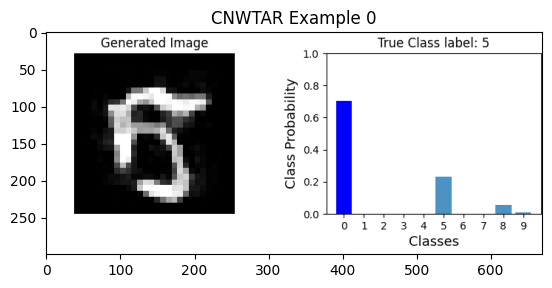

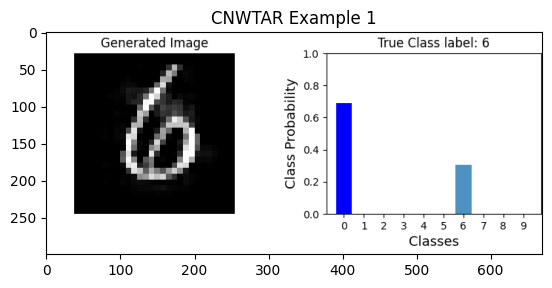

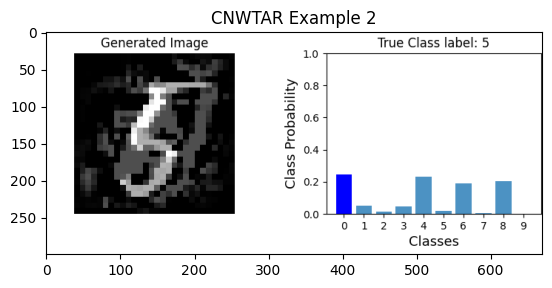

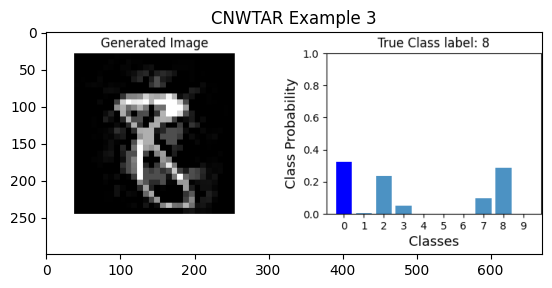

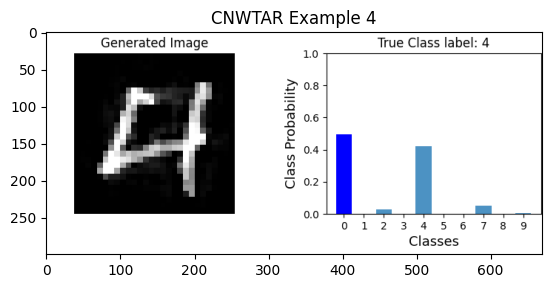

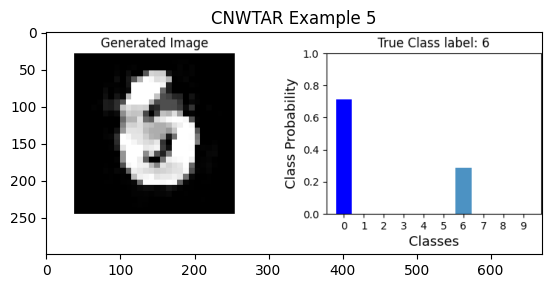

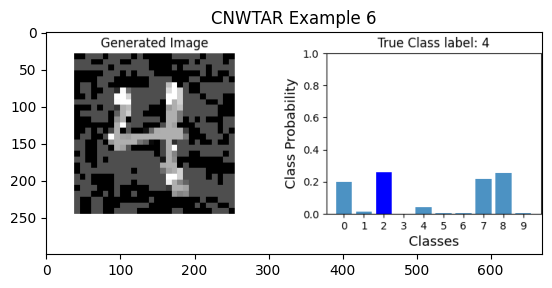

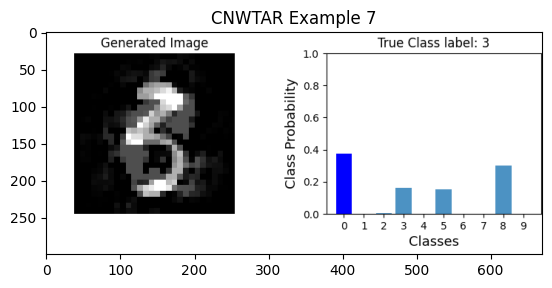

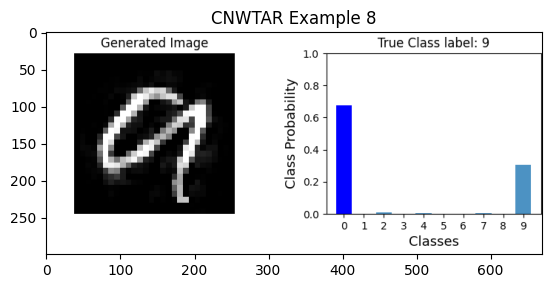

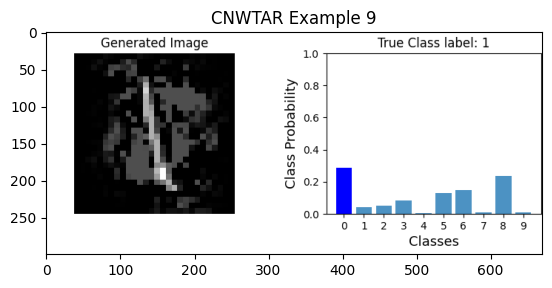

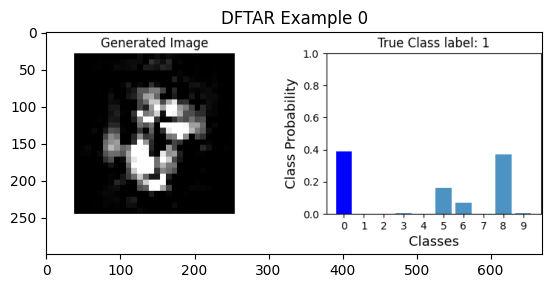

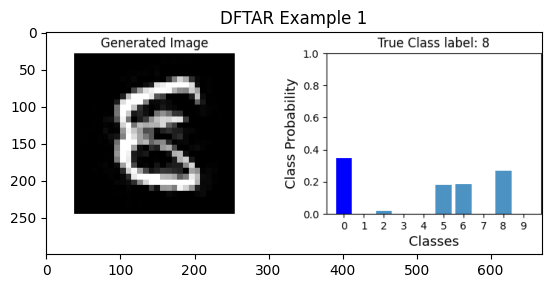

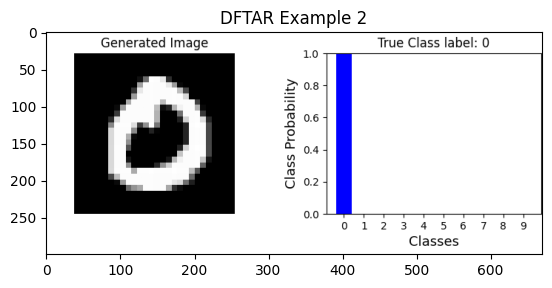

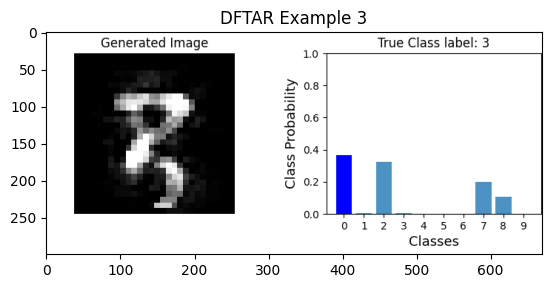

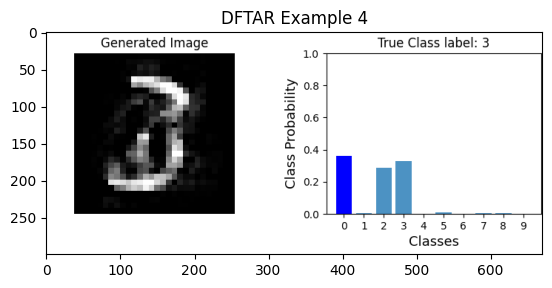

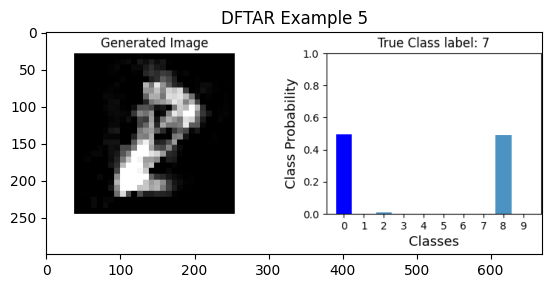

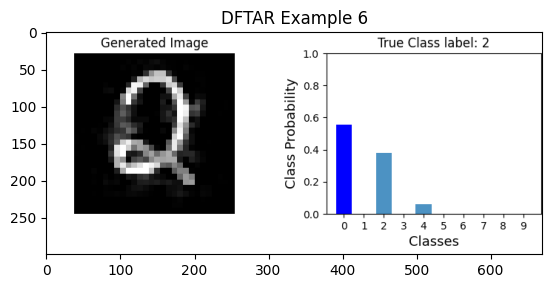

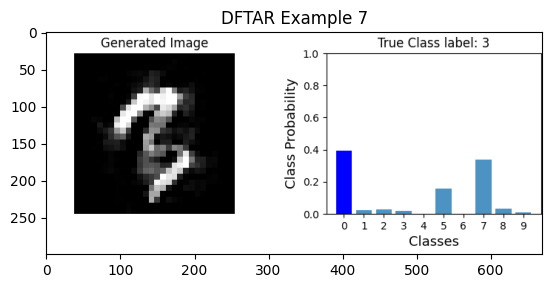

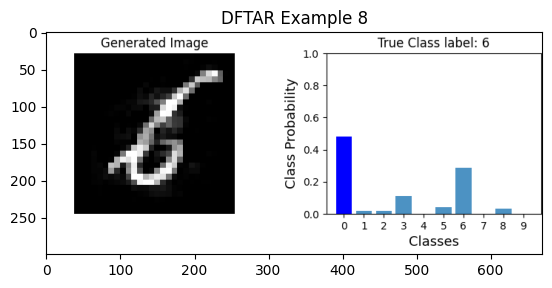

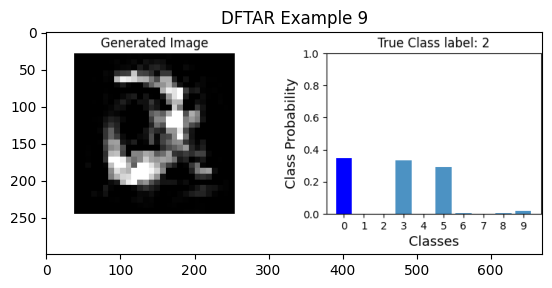

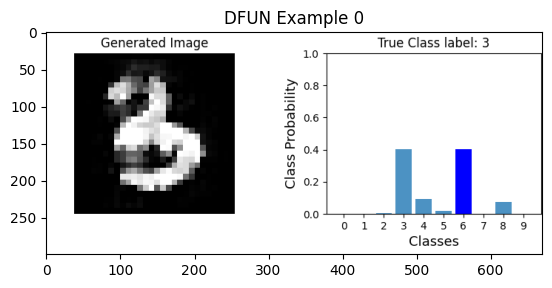

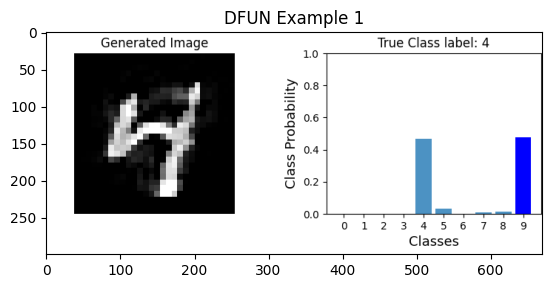

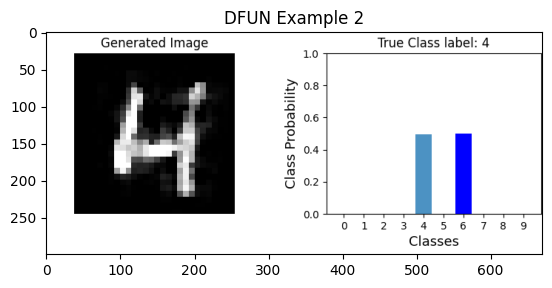

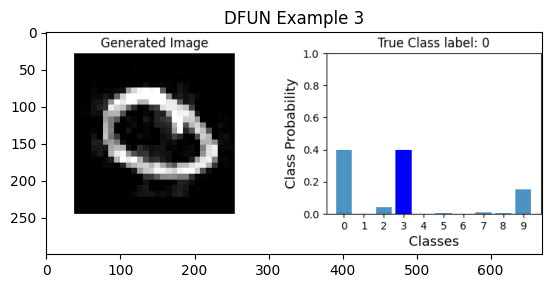

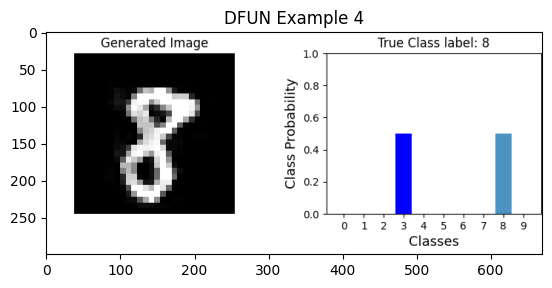

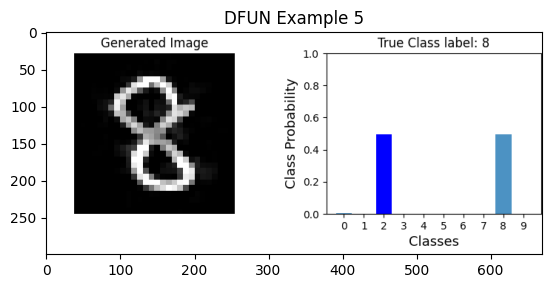

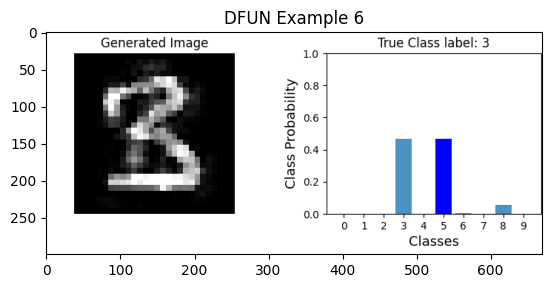

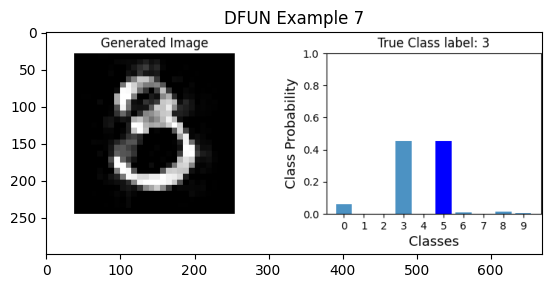

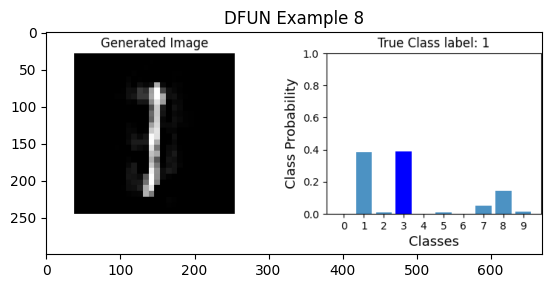

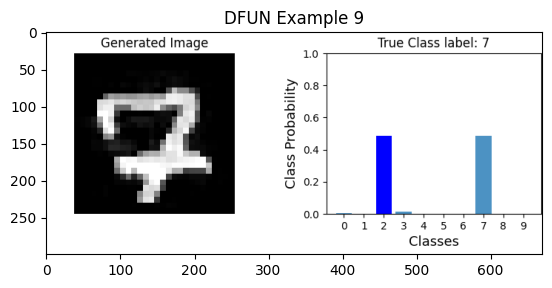

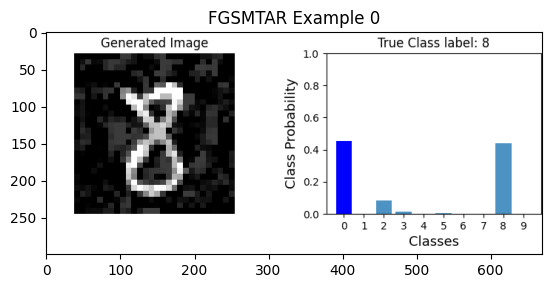

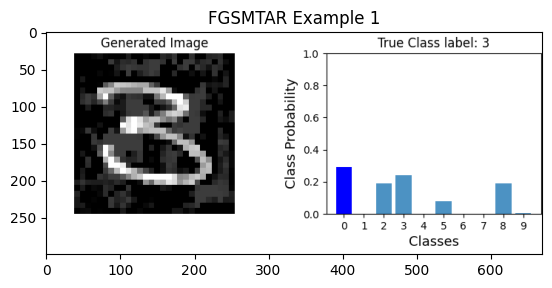

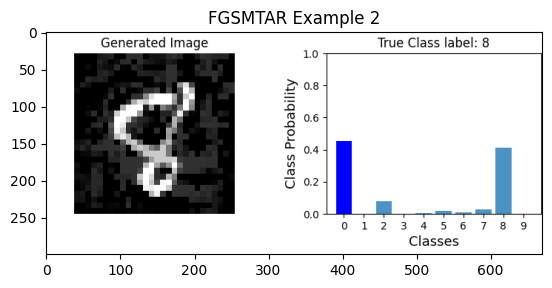

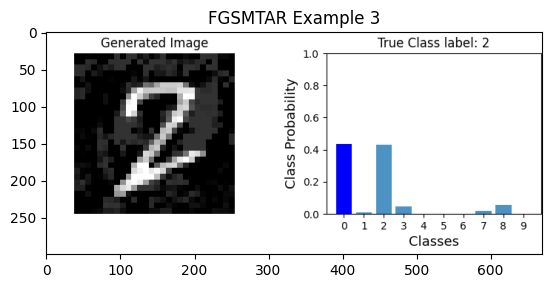

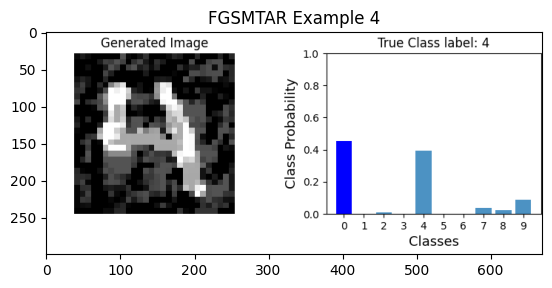

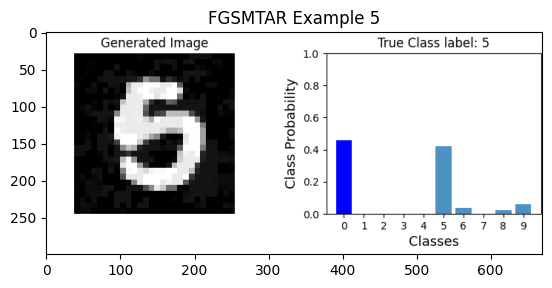

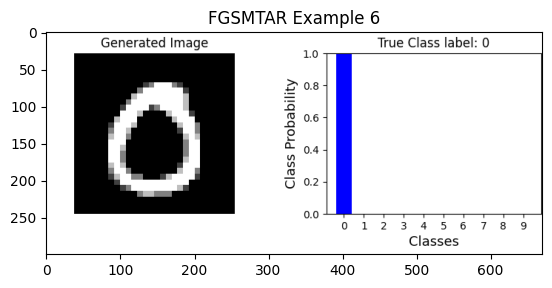

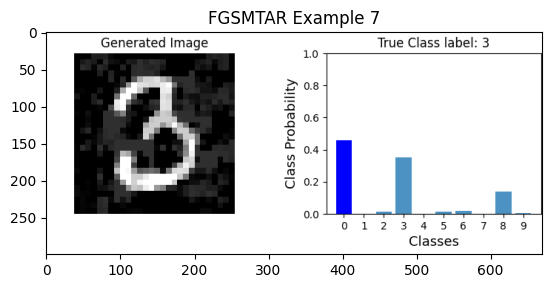

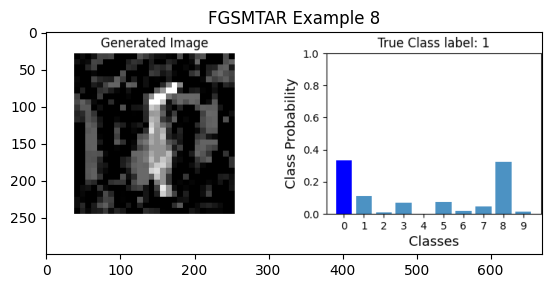

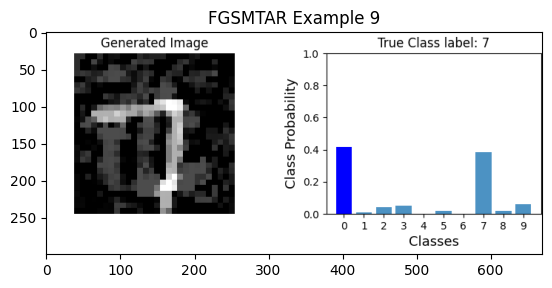

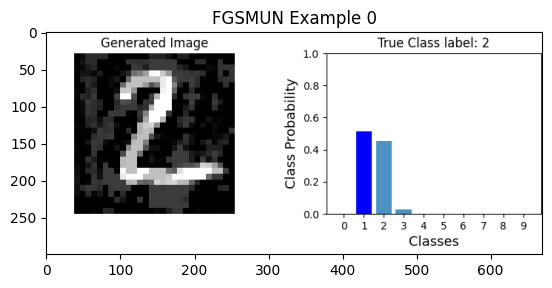

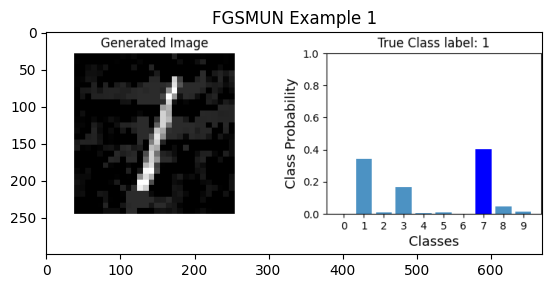

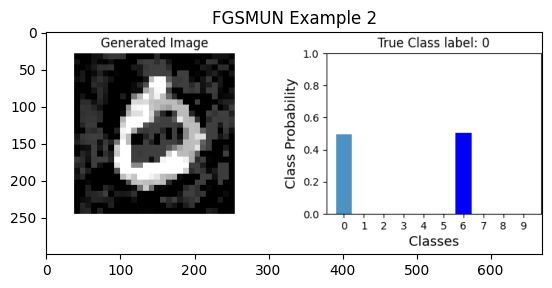

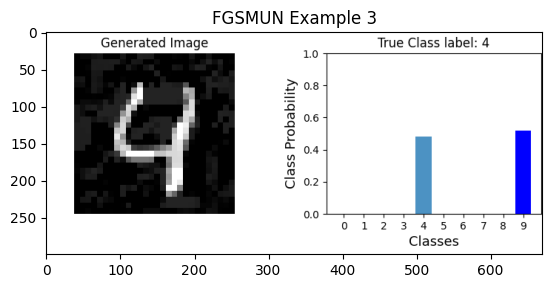

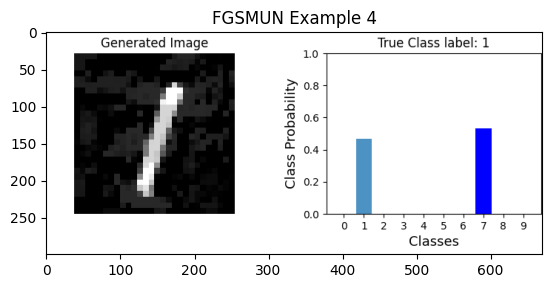

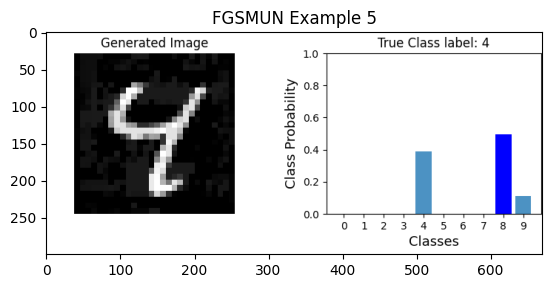

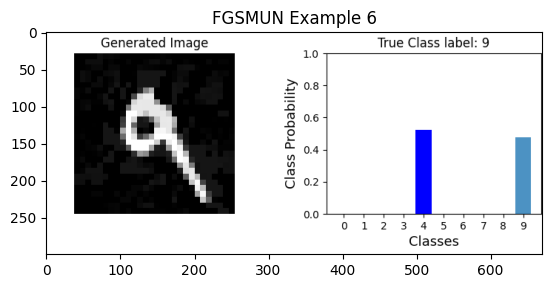

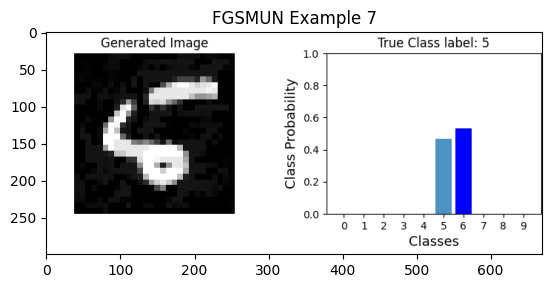

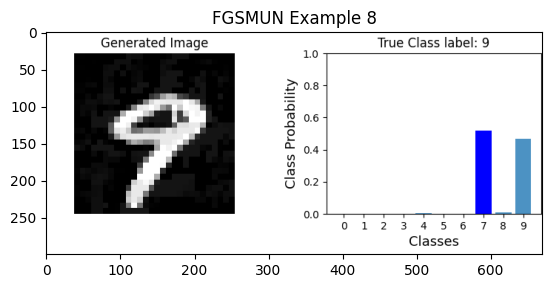

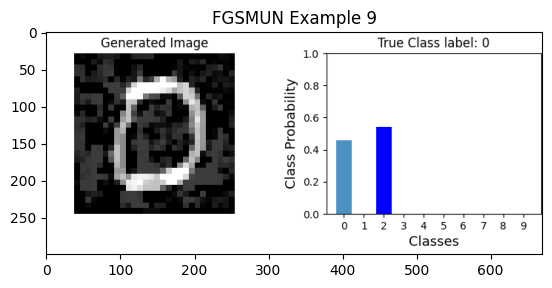

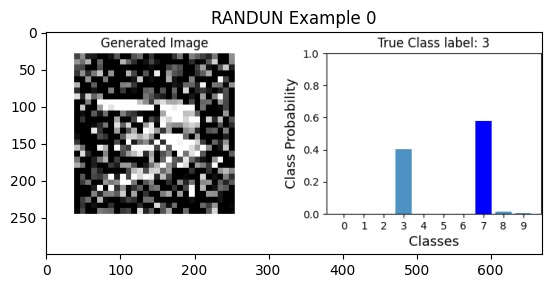

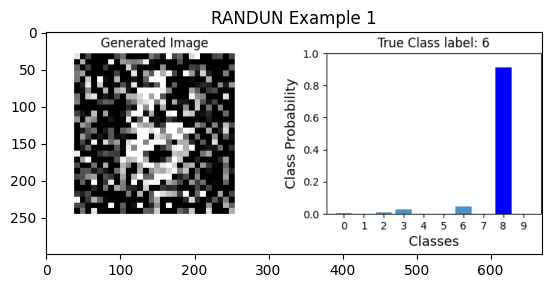

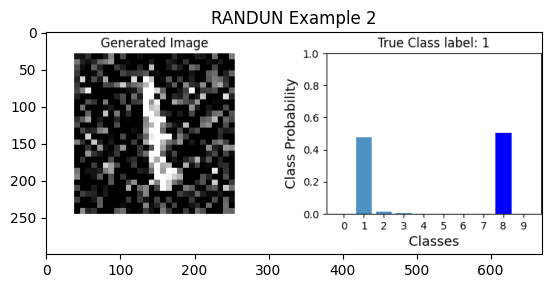

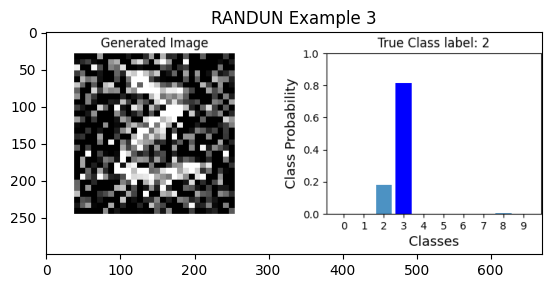

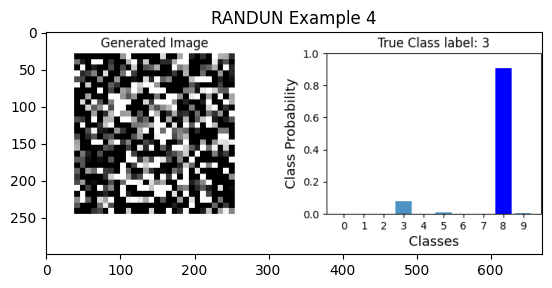

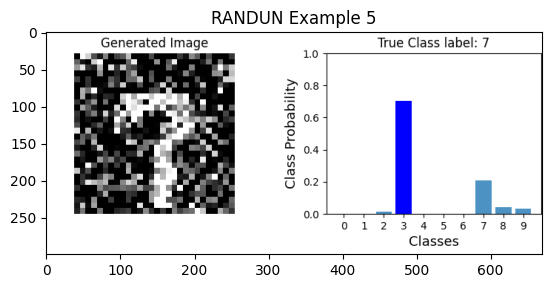

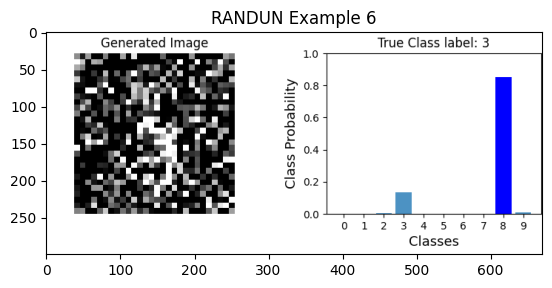

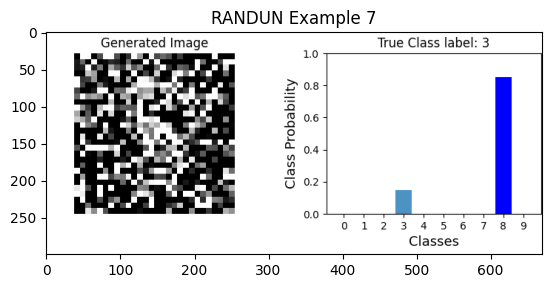

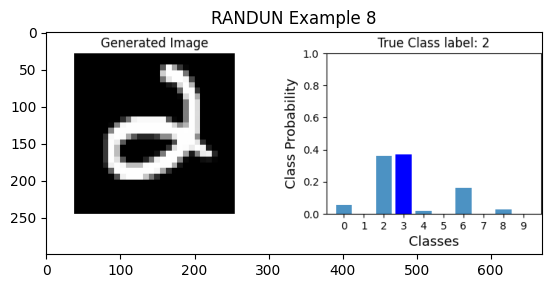

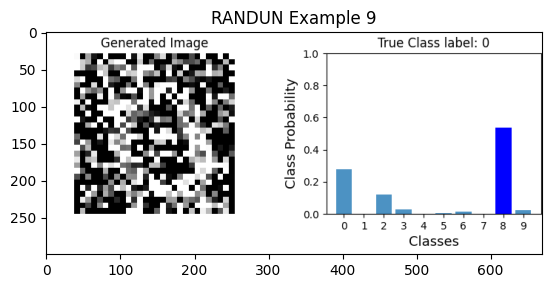

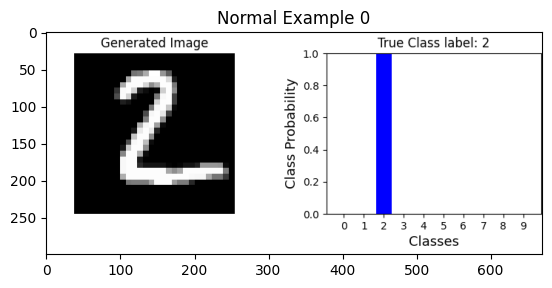

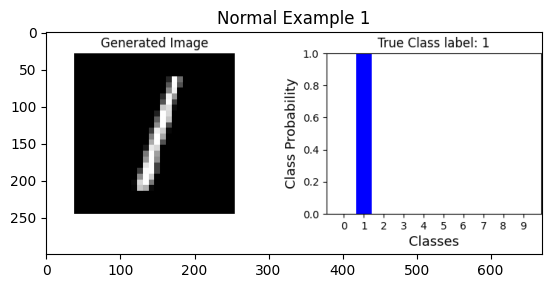

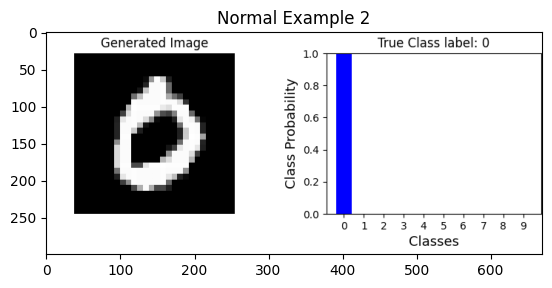

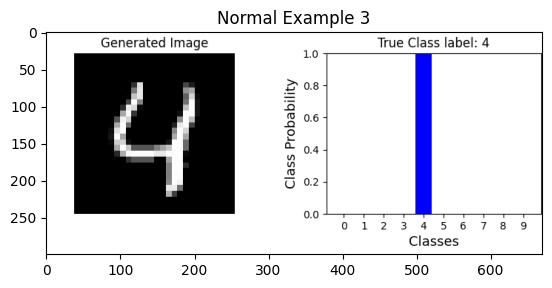

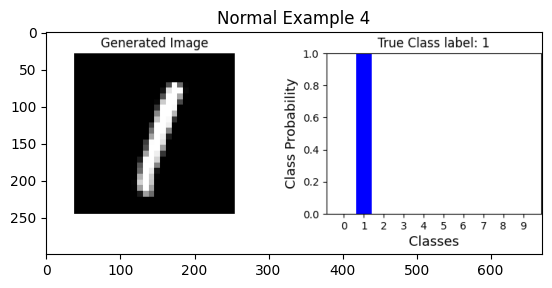

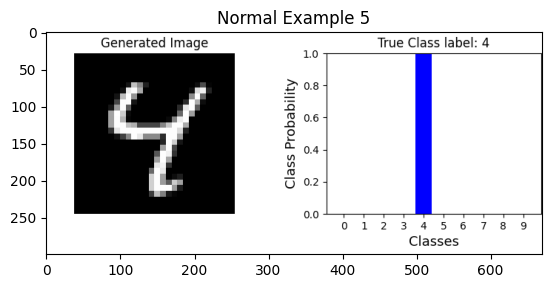

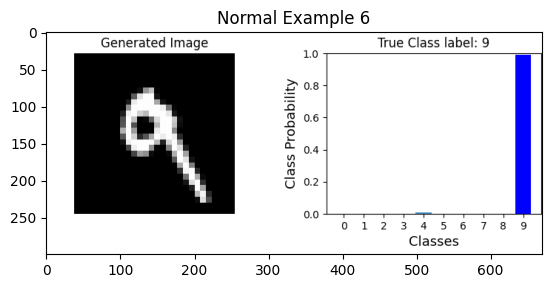

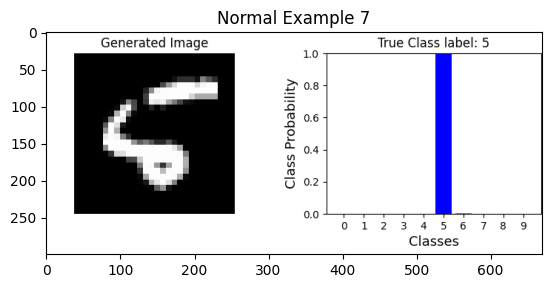

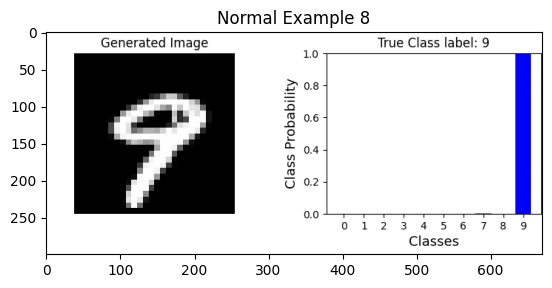

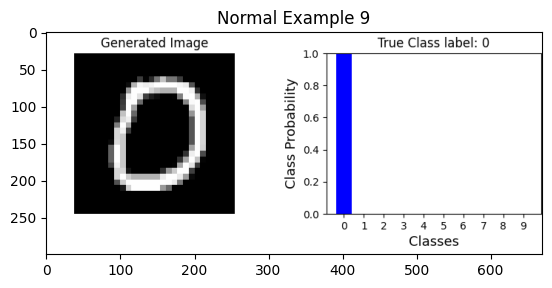

In [ ]:
from matplotlib import image as mpimg

folder_dir_1 = "/content/cnwtar_images"
folder_dir_2 = "/content/dftar_images"
folder_dir_3 = "/content/dfun_images"
folder_dir_4 = "/content/fgsmtar_images"
folder_dir_5 = "/content/fgsmun_images"
folder_dir_6 = "/content/normal_images"
folder_dir_7 = "/content/randun_images"

for i in range(10):
  plt.title("CNWTAR Example " + str(i))
  image = mpimg.imread(folder_dir_1 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("DFTAR Example " + str(i))
  image = mpimg.imread(folder_dir_2 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("DFUN Example " + str(i))
  image = mpimg.imread(folder_dir_3 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("FGSMTAR Example " + str(i))
  image = mpimg.imread(folder_dir_4 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("FGSMUN Example " + str(i))
  image = mpimg.imread(folder_dir_5 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("RANDUN Example " + str(i))
  image = mpimg.imread(folder_dir_7 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

for i in range(10):
  plt.title("Normal Example " + str(i))
  image = mpimg.imread(folder_dir_6 + "/example" + str(i) + ".png")
  plt.imshow(image)
  plt.show()

#Modeling Adversarial Images

Our goal is to identify whether a given image resembling MNIST is adversarial or not. Each algorithm will be tested for the binary case either 0 unperturbed or 1 perturbed, and the multiclass case where it is either 0 unperturbed or 1-6 perturbed through a specific algorithm. Our inputs to the model will be the leading label and our image 784 pixels.

##Initialize Training And Testing Data
Create our training and testing data with the desired labels which we will pass into our different models to identify adversarial images.

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

def classifierNormalize(X):
    X = X.astype(np.float32) / 255.0
    X = (X - mnist_mean) / mnist_std
    return X

def classifierUnnormalize(X):
    X = (X * mnist_std) + mnist_mean
    X *= 255
    return np.clip(X, 0, 255).astype(np.uint8)

with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)

with open('fgsmun_train.pkl', 'rb') as fid:
    FGSMUntargeted = pickle.load(fid)

with open('fgsmtar_train.pkl', 'rb') as fid:
    FGSMTargeted = pickle.load(fid)

with open('dfun_train.pkl', 'rb') as fid:
    DeepFoolUntargeted = pickle.load(fid)

with open('dftar_train.pkl', 'rb') as fid:
    DeepFoolTargeted = pickle.load(fid)

with open('cnwtar_train.pkl', 'rb') as fid:
    CarliniWagnerTargeted = pickle.load(fid)

with open('randun_train.pkl', 'rb') as fid:
    randUntargeted = pickle.load(fid)

#combine data to train classifier on 4000 true images and 400*6 adversarial images
trainingData = pd.concat([mnist_test[:4000],FGSMUntargeted, FGSMTargeted, DeepFoolUntargeted, DeepFoolTargeted, CarliniWagnerTargeted, randUntargeted])

#label training data as true or perturbed 0 is real 1 is perturbed
tfValues = []
for i in range(6400):
    if i < 4000:
        tfValues.append(0)
    else:
        tfValues.append(1)
trainingDataBinary = trainingData.copy()
trainingDataBinary['True/Perturbed'] = tfValues
columns = ['True/Perturbed'] + [col for col in trainingDataBinary.columns if col != 'True/Perturbed']
trainingDataBinary = trainingDataBinary[columns]
trainingDataBinary = trainingDataBinary.sample(frac=1).reset_index(drop=True)

#combine data to train classifier on 4000 true images and  1-6 for each class of adversarial images
classValues = []
for i in range(6400):
    if i < 4000:
        classValues.append(0)
    elif i < 4400:
        classValues.append(1)
    elif i < 4800:
        classValues.append(2)
    elif i < 5200:
        classValues.append(3)
    elif i < 5600:
        classValues.append(4)
    elif i < 6000:
        classValues.append(5)
    else:
        classValues.append(6)
trainingDataClass = trainingData.copy()
trainingDataClass['Class'] = classValues
columns = ['Class'] + [col for col in trainingDataClass.columns if col != 'Class']
trainingDataClass = trainingDataClass[columns]
trainingDataClass = trainingDataClass.sample(frac=1).reset_index(drop=True)

with open('mnist_test.pkl', 'rb') as fid:
    mnist_test = pickle.load(fid)

with open('fgsmun_test.pkl', 'rb') as fid:
    FGSMUntargeted = pickle.load(fid)

with open('fgsmtar_test.pkl', 'rb') as fid:
    FGSMTargeted = pickle.load(fid)

with open('dfun_test.pkl', 'rb') as fid:
    DeepFoolUntargeted = pickle.load(fid)

with open('dftar_test.pkl', 'rb') as fid:
    DeepFoolTargeted = pickle.load(fid)

with open('cnwtar_test.pkl', 'rb') as fid:
    CarliniWagnerTargeted = pickle.load(fid)

with open('randun_test.pkl', 'rb') as fid:
    randUntargeted = pickle.load(fid)

#combine data to train classifier on 4000 true images and 400*6 adversarial images
testingData = pd.concat([mnist_test[4000:5000],FGSMUntargeted, FGSMTargeted, DeepFoolUntargeted, DeepFoolTargeted, CarliniWagnerTargeted, randUntargeted])

#label training data as true or perturbed 0 is real 1 is perturbed
tfValues = []
for i in range(1600):
    if i < 1000:
        tfValues.append(0)
    else:
        tfValues.append(1)
testingDataBinary = testingData.copy()
testingDataBinary['True/Perturbed'] = tfValues
columns = ['True/Perturbed'] + [col for col in testingDataBinary.columns if col != 'True/Perturbed']
testingDataBinary = testingDataBinary[columns]

#combine data to train classifier on 4000 true images and  1-6 for each class of adversarial images
classValues = []
for i in range(1600):
    if i < 1000:
        classValues.append(0)
    elif i < 1100:
        classValues.append(1)
    elif i < 1200:
        classValues.append(2)
    elif i < 1300:
        classValues.append(3)
    elif i < 1400:
        classValues.append(4)
    elif i < 1500:
        classValues.append(5)
    else:
        classValues.append(6)
testingDataClass = testingData.copy()
testingDataClass['Class'] = classValues
columns = ['Class'] + [col for col in testingDataClass.columns if col != 'Class']
testingDataClass = testingDataClass[columns]

##Binary Tester Method
Calculates the accuracy and confusion matrix

In [ ]:
def testBinary(data,model):
  returnArr = np.zeros((5))

  modelBinary = np.zeros((data.shape[0]))
  for i in range(data.shape[0]):
    modelBinary[i] = model.predict(classifierNormalize(data.iloc[i, 2:].values).reshape(1, -1))[0]
  #0 accuracy 1 true negative, 2 false negative, 3 false positive, 4 true positive
  for i in range(data.shape[0]):
    if modelBinary[i] != 1:
      if data.iloc[i, 0] != 1:
        returnArr[1] += 1
        returnArr[0] += 1
      else:
        returnArr[2] +=1
    else:
      if data.iloc[i, 0] != 1:
        returnArr[3] += 1
      else:
        returnArr[4] += 1
        returnArr[0] += 1

  return returnArr

##Multiclass Tester Method

Calculates the accuracy and confusion matrices for all classes

In [ ]:
def testClass(data, model):
    modelClass = np.zeros((data.shape[0], 1))
    for i in range(data.shape[0]):
        modelClass[i] = model.predict(classifierNormalize(data.iloc[i, 2:].values).reshape(1, -1))
    returnArr = np.zeros((7, 5))

    #0 accuracy 1 true negative, 2 false negative, 3 false positive, 4 true positive
    for i in range(7):
        for j in range(len(data)):
            if modelClass[j] != i:
                if data.iloc[j, 0] != i:
                    returnArr[i, 1] += 1
                    returnArr[i, 0] += 1
                else:
                    returnArr[i, 2] +=1
            else:
                if data.iloc[j, 0] != i:
                    returnArr[i, 3] += 1
                else:
                    returnArr[i, 4] += 1
                    returnArr[i, 0] += 1
    returnArr[:,0] = returnArr[:,0]/len(data)
    return returnArr

In [ ]:
def testClassCM(data, model):
  returnArr = np.zeros((7, 7), dtype=int)
  modelClass = np.zeros(data.shape[0], dtype=int)
  for i in range(data.shape[0]):
    features = classifierNormalize(data.iloc[i, 2:].values).reshape(1, -1)
    prediction = model.predict(features)[0]
    modelClass[i] = int(prediction)
    true_label = int(data.iloc[i, 0])
    returnArr[true_label, modelClass[i]] += 1

  return returnArr


##Classifiers
Here we will create eight different classifiers to identify adversarial examples. Models using Logistic Regression, Kmeans, Random Forest, and a CNN will be created for both the binary and multiclass training data. Following the creation of the models an option will be given to save the models as pickles which can then be downloaded. Finally a test is output with the accuracy and confusion matrix.

###Classifier with Logistic Regression
Logistic regression works by associating each input attribute, so in our instance a pixel, with a weight which we can label b1 is multiplied with our attributes and b0 is our intercept. This is a simple linear regression where P(x) = b0 + b1(x) for whatever we are trying to identify, to make this logistic simply make P(x) = e^(b0+b1x)/(1+e^b0+b1x) to change the slop of the regression line to make it more fitting for classifying as opposed to determining a continuous value.

####Binary Version
For the binary version of our data we pass into the logistic regression classifier in an attempt to simply classifiy whether our data is adversarial or not so only two classes

#####Train Our Classifier

In [ ]:
def isAdversarialLogistic(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 2:].values) for i in range(data.shape[0])])
    y_train = data.iloc[:, 0].values
    model = LogisticRegression(max_iter=100000, solver='liblinear', C=0.5, class_weight='balanced', verbose = 1)
    model.fit(x_train, y_train)
    print("done")
    return model;

logisticBinaryModel = isAdversarialLogistic(trainingDataBinary)

[LibLinear]done


Save model here if you desire

In [ ]:
#SAVE MODEL

# Save the model using pickle.dump
with open('logisticBinaryModel.pkl', 'wb') as file:
    pickle.dump(logisticBinaryModel, file)

#downloadAll()

#####Test Our Classifier

In [ ]:
pnrBinary = testBinary(testingDataBinary, logisticBinaryModel)
print(pnrBinary)

[1330.  891.  161.  109.  439.]


#####Cross Validate

In [ ]:
pnrBinary = pnrBinary/5
for i in range(4):
  if i == 0:
    trainingDataBinary2 = trainingDataBinary[1*1600:4*1600]
  elif i == 1:
    trainingDataBinary2 = pd.concat([trainingDataBinary[:1*1600],trainingDataBinary[2*1600:4*1600]])
  elif i == 2:
    trainingDataBinary2 = pd.concat([trainingDataBinary[:2*1600],trainingDataBinary[3*1600:4*1600]])
  else:
    trainingDataBinary2 = trainingDataBinary[:3*1600]
  trainingDataBinary2 = pd.concat([trainingDataBinary2, testingDataBinary])
  trainingDataBinary2 = trainingDataBinary2.sample(frac=1).reset_index(drop=True)
  testingDataBinary2 = trainingDataBinary[i*1600:(i+1)*1600]
  pnrBinary = pnrBinary + testBinary(testingDataBinary2, isAdversarialLogistic(trainingDataBinary2))/5
print(pnrBinary)
logisticBinaryData = pnrBinary
with open('logisticBinaryData.pkl', 'wb') as file:
    pickle.dump(logisticBinaryData, file)

[LibLinear]done
[LibLinear]done
[LibLinear]done
[LibLinear]done
[1309.2  873.6  164.4  126.4  435.6]


####Multiclass Version
For the multiclass logistic regression we train for a maximum of 5000 iterations to limit execution in case of a failure while working with the Saga solver. The additional parameters define our tolerance for a solution and how much regularization we use. Now we should be able to identify whether an image falls into one of 7 classes.

#####Train Our Classifier

In [ ]:
#TRAINING
def whatMethodLogistic(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 2:].values) for i in range(data.shape[0])])
    y_train = data.iloc[:, 0].values
    model = LogisticRegression(max_iter=5000, solver='saga', C=1, class_weight='balanced', verbose = 1, tol = 1e-3)#, multi_class='multinomial')
    model.fit(x_train, y_train)
    print("done")
    return model

logisticClassModel = whatMethodLogistic(trainingDataClass)


convergence after 476 epochs took 122 seconds
done


Save model here if you desire

In [ ]:
#SAVE MODEL

# Save the model using pickle.dump
with open('logisticClassModel.pkl', 'wb') as file:
    pickle.dump(logisticClassModel, file)

#downloadAll() # You may still need to uncomment this if you want to download the file

#####Test Our Classifier

In [ ]:
#TESTING
np.set_printoptions(suppress=True)
pnrMulticlass = testClass(testingDataClass, logisticClassModel)
print(pnrMulticlass)
cmMulticlass = testClassCM(testingDataClass, logisticClassModel)
print(cmMulticlass)
#[mnist_test[:4000],FGSMUntargeted, FGSMTargeted, DeepFoolUntargeted, DeepFoolTargeted, CarliniWagnerTargeted, randUntargeted]

[[   0.685625  527.        430.         73.        570.      ]
 [   0.954375 1451.         24.         49.         76.      ]
 [   0.93875  1446.         44.         54.         56.      ]
 [   0.791875 1235.         68.        265.         32.      ]
 [   0.880625 1382.         73.        118.         27.      ]
 [   0.873125 1351.         54.        149.         46.      ]
 [   0.974375 1487.         28.         13.         72.      ]]
[[570  16  16 243  80  69   6]
 [  2  76  11   2   2   4   3]
 [  1  14  56   2   7  18   2]
 [ 39   2   1  32   8  18   0]
 [ 21   1   6   8  27  36   1]
 [  9   3  11  10  20  46   1]
 [  1  13   9   0   1   4  72]]


#####Cross validate

In [ ]:
pnrMulticlass = pnrMulticlass/5
cmMulticlass = cmMulticlass/5
for i in range(4):
  if i == 0:
    trainingDataClass2 = trainingDataClass[1*1600:4*1600]
  elif i == 1:
    trainingDataClass2 = pd.concat([trainingDataClass[:1*1600],trainingDataClass[2*1600:4*1600]])
  elif i == 2:
    trainingDataClass2 = pd.concat([trainingDataClass[:2*1600],trainingDataClass[3*1600:4*1600]])
  else:
    trainingDataClass2 = trainingDataClass[:3*1600]
  trainingDataClass2 = pd.concat([trainingDataClass2, testingDataClass])
  trainingDataClass2 = trainingDataClass2.sample(frac=1).reset_index(drop=True)
  testingDataClass2 = trainingDataClass[i*1600:(i+1)*1600]
  m = whatMethodLogistic(trainingDataClass2)
  pnrMulticlass = pnrMulticlass + testClass(testingDataClass2, m)/5
  cmMulticlass = cmMulticlass + testClassCM(testingDataClass2, m)/5
print(pnrMulticlass)
print(cmMulticlass)
logisticMulticlassData = pnrMulticlass
with open('logisticMulticlassData.pkl', 'wb') as file:
    pickle.dump(logisticMulticlassData, file)
logisticMulticlassDataCm = cmMulticlass
with open('logisticMulticlassDataCm.pkl', 'wb') as file:
    pickle.dump(logisticMulticlassDataCm, file)

convergence after 527 epochs took 135 seconds
done
convergence after 470 epochs took 119 seconds
done
convergence after 465 epochs took 117 seconds
done
convergence after 499 epochs took 127 seconds
done
[[   0.6865    504.2       405.8        95.8       594.2     ]
 [   0.957    1458.6        27.4        41.4        72.6     ]
 [   0.948875 1453.4        35.2        46.6        64.8     ]
 [   0.8005   1252.6        71.8       247.4        28.2     ]
 [   0.89     1382.6        58.6       117.4        41.4     ]
 [   0.88325  1372.2        59.        127.8        41.      ]
 [   0.973125 1487.8        30.8        12.2        69.2     ]]
[[594.2  14.   18.  219.6  77.8  70.    6.4]
 [  5.   72.6   8.2   5.8   2.2   4.8   1.4]
 [  3.4  10.2  64.8   1.4   5.4  12.6   2.2]
 [ 50.8   1.    0.8  28.2   8.8  10.4   0. ]
 [ 17.6   0.8   4.4   9.2  41.4  26.4   0.2]
 [ 16.4   1.6   8.4   9.8  20.8  41.    2. ]
 [  2.6  13.8   6.8   1.6   2.4   3.6  69.2]]


###Classifier With Kmeans Clustering
A kmeans classifier works by assigning each observation in a space a random label 1 to k and then defining a centroid which is the middle point between all observations of a label. It then iteratively updates by changing the label of an observation to its nearest centroid for all observations then recalculating the centroid again and again to no labels are changed. This effectively minimizes the difference of the sum of all distances of an observation to its centroid.

####Binary Version
For the binary version we have 2 classes we hope to idenfy normal and perturbed of balanced size 4800 for testing, 2400 normal and 2400 adversarial.

#####Train Our classifier

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def isAdversarialKmeans(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 2:].values) for i in range(data.shape[0])])
    pca = PCA(n_components=150)
    data_pca = pca.fit_transform(x_train)
    model = KMeans(n_clusters=2, random_state=42)
    model.fit(data_pca)
    return model
class_0_indices = trainingDataBinary[trainingDataBinary['True/Perturbed'] == 0].index
drop_indices = class_0_indices.to_series().sample(n=3600, random_state=42)
df_balanced1 = trainingDataBinary.drop(index=drop_indices).reset_index(drop=True)

class_0_indices = testingDataBinary[testingDataBinary['True/Perturbed'] == 0].index
drop_indices = class_0_indices.to_series().sample(n=900, random_state=42)
trainingDataBinaryK = testingDataBinary.drop(index=drop_indices).reset_index(drop=True)

traingingDataBinaryK = pd.concat([trainingDataBinaryK, df_balanced1])

print(trainingDataBinaryK.shape)

kmeansBinaryModel = isAdversarialKmeans(trainingDataBinaryK)

(700, 786)


Save model if you desire

In [ ]:
#SAVE MODEL
with open('kmeansBinaryModel.pkl', 'wb') as fid:
        pickle.dump(kmeansBinaryModel, fid)
#downloadAll()

#####Test Our Classifier

In [ ]:
from sklearn.metrics import adjusted_rand_score

x_train = np.array([classifierNormalize(trainingDataBinaryK.iloc[i, 2:].values) for i in range(trainingDataBinaryK.shape[0])])
pca = PCA(n_components=150)
data_pca = pca.fit_transform(x_train)
y_pred = kmeansBinaryModel.predict(data_pca)
y_true = trainingDataBinaryK.iloc[:, 0]
ari = adjusted_rand_score(y_true, y_pred)
print(ari)
with open('kmeansBinaryModelData.pkl', 'wb') as fid:
        pickle.dump(ari, fid)

-0.023325006244842565


####Multiclass Version
For the multiclass version we do the same and to balance every class we make normal images of only size 400.

#####Train Our Classifier

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def whatMethodKmeans(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 1:].values) for i in range(data.shape[0])])
    x_train = np.array([row.flatten() for row in x_train])
    pca = PCA(n_components=150)
    data_pca = pca.fit_transform(x_train)
    model = KMeans(n_clusters=7, random_state=42)
    model.fit(data_pca)
    return model

class_0_indices = trainingDataClass[trainingDataClass['Class'] == 0].index
drop_indices = class_0_indices.to_series().sample(n=3600, random_state=42)
df_balanced1 = trainingDataClass.drop(index=drop_indices).reset_index(drop=True)

class_0_indices = testingDataClass[testingDataClass['Class'] == 0].index
drop_indices = class_0_indices.to_series().sample(n=900, random_state=42)
trainingDataClassK = testingDataClass.drop(index=drop_indices).reset_index(drop=True)
trainingDataClassK = pd.concat([trainingDataClassK, df_balanced1])

print(trainingDataClassK.shape)

kmeansClassModel = whatMethodKmeans(trainingDataClassK.iloc[:, 2:])

(3500, 786)


Save model if you desire

In [ ]:
#SAVE MODEL
with open('kmeansClassModel.pkl', 'wb') as fid:
        pickle.dump(kmeansClassModel, fid)
#downloadAll()

#####Test Our classifier

In [ ]:
from sklearn.metrics import adjusted_rand_score

x_train = np.array([classifierNormalize(trainingDataClassK.iloc[i, 2:].values) for i in range(trainingDataClassK.shape[0])])
pca = PCA(n_components=150)
data_pca = pca.fit_transform(x_train)
y_pred = kmeansClassModel.predict(data_pca)
y_true = trainingDataClassK.iloc[:, 0]
ari = adjusted_rand_score(y_true, y_pred)
print(ari)
with open('kmeansClassModelData.pkl', 'wb') as fid:
        pickle.dump(ari, fid)

0.1670276736511554


###Classifier With Random Forest
A random forest classifier works by taking the most popular classification selection of multiple, in this case 100, classification trees trained on subsets of the data.

####Binary Version
For the binary version we execute this with the binary training data.

#####Train Our classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def isAdversarialRandomForest(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 2:].values) for i in range(data.shape[0])])
    y_train = data.iloc[:, 0].values
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(x_train, y_train)
    return model

randomForestBinaryModel = isAdversarialRandomForest(trainingDataBinary)

Save model if you desire

In [ ]:
#SAVE MODEL
with open('randomForestBinaryModel.pkl', 'wb') as fid:
        pickle.dump(randomForestBinaryModel, fid)
#downloadAll()

#####Test Our classifier

In [ ]:
#TESTING
np.set_printoptions(suppress=True)
pnrBinary = testBinary(testingDataBinary, randomForestBinaryModel)
print(pnrBinary)

[1547. 1000.   53.    0.  547.]


#####Cross Validate

In [ ]:
pnrBinary = pnrBinary/5
print(pnrBinary)
for i in range(4):
  if i == 0:
    trainingDataBinary2 = trainingDataBinary[1*1600:4*1600]
  elif i == 1:
    trainingDataBinary2 = pd.concat([trainingDataBinary[:1*1600],trainingDataBinary[2*1600:4*1600]])
  elif i == 2:
    trainingDataBinary2 = pd.concat([trainingDataBinary[:2*1600],trainingDataBinary[3*1600:4*1600]])
  else:
    trainingDataBinary2 = trainingDataBinary[:3*1600]
  trainingDataBinary2 = pd.concat([trainingDataBinary2, testingDataBinary])
  trainingDataBinary2 = trainingDataBinary2.sample(frac=1).reset_index(drop=True)
  testingDataBinary2 = trainingDataBinary[i*1600:(i+1)*1600]
  hold = testBinary(testingDataBinary2, isAdversarialRandomForest(trainingDataBinary2))
  pnrBinary = pnrBinary + hold/5

print(pnrBinary)
randomForestBinaryData = pnrBinary
with open('randomForestBinaryData.pkl', 'wb') as file:
    pickle.dump(randomForestBinaryData, file)

[309.4 200.   10.6   0.  109.4]
[1527.2  974.    46.8   26.   553.2]


####Multiclass Version
For the multiclass version we train on the multiclass data.

#####Train Our classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def whatMethodRandomForest(data):
    x_train = np.array([classifierNormalize(data.iloc[i, 2:].values) for i in range(data.shape[0])])
    y_train = data.iloc[:, 0].values
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(x_train, y_train)
    return model

randomForestClassModel = whatMethodRandomForest(trainingDataClass)

Save model if you desire

In [ ]:
#SAVE MODEL
with open('randomForestClassModel.pkl', 'wb') as fid:
        pickle.dump(randomForestClassModel, fid)
#downloadAll()

#####Test Our classifier

In [ ]:
#TESTING
np.set_printoptions(suppress=True)
pnrMulticlass = testClass(testingDataClass, randomForestClassModel)
print(pnrMulticlass)
cmMulticlass = testClassCM(testingDataClass, randomForestClassModel)
print(cmMulticlass)

[[   0.948125  517.          0.         83.       1000.      ]
 [   0.98     1482.         14.         18.         86.      ]
 [   0.97375  1486.         28.         14.         72.      ]
 [   0.96875  1480.         30.         20.         70.      ]
 [   0.948125 1485.         68.         15.         32.      ]
 [   0.96125  1476.         38.         24.         62.      ]
 [   0.995    1494.          2.          6.         98.      ]]
[[1000    0    0    0    0    0    0]
 [   0   86   13    0    0    0    1]
 [  11   17   72    0    0    0    0]
 [  23    0    0   70    4    3    0]
 [  33    1    0   13   32   21    0]
 [  14    0    1    7   11   62    5]
 [   2    0    0    0    0    0   98]]


#####Cross Validate

In [ ]:
#CROSS VALIDATE
pnrMulticlass = pnrMulticlass/5
print(pnrMulticlass)
cmMulticlass = cmMulticlass/5
print(cmMulticlass)
for i in range(4):
  if i == 0:
    trainingDataClass2 = trainingDataClass[1*1600:4*1600]
  elif i == 1:
    trainingDataClass2 = pd.concat([trainingDataClass[:1*1600],trainingDataClass[2*1600:4*1600]])
  elif i == 2:
    trainingDataClass2 = pd.concat([trainingDataClass[:2*1600],trainingDataClass[3*1600:4*1600]])
  else:
    trainingDataClass2 = trainingDataClass[:3*1600]
  trainingDataClass2 = pd.concat([trainingDataClass2, testingDataClass])
  trainingDataClass2 = trainingDataClass2.sample(frac=1).reset_index(drop=True)
  testingDataClass2 = trainingDataClass[i*1600:(i+1)*1600]
  m = whatMethodRandomForest(trainingDataClass2)
  pnrMulticlass = pnrMulticlass + testClass(testingDataClass2, m)/5
  cmMulticlass = cmMulticlass + testClassCM(testingDataClass2, m)/5
randomForestMulticlassData = pnrMulticlass
with open('randomForestMulticlassData.pkl', 'wb') as file:
    pickle.dump(randomForestMulticlassData, file)
randomForestMulticlassDataCm = cmMulticlass
with open('randomForestMulticlassDataCm.pkl', 'wb') as file:
    pickle.dump(randomForestMulticlassDataCm, file)

[[  0.189625 103.4        0.        16.6      200.      ]
 [  0.196    296.4        2.8        3.6       17.2     ]
 [  0.19475  297.2        5.6        2.8       14.4     ]
 [  0.19375  296.         6.         4.        14.      ]
 [  0.189625 297.        13.6        3.         6.4     ]
 [  0.19225  295.2        7.6        4.8       12.4     ]
 [  0.199    298.8        0.4        1.2       19.6     ]]
[[200.    0.    0.    0.    0.    0.    0. ]
 [  0.   17.2   2.6   0.    0.    0.    0.2]
 [  2.2   3.4  14.4   0.    0.    0.    0. ]
 [  4.6   0.    0.   14.    0.8   0.6   0. ]
 [  6.6   0.2   0.    2.6   6.4   4.2   0. ]
 [  2.8   0.    0.2   1.4   2.2  12.4   1. ]
 [  0.4   0.    0.    0.    0.    0.   19.6]]


###Classifier With Convolutional Neural Network
A CNN classifier works by iteratively updating layer weights through backpropagation to maximally increase the confidence of the prediction of the actual class.

####Binary Version
For the binary version we train on the binary dat.

#####Train Our classifier

In [ ]:
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pickle

x_train = np.array([normalize(trainingDataBinary.iloc[i, 2:].values) for i in range(trainingDataBinary.shape[0])])
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
y_train = trainingDataBinary.iloc[:, 0].values
try:
    train_dataset = TensorDataset(
        torch.from_numpy(x_train),
        torch.from_numpy(y_train)
    )
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
except Exception as e:
    print(f"Error creating DataLoader: {e}")
    exit(1)


#init model on device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

#train over 10 epochs
def train(train_loader, epochs=10):
    #Train the model with a DataLoader.
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (data, target) in enumerate(train_loader, 0):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model1(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

train(train_loader, epochs=100)

Epoch 1/100, Loss: 1.4026
Epoch 2/100, Loss: 0.6588
Epoch 3/100, Loss: 0.6409
Epoch 4/100, Loss: 0.6226
Epoch 5/100, Loss: 0.6033
Epoch 6/100, Loss: 0.5956
Epoch 7/100, Loss: 0.5336
Epoch 8/100, Loss: 0.4792
Epoch 9/100, Loss: 0.4313
Epoch 10/100, Loss: 0.3500
Epoch 11/100, Loss: 0.3223
Epoch 12/100, Loss: 0.2693
Epoch 13/100, Loss: 0.2518
Epoch 14/100, Loss: 0.2102
Epoch 15/100, Loss: 0.2208
Epoch 16/100, Loss: 0.2112
Epoch 17/100, Loss: 0.2020
Epoch 18/100, Loss: 0.1695
Epoch 19/100, Loss: 0.1664
Epoch 20/100, Loss: 0.1732
Epoch 21/100, Loss: 0.1520
Epoch 22/100, Loss: 0.1481
Epoch 23/100, Loss: 0.1512
Epoch 24/100, Loss: 0.1472
Epoch 25/100, Loss: 0.1616
Epoch 26/100, Loss: 0.1414
Epoch 27/100, Loss: 0.1671
Epoch 28/100, Loss: 0.1355
Epoch 29/100, Loss: 0.1322
Epoch 30/100, Loss: 0.1352
Epoch 31/100, Loss: 0.1237
Epoch 32/100, Loss: 0.1193
Epoch 33/100, Loss: 0.1379
Epoch 34/100, Loss: 0.1355
Epoch 35/100, Loss: 0.1198
Epoch 36/100, Loss: 0.1194
Epoch 37/100, Loss: 0.1392
Epoch 38/1

Save model if you desire

In [ ]:
#save model
try:
    with open('cnnBinaryModel.pkl', 'wb') as fid:
        pickle.dump(model1, fid)
except Exception as e:
    print(f"Error saving model: {e}")

#####Test Our classifier

In [ ]:
def testBinaryCNN(data, model):
  returnArr = np.zeros((5))

  modelBinary = np.zeros((data.shape[0]))
  for i in range(data.shape[0]):
    modelBinary[i] = np.argmax(model.predict(classifierNormalize(data.iloc[i, 2:].values).reshape(1, -1)))

  #0 accuracy 1 true negative, 2 false negative, 3 false positive, 4 true positive
  for i in range(data.shape[0]):
    if modelBinary[i] != 1:
      if data.iloc[i, 0] != 1:
        returnArr[1] += 1
        returnArr[0] += 1
      else:
        returnArr[2] +=1
    else:
      if data.iloc[i, 0] != 1:
        returnArr[3] += 1
      else:
        returnArr[4] += 1
        returnArr[0] += 1

  return returnArr

pnrBinary = testBinaryCNN(testingDataBinary, model1)
print(pnrBinary)

[1508.  927.   19.   73.  581.]


#####Cross Validate

In [ ]:
pnrBinary = pnrBinary/5
for i in range(4):
  if i == 0:
    trainingDataBinary2 = trainingDataBinary[1*1600:4*1600]
  elif i == 1:
    trainingDataBinary2 = pd.concat([trainingDataBinary[:1*1600],trainingDataBinary[2*1600:4*1600]])
  elif i == 2:
    trainingDataBinary2 = pd.concat([trainingDataBinary[:2*1600],trainingDataBinary[3*1600:4*1600]])
  else:
    trainingDataBinary2 = trainingDataBinary[:3*1600]
  trainingDataBinary2 = pd.concat([trainingDataBinary2, testingDataBinary])
  trainingDataBinary2 = trainingDataBinary2.sample(frac=1).reset_index(drop=True)
  testingDataBinary2 = trainingDataBinary[i*1600:(i+1)*1600]
  ########
  x_train = np.array([normalize(trainingDataBinary2.iloc[i, 2:].values) for i in range(trainingDataBinary2.shape[0])])
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
  y_train = trainingDataBinary2.iloc[:, 0].values
  try:
    train_dataset = TensorDataset(
      torch.from_numpy(x_train),
      torch.from_numpy(y_train)
    )
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
  except Exception as e:
    print(f"Error creating DataLoader: {e}")
    exit(1)

  #init model on device
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model1 = SimpleNN().to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

  train(train_loader, epochs=100)
  ########
  pnrBinary = pnrBinary + testBinaryCNN(testingDataBinary2, model1)/5
print(pnrBinary)
cnnBinaryData = pnrBinary
with open('cnnBinaryData.pkl', 'wb') as file:
    pickle.dump(cnnBinaryData, file)

Epoch 1/100, Loss: 1.4113
Epoch 2/100, Loss: 0.6470
Epoch 3/100, Loss: 0.6263
Epoch 4/100, Loss: 0.5976
Epoch 5/100, Loss: 0.5636
Epoch 6/100, Loss: 0.5198
Epoch 7/100, Loss: 0.4512
Epoch 8/100, Loss: 0.4014
Epoch 9/100, Loss: 0.3506
Epoch 10/100, Loss: 0.2951
Epoch 11/100, Loss: 0.2598
Epoch 12/100, Loss: 0.2368
Epoch 13/100, Loss: 0.2309
Epoch 14/100, Loss: 0.1960
Epoch 15/100, Loss: 0.2007
Epoch 16/100, Loss: 0.1828
Epoch 17/100, Loss: 0.1777
Epoch 18/100, Loss: 0.1605
Epoch 19/100, Loss: 0.1666
Epoch 20/100, Loss: 0.1498
Epoch 21/100, Loss: 0.1493
Epoch 22/100, Loss: 0.1368
Epoch 23/100, Loss: 0.1333
Epoch 24/100, Loss: 0.1405
Epoch 25/100, Loss: 0.1430
Epoch 26/100, Loss: 0.1311
Epoch 27/100, Loss: 0.1176
Epoch 28/100, Loss: 0.1322
Epoch 29/100, Loss: 0.1224
Epoch 30/100, Loss: 0.1517
Epoch 31/100, Loss: 0.1174
Epoch 32/100, Loss: 0.1107
Epoch 33/100, Loss: 0.1077
Epoch 34/100, Loss: 0.1138
Epoch 35/100, Loss: 0.1123
Epoch 36/100, Loss: 0.1172
Epoch 37/100, Loss: 0.1014
Epoch 38/1

####Multiclass Version
For the multiclass version we train on the multiclass data.

#####Train Our classifier

In [ ]:
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pickle

x_train = np.array([normalize(trainingDataClass.iloc[i, 2:].values) for i in range(trainingDataClass.shape[0])])
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
y_train = trainingDataClass.iloc[:, 0].values
try:
    train_dataset = TensorDataset(
        torch.from_numpy(x_train),
        torch.from_numpy(y_train)
    )
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
except Exception as e:
    print(f"Error creating DataLoader: {e}")
    exit(1)


#init model on device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)

#train over 10 epochs
def train(train_loader, epochs=10):
    #Train the model with a DataLoader.
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (data, target) in enumerate(train_loader, 0):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model2(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

train(train_loader, epochs=100)

Epoch 1/100, Loss: 1.8293
Epoch 2/100, Loss: 1.3690
Epoch 3/100, Loss: 1.2817
Epoch 4/100, Loss: 1.2198
Epoch 5/100, Loss: 1.1734
Epoch 6/100, Loss: 1.1343
Epoch 7/100, Loss: 1.0903
Epoch 8/100, Loss: 1.0336
Epoch 9/100, Loss: 0.9658
Epoch 10/100, Loss: 0.9049
Epoch 11/100, Loss: 0.8418
Epoch 12/100, Loss: 0.7805
Epoch 13/100, Loss: 0.7364
Epoch 14/100, Loss: 0.7089
Epoch 15/100, Loss: 0.6907
Epoch 16/100, Loss: 0.6875
Epoch 17/100, Loss: 0.6803
Epoch 18/100, Loss: 0.6513
Epoch 19/100, Loss: 0.6383
Epoch 20/100, Loss: 0.6221
Epoch 21/100, Loss: 0.5987
Epoch 22/100, Loss: 0.6009
Epoch 23/100, Loss: 0.5776
Epoch 24/100, Loss: 0.5726
Epoch 25/100, Loss: 0.5572
Epoch 26/100, Loss: 0.5403
Epoch 27/100, Loss: 0.5606
Epoch 28/100, Loss: 0.5424
Epoch 29/100, Loss: 0.5324
Epoch 30/100, Loss: 0.5081
Epoch 31/100, Loss: 0.5095
Epoch 32/100, Loss: 0.4909
Epoch 33/100, Loss: 0.4662
Epoch 34/100, Loss: 0.4540
Epoch 35/100, Loss: 0.4416
Epoch 36/100, Loss: 0.4490
Epoch 37/100, Loss: 0.4219
Epoch 38/1

Save model if you desire

In [ ]:
#save model
try:
    with open('cnnClassModel.pkl', 'wb') as fid:
        pickle.dump(model2, fid)
except Exception as e:
    print(f"Error saving model: {e}")

#####Test Our classifier

In [ ]:
def testClassCNN(data, model):
    modelClass = np.zeros((data.shape[0], 1))
    for i in range(data.shape[0]):
        modelClass[i] = np.argmax(model.predict(normalize(data.iloc[i, 2:].values).reshape(1, -1)))
    returnArr = np.zeros((7, 5))

    #0 accuracy 1 true negative, 2 false negative, 3 false positive, 4 true positive
    for i in range(7):
        for j in range(len(data)):
            if modelClass[j] != i:
                if data.iloc[j, 0] != i:
                    returnArr[i, 1] += 1
                    returnArr[i, 0] += 1
                else:
                    returnArr[i, 2] +=1
            else:
                if data.iloc[j, 0] != i:
                    returnArr[i, 3] += 1
                else:
                    returnArr[i, 4] += 1
                    returnArr[i, 0] += 1
    returnArr[:,0] = returnArr[:,0]/len(data)
    return returnArr

def testClassCMCNN(data, model):
  returnArr = np.zeros((7, 7), dtype=int)
  modelClass = np.zeros(data.shape[0], dtype=int)
  for i in range(data.shape[0]):
    features = classifierNormalize(data.iloc[i, 2:].values).reshape(1, -1)
    prediction = model.predict(features)[0]
    modelClass[i] = np.argmax(prediction)
    true_label = int(data.iloc[i, 0])
    returnArr[true_label, modelClass[i]] += 1
  return returnArr

pnrMulticlass = testClassCNN(testingDataClass, model2)
print(pnrMulticlass)
cmMulticlass = testClassCMCNN(testingDataClass, model2)
print(cmMulticlass)

[[   0.96125   541.          3.         59.        997.      ]
 [   0.98625  1497.         19.          3.         81.      ]
 [   0.970625 1482.         29.         18.         71.      ]
 [   0.969375 1490.         39.         10.         61.      ]
 [   0.933125 1475.         82.         25.         18.      ]
 [   0.925625 1414.         33.         86.         67.      ]
 [   0.995    1494.          2.          6.         98.      ]]
[[997   0   0   1   1   1   0]
 [  0  81  17   0   1   0   1]
 [ 11   2  71   0   4  11   1]
 [ 19   0   0  61   6  14   0]
 [ 14   1   0   7  18  60   0]
 [ 13   0   1   2  13  67   4]
 [  2   0   0   0   0   0  98]]


#####Cross Validate

In [ ]:
pnrMulticlass = pnrMulticlass/5
cmMulticlass = cmMulticlass/5
for i in range(4):
  if i == 0:
    trainingDataClass2 = trainingDataClass[1*1600:4*1600]
  elif i == 1:
    trainingDataClass2 = pd.concat([trainingDataClass[:1*1600],trainingDataClass[2*1600:4*1600]])
  elif i == 2:
    trainingDataClass2 = pd.concat([trainingDataClass[:2*1600],trainingDataClass[3*1600:4*1600]])
  else:
    trainingDataClass2 = trainingDataClass[:3*1600]
  trainingDataClass2 = pd.concat([trainingDataClass2, testingDataClass])
  trainingDataClass2 = trainingDataClass2.sample(frac=1).reset_index(drop=True)
  testingDataClass2 = trainingDataClass[i*1600:(i+1)*1600]
  ########
  x_train = np.array([normalize(trainingDataClass2.iloc[i, 2:].values) for i in range(trainingDataClass2.shape[0])])
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
  y_train = trainingDataClass2.iloc[:, 0].values
  try:
    train_dataset = TensorDataset(
      torch.from_numpy(x_train),
      torch.from_numpy(y_train)
    )
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
  except Exception as e:
    print(f"Error creating DataLoader: {e}")
    exit(1)

  #init model on device
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model2 = SimpleNN().to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)

  train(train_loader, epochs=100)
  ########
  pnrMulticlass = pnrMulticlass + testClassCNN(testingDataClass2, model2)/5
  cmMulticlass = cmMulticlass + testClassCMCNN(testingDataClass2, model2)/5
print(pnrMulticlass)
print(cmMulticlass)
cnnMulticlassData = pnrMulticlass
with open('cnnMulticlassData.pkl', 'wb') as file:
    pickle.dump(cnnMulticlassData, file)
cnnMulticlassDataCm = cmMulticlass
with open('cnnMulticlassDataCm.pkl', 'wb') as file:
    pickle.dump(cnnMulticlassDataCm, file)

Epoch 1/100, Loss: 1.6769
Epoch 2/100, Loss: 1.3508
Epoch 3/100, Loss: 1.2972
Epoch 4/100, Loss: 1.2602
Epoch 5/100, Loss: 1.2219
Epoch 6/100, Loss: 1.1737
Epoch 7/100, Loss: 1.1128
Epoch 8/100, Loss: 1.0458
Epoch 9/100, Loss: 0.9808
Epoch 10/100, Loss: 0.9172
Epoch 11/100, Loss: 0.8553
Epoch 12/100, Loss: 0.8056
Epoch 13/100, Loss: 0.7557
Epoch 14/100, Loss: 0.7250
Epoch 15/100, Loss: 0.7112
Epoch 16/100, Loss: 0.6895
Epoch 17/100, Loss: 0.6969
Epoch 18/100, Loss: 0.6421
Epoch 19/100, Loss: 0.6256
Epoch 20/100, Loss: 0.6293
Epoch 21/100, Loss: 0.6061
Epoch 22/100, Loss: 0.5805
Epoch 23/100, Loss: 0.5957
Epoch 24/100, Loss: 0.5657
Epoch 25/100, Loss: 0.5694
Epoch 26/100, Loss: 0.5425
Epoch 27/100, Loss: 0.5267
Epoch 28/100, Loss: 0.5080
Epoch 29/100, Loss: 0.5036
Epoch 30/100, Loss: 0.4973
Epoch 31/100, Loss: 0.4915
Epoch 32/100, Loss: 0.4694
Epoch 33/100, Loss: 0.4587
Epoch 34/100, Loss: 0.4540
Epoch 35/100, Loss: 0.4747
Epoch 36/100, Loss: 0.4264
Epoch 37/100, Loss: 0.4231
Epoch 38/1

#Visualize Models
Gets the pickle files of original models, visualizes their structure, and then visualizes the average statistics after all cross fold validation

##Binary Data Visualizer

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
def binaryVisualizer(data):
  data[0] = data[0]/1600

  cm = np.array([[data[1], data[3]],
                [data[2], data[4]]])

  # Create figure with two columns: accuracy bar (left) and confusion matrix (right)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 5), gridspec_kw={'width_ratios': [1, 4]})

  # Accuracy bar (vertical, fills bottom to top)
  accuracy = data[0]
  ax1.bar([0], [accuracy], width=0.5, color='skyblue')
  ax1.set_ylim(0, 1)
  ax1.set_xlim(-0.5, 0.5)
  ax1.set_xticks([])
  ax1.set_ylabel("Accuracy")
  ax1.set_title("Accuracy", pad=20)
  ax1.text(0, accuracy + 0.05, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)
  ax1.spines[['top', 'right', 'bottom']].set_visible(False)

  # Confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
  disp.plot(ax=ax2, cmap='Blues', values_format='.2f', colorbar=False)
  ax2.set_title('Confusion Matrix')

  plt.tight_layout()
  plt.show()


##Multiclass Data Visualizer

In [ ]:
def multiclassVisualizer(data1, data2):
  fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 18), gridspec_kw={'width_ratios': [1, 4]})

  for i in range(7):
      accuracy, TN, FN, FP, TP = data1[i]

      # Accuracy bar plot
      ax_bar = axes[i, 0]
      ax_bar.bar([0], [accuracy], width=0.5, color='skyblue')
      ax_bar.set_ylim(0, 1)
      ax_bar.set_xlim(-0.5, 0.5)
      ax_bar.set_xticks([])
      ax_bar.set_yticks([0, 0.5, 1])
      ax_bar.set_ylabel(f" ", rotation=0, labelpad=30)
      ax_bar.text(0, accuracy + 0.05, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=9)
      ax_bar.spines[['top', 'right', 'bottom']].set_visible(False)

      # Confusion matrix
      cm = np.array([[TN, FP],
                    [FN, TP]])
      labels = [f"Not Class {i}", f"Class {i}"]
      ax_cm = axes[i, 1]
      disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
      disp.plot(ax=ax_cm, cmap='Blues', values_format='.0f', colorbar=False)
      ax_cm.set_title(f"Confusion Matrix - Class {i}")
      ax_cm.set_xlabel("Predicted label")
      ax_cm.set_ylabel("True label")

  plt.tight_layout()
  plt.show()


  # Set up the plot
  plt.figure(figsize=(10, 8))
  im = plt.imshow(data2, interpolation='nearest', cmap='Blues')

  # Add colorbar
  plt.colorbar(im, label='Count')

  # Add annotations (counts in each cell)
  for i in range(data2.shape[0]):
      for j in range(data2.shape[1]):
          plt.text(j, i, f'{data2[i, j]:.1f}', ha='center', va='center', color='black' if logisticMulticlassDataCm[i, j] < 500 else 'white')

  # Set axis labels and ticks
  plt.xticks(np.arange(7), labels=range(7))
  plt.yticks(np.arange(7), labels=range(7))

  # Add title and axis labels
  plt.title('Confusion Matrix', fontsize=14)
  plt.xlabel('Predicted Label', fontsize=12)
  plt.ylabel('True Label', fontsize=12)

##Visualize Binary Logistic Regression

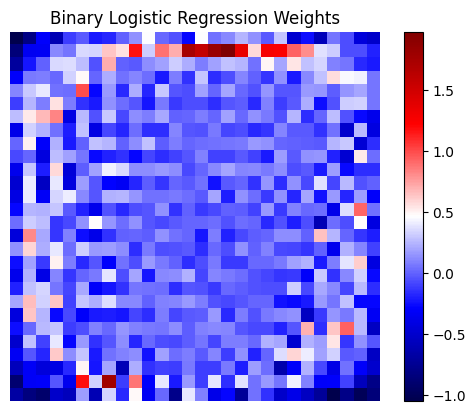

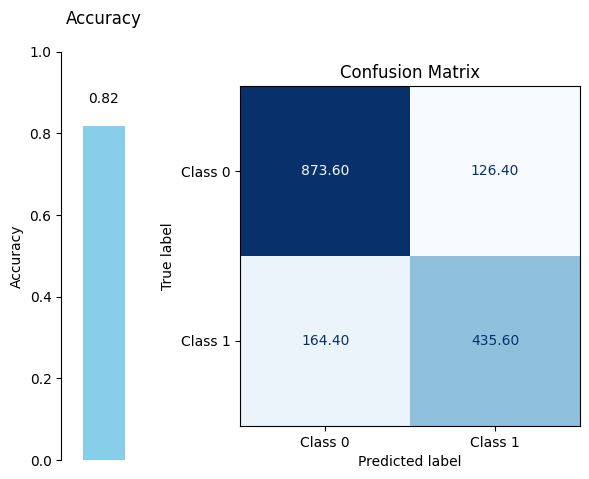

In [ ]:
with open('logisticBinaryModel.pkl', 'rb') as fid:
    logisticBinaryModel = pickle.load(fid)
with open('logisticBinaryData.pkl', 'rb') as fid:
    logisticBinaryData = pickle.load(fid)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

weights = logisticBinaryModel.coef_[0]
weight_image = weights.reshape(28, 28)

plt.imshow(weight_image, cmap='seismic')
plt.colorbar()
plt.title("Binary Logistic Regression Weights")
plt.axis('off')
plt.show()


binaryVisualizer(logisticBinaryData)

##Visualize Muliclass Logistic Regression

LogisticRegression(C=1, class_weight='balanced', max_iter=5000, solver='saga',
                   tol=0.001, verbose=1)
[[   0.6865    504.2       405.8        95.8       594.2     ]
 [   0.957    1458.6        27.4        41.4        72.6     ]
 [   0.948875 1453.4        35.2        46.6        64.8     ]
 [   0.8005   1252.6        71.8       247.4        28.2     ]
 [   0.89     1382.6        58.6       117.4        41.4     ]
 [   0.88325  1372.2        59.        127.8        41.      ]
 [   0.973125 1487.8        30.8        12.2        69.2     ]]


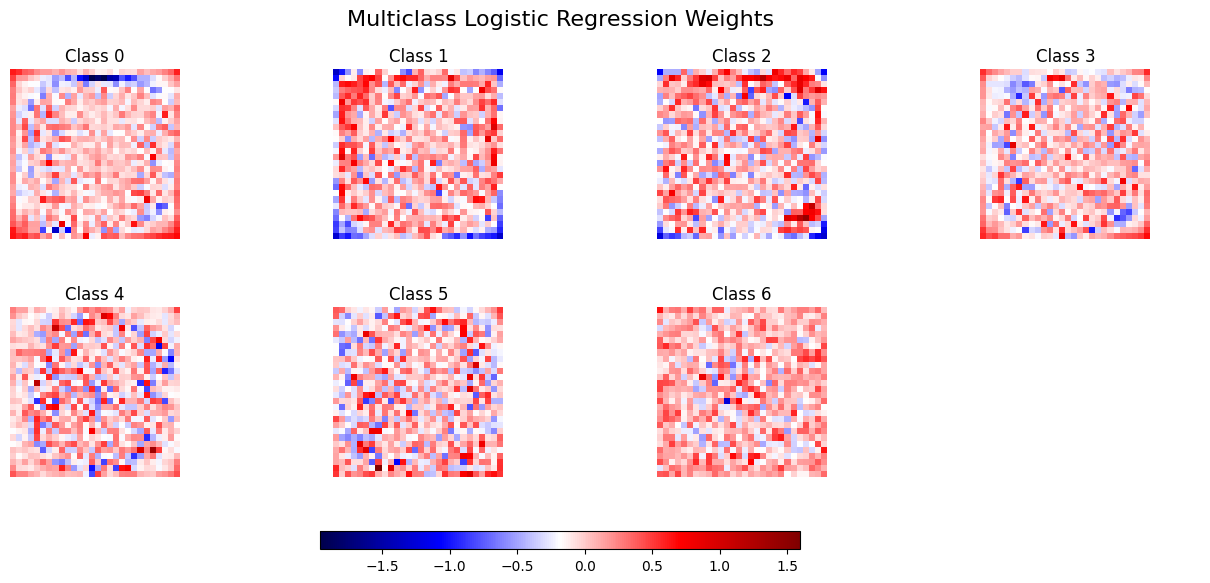

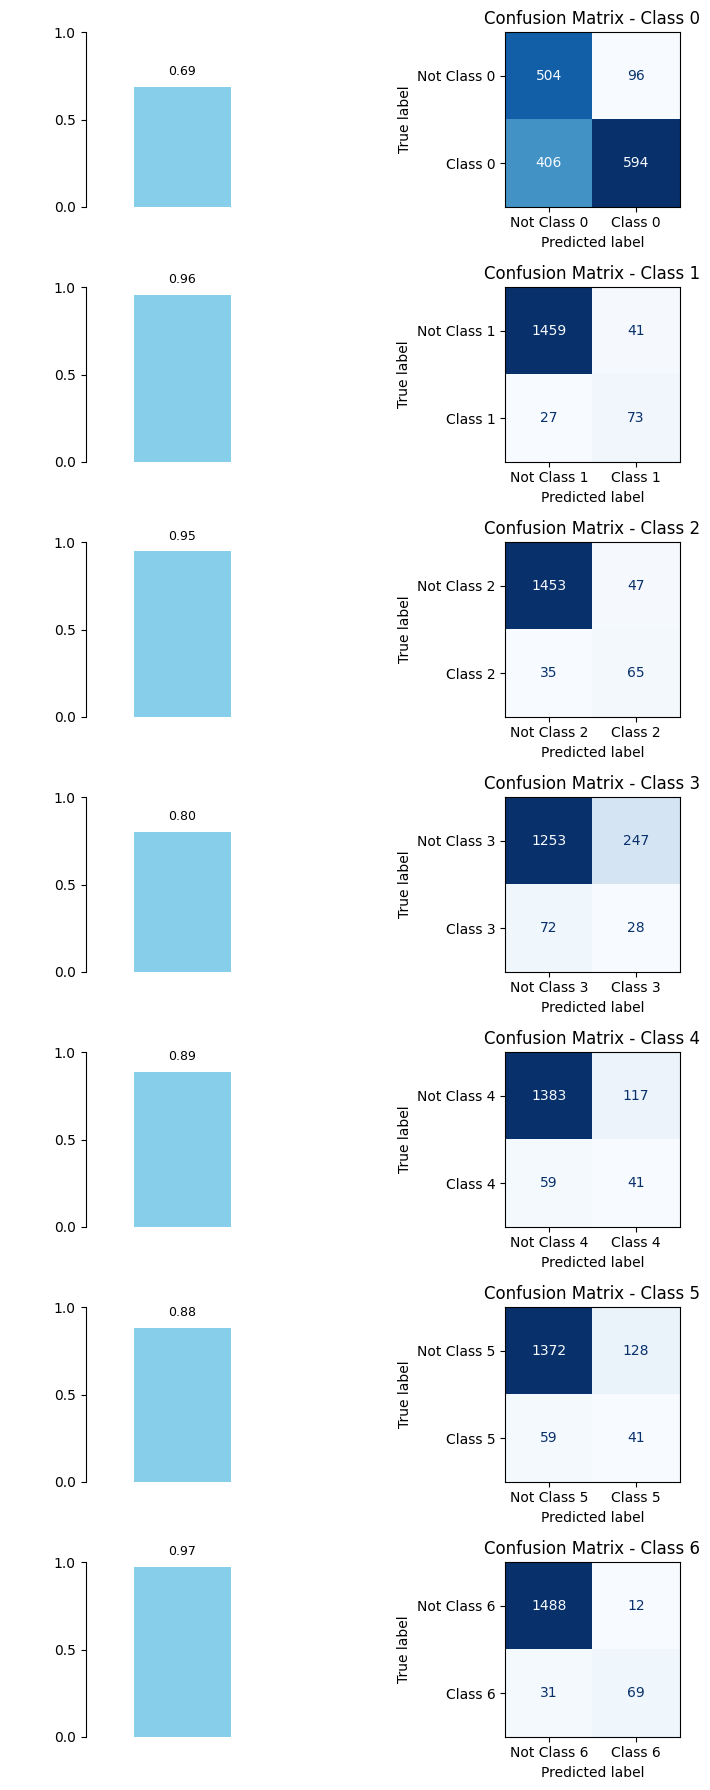

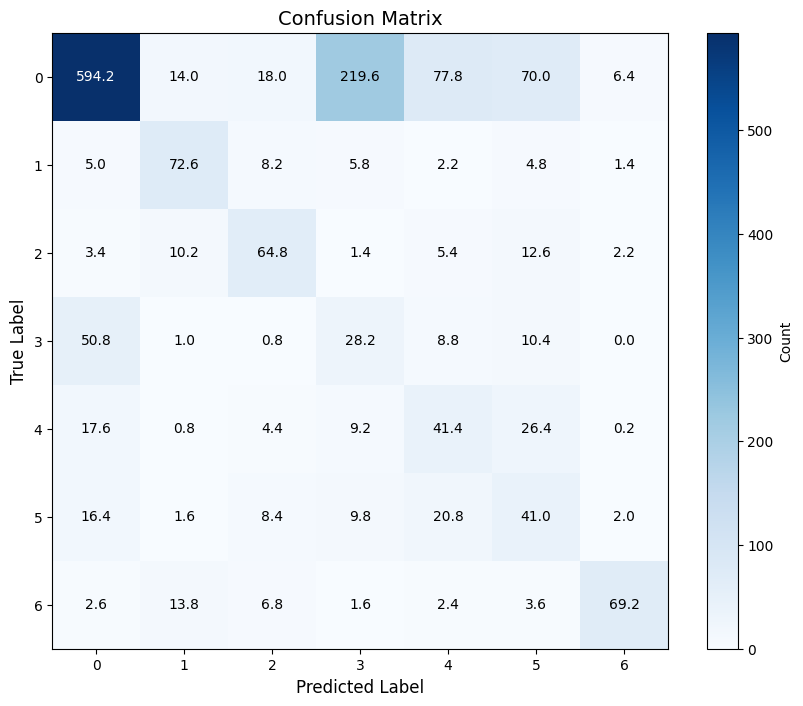

In [ ]:
with open('logisticClassModel.pkl', 'rb') as fid:
    logisticClassModel = pickle.load(fid)
with open('logisticMulticlassData.pkl', 'rb') as fid:
    logisticMulticlassData = pickle.load(fid)
with open('logisticMulticlassDataCm.pkl', 'rb') as fid:
    logisticMulticlassDataCm = pickle.load(fid)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print(logisticClassModel)
print(logisticMulticlassData)

import numpy as np

fig, axes = plt.subplots(2, 4, figsize=(16, 6))

vmin = np.min(logisticClassModel.coef_)
vmax = np.max(logisticClassModel.coef_)

for i in range(7):
    row = i // 4
    col = i % 4
    weights = logisticClassModel.coef_[i]
    weight_image = weights.reshape(28, 28)

    ax = axes[row, col]
    im = ax.imshow(weight_image, cmap='seismic', vmin=vmin, vmax=vmax)
    ax.set_title(f"Class {i}")
    ax.axis('off')

axes[1, 3].axis('off')  # Hide the extra one

# Manual colorbar placement
cbar_ax = fig.add_axes([0.35, 0.08, 0.3, 0.03])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

# Adjust layout manually instead of using tight_layout
fig.subplots_adjust(hspace=0.4, bottom=0.2, top=0.88)

fig.suptitle("Multiclass Logistic Regression Weights", fontsize=16)
plt.show()

#####
multiclassVisualizer(logisticMulticlassData, logisticMulticlassDataCm)

##Visualize Binary Kmeans

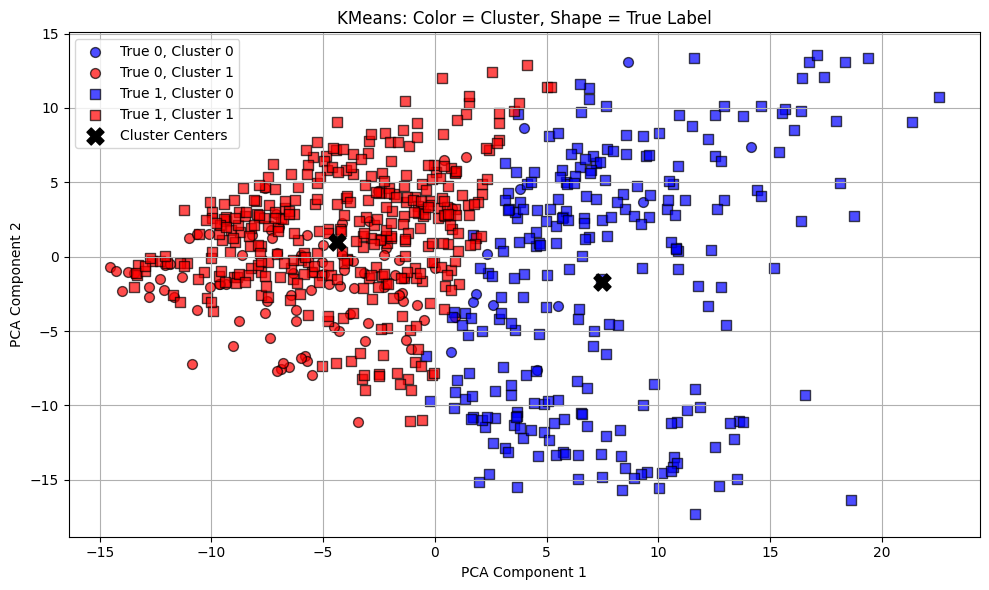

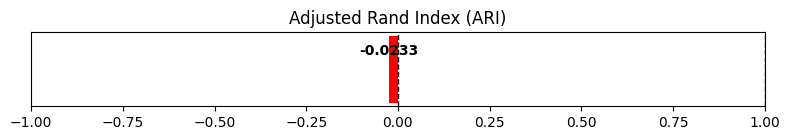

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle

# --- Step 1: Recreate trainingDataBinaryK ---
class_0_indices = trainingDataBinary[trainingDataBinary['True/Perturbed'] == 0].index
drop_indices = class_0_indices.to_series().sample(n=3600, random_state=42)
df_balanced1 = trainingDataBinary.drop(index=drop_indices).reset_index(drop=True)

class_0_indices = testingDataBinary[testingDataBinary['True/Perturbed'] == 0].index
drop_indices = class_0_indices.to_series().sample(n=900, random_state=42)
trainingDataBinaryK = testingDataBinary.drop(index=drop_indices).reset_index(drop=True)

# --- Step 2: Normalize and PCA ---
X = np.array([classifierNormalize(trainingDataBinaryK.iloc[i, 2:].values) for i in range(trainingDataBinaryK.shape[0])])
y_true = trainingDataBinaryK['True/Perturbed'].values

pca_150 = PCA(n_components=150)
X_150 = pca_150.fit_transform(X)

# --- Step 3: Load KMeans and Predict ---
with open('kmeansBinaryModel.pkl', 'rb') as fid:
    kmeansBinaryModel = pickle.load(fid)

y_pred = kmeansBinaryModel.predict(X_150)

# --- Step 4: Reduce to 2D for plotting ---
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_150)
centers_2d = pca_2d.transform(kmeansBinaryModel.cluster_centers_)

# --- Step 5: Plot (color = cluster, shape = true label) ---
plt.figure(figsize=(10, 6))

# Define cluster colors
cluster_colors = ['blue', 'red']
# Define true label markers
true_markers = ['o', 's']  # 0 = circle, 1 = square

for true_label in [0, 1]:
    for cluster_id in [0, 1]:
        mask = (y_true == true_label) & (y_pred == cluster_id)
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1],
                    c=cluster_colors[cluster_id],
                    marker=true_markers[true_label],
                    label=f'True {true_label}, Cluster {cluster_id}',
                    edgecolor='k', alpha=0.7, s=50)

# Plot centroids
plt.scatter(centers_2d[:, 0], centers_2d[:, 1],
            c='black', s=150, marker='X', label='Cluster Centers')

plt.title("KMeans: Color = Cluster, Shape = True Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##########

with open('kmeansBinaryModelData.pkl', 'rb') as fid:
    kmeansBinaryModelData = pickle.load(fid)

#print(kmeansBinaryModelData)
# Setup
fig, ax = plt.subplots(figsize=(8, 1.5))

# Plot the ARI score
ax.barh([0], [kmeansBinaryModelData], color='red' if kmeansBinaryModelData < 0 else 'green', height=0.3)

# Formatting
ax.set_xlim(-1, 1)
ax.set_yticks([])
ax.set_xticks(np.linspace(-1, 1, 9))
ax.set_title("Adjusted Rand Index (ARI)")

# Add value label
ax.text(kmeansBinaryModelData, 0.05, f"{kmeansBinaryModelData:.4f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Threshold lines
ax.axvline(0, color='black', linestyle='--', linewidth=1)
ax.axvline(1, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

##Visualize Multiclass Kmeans

Unique clusters in y_pred: [0]
Cluster counts: [700   0   0   0   0   0   0]
Unique classes in y_true: [0 1 2 3 4 5 6]
Class counts: [100 100 100 100 100 100 100]
Explained variance ratio (PCA 2D): [9.6305555e-01 2.4795198e-04]
No points for True 0, Cluster 1
No points for True 0, Cluster 2
No points for True 0, Cluster 3
No points for True 0, Cluster 4
No points for True 0, Cluster 5
No points for True 0, Cluster 6
No points for True 1, Cluster 1
No points for True 1, Cluster 2
No points for True 1, Cluster 3
No points for True 1, Cluster 4
No points for True 1, Cluster 5
No points for True 1, Cluster 6
No points for True 2, Cluster 1
No points for True 2, Cluster 2
No points for True 2, Cluster 3
No points for True 2, Cluster 4
No points for True 2, Cluster 5
No points for True 2, Cluster 6
No points for True 3, Cluster 1
No points for True 3, Cluster 2
No points for True 3, Cluster 3
No points for True 3, Cluster 4
No points for True 3, Cluster 5
No points for True 3, Cluster 6
No p

<ipython-input-25-469a19e946aa>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cluster_colors = plt.cm.get_cmap('tab10', expected_clusters).colors  # ['blue', 'red', 'green', ...]


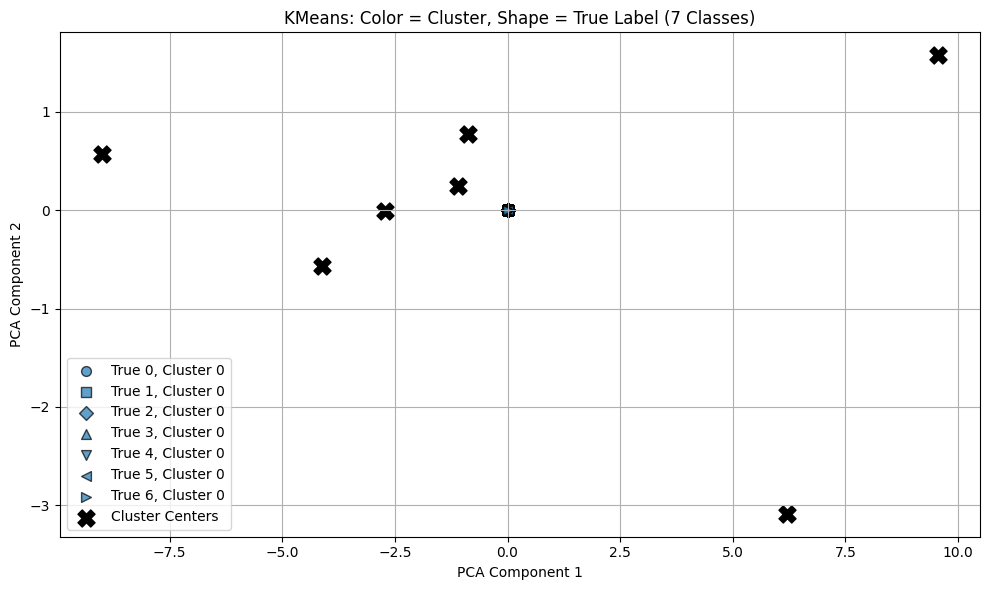

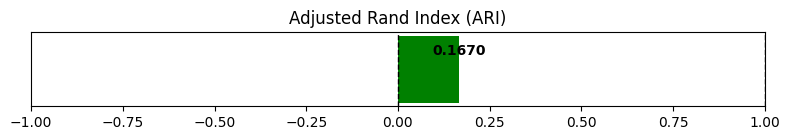

In [ ]:
#INCOMPLETE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#recreate training data
class_0_indices = trainingDataClass[trainingDataClass['Class'] == 0].index
drop_indices = class_0_indices.to_series().sample(n=3600, random_state=42)
df_balanced1 = trainingDataClass.drop(index=drop_indices).reset_index(drop=True)

class_0_indices = testingDataClass[testingDataClass['Class'] == 0].index
drop_indices = class_0_indices.to_series().sample(n=900, random_state=42)
trainingDataClassK = testingDataClass.drop(index=drop_indices).reset_index(drop=True)

#prepare data and PCA (Normalization Removed) ---
X = np.array([classifierNormalize(trainingDataClassK.iloc[:, 1:].values) for i in range(trainingDataClassK.shape[0])])  # Exclude 'Class' column
X = np.array([row.flatten() for row in X])
y_true = trainingDataClassK['Class'].values

#apply PCA (150 components)
pca_150 = PCA(n_components=150)
X_150 = pca_150.fit_transform(X)

with open('kmeansClassModel.pkl', 'rb') as fid:
    kmeansClassModel = pickle.load(fid)

expected_clusters = 7
if kmeansClassModel.n_clusters != expected_clusters:
    raise ValueError(f"KMeans model has {kmeansClassModel.n_clusters} clusters, expected {expected_clusters}")

y_pred = kmeansClassModel.predict(X_150)

# Debugging: Check cluster and class distributions
print("Unique clusters in y_pred:", np.unique(y_pred))
print("Cluster counts:", np.bincount(y_pred, minlength=expected_clusters))
print("Unique classes in y_true:", np.unique(y_true))
print("Class counts:", np.bincount(y_true, minlength=expected_clusters))

# --- Step 4: Reduce to 2D for plotting ---
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_150)
centers_2d = pca_2d.transform(kmeansClassModel.cluster_centers_)

# Check explained variance for 2D PCA
print("Explained variance ratio (PCA 2D):", pca_2d.explained_variance_ratio_)

# --- Step 5: Plot (color = cluster, shape = true label, styled like binary classifier) ---
plt.figure(figsize=(10, 6))

# Define cluster colors (7 distinct colors from tab10)
cluster_colors = plt.cm.get_cmap('tab10', expected_clusters).colors  # ['blue', 'red', 'green', ...]

# Define true label markers (7 distinct shapes)
true_markers = ['o', 's', 'D', '^', 'v', '<', '>']  # Circle, square, diamond, etc.

# Plot points for each true label and cluster combination
for true_label in range(expected_clusters):  # Classes 0 to 6
    for cluster_id in range(expected_clusters):  # Clusters 0 to 6
        mask = (y_true == true_label) & (y_pred == cluster_id)
        if np.any(mask):  # Only plot if there are points
            plt.scatter(X_2d[mask, 0], X_2d[mask, 1],
                        c=[cluster_colors[cluster_id]],  # Color by cluster
                        marker=true_markers[true_label],  # Shape by true label
                        label=f'True {true_label}, Cluster {cluster_id}',
                        edgecolor='k', alpha=0.7, s=50)
        else:
            print(f"No points for True {true_label}, Cluster {cluster_id}")

# Plot centroids
plt.scatter(centers_2d[:, 0], centers_2d[:, 1],
            c='black', s=150, marker='X', label='Cluster Centers')

plt.title("KMeans: Color = Cluster, Shape = True Label (7 Classes)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##########

with open('kmeansClassModelData.pkl', 'rb') as fid:
    kmeansClassModelData = pickle.load(fid)

#print(kmeansBinaryModelData)
# Setup
fig, ax = plt.subplots(figsize=(8, 1.5))

# Plot the ARI score
ax.barh([0], [kmeansClassModelData], color='red' if kmeansClassModelData < 0 else 'green', height=0.3)

# Formatting
ax.set_xlim(-1, 1)
ax.set_yticks([])
ax.set_xticks(np.linspace(-1, 1, 9))
ax.set_title("Adjusted Rand Index (ARI)")

# Add value label
ax.text(kmeansClassModelData, 0.05, f"{kmeansClassModelData:.4f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Threshold lines
ax.axvline(0, color='black', linestyle='--', linewidth=1)
ax.axvline(1, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

##Visualize Binary Random Forest

NameError: name 'binaryVisualizer' is not defined

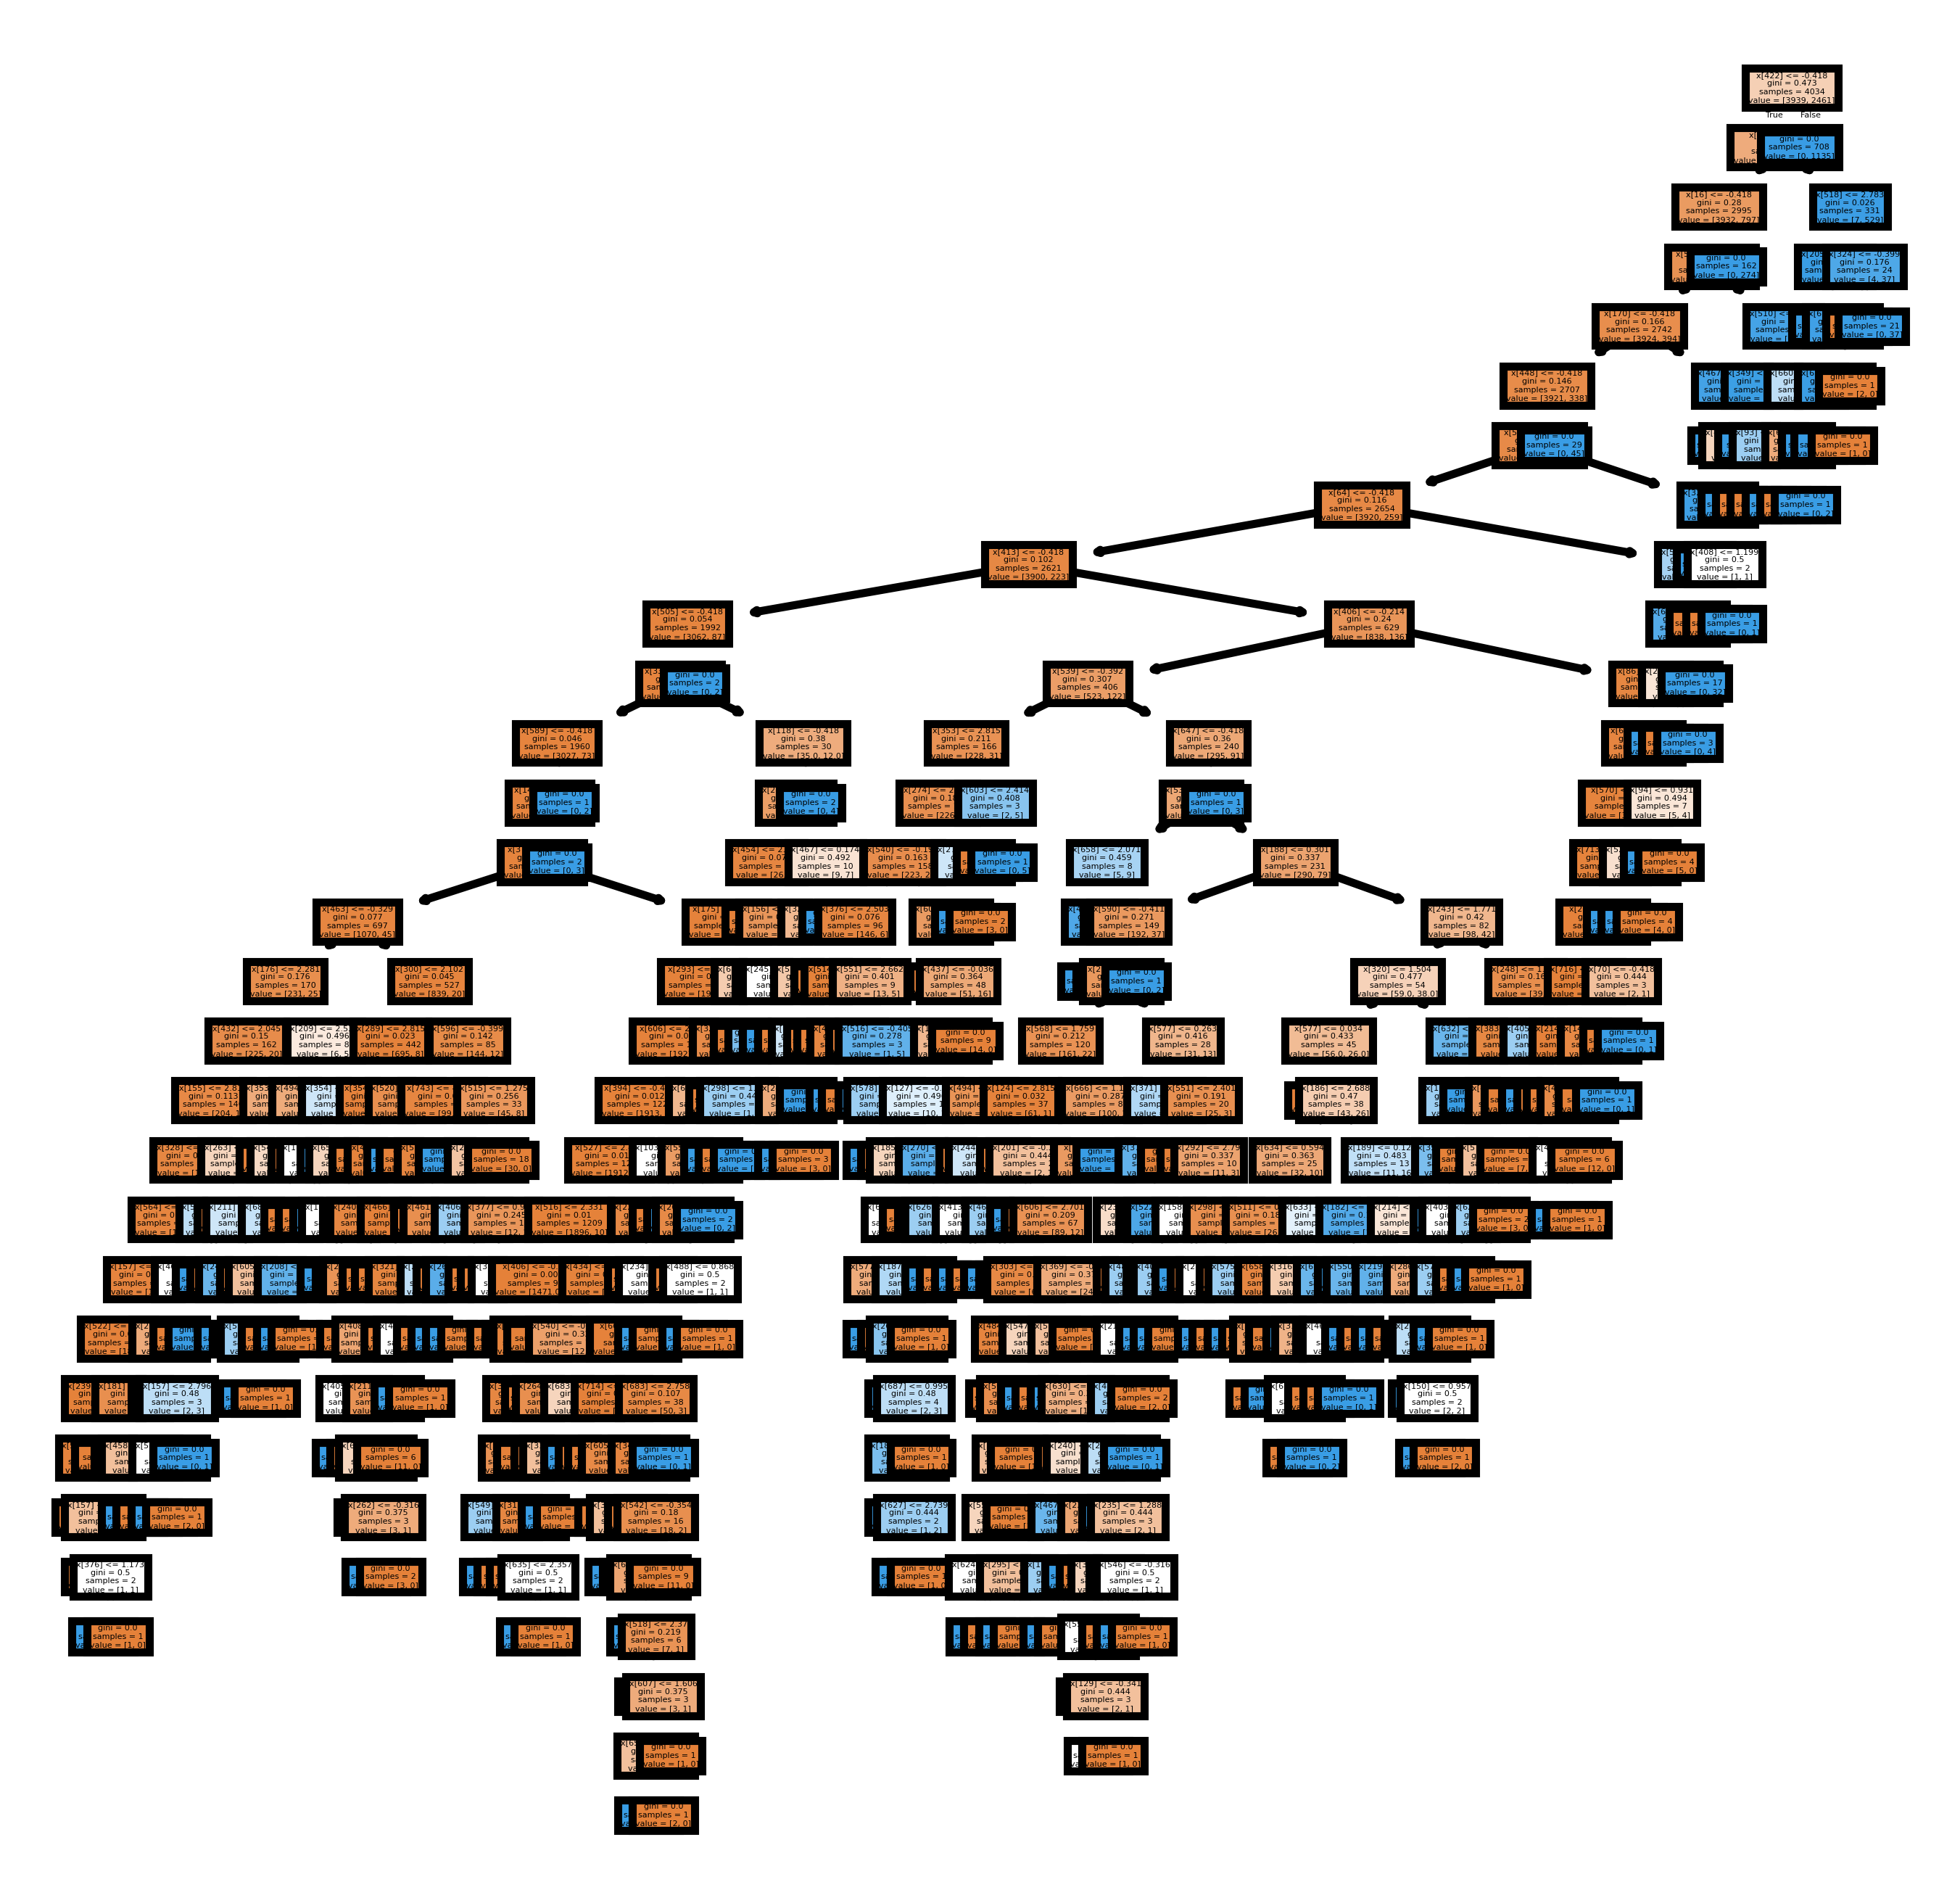

In [ ]:
with open('randomForestBinaryModel.pkl', 'rb') as fid:
    randomForestBinaryModel = pickle.load(fid)
with open('randomForestBinaryData.pkl', 'rb') as fid:
    randomForestBinaryData = pickle.load(fid)



from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(randomForestBinaryModel.estimators_[0],
               filled = True);
fig.savefig('rf_individualtree.png')

binaryVisualizer(randomForestBinaryData)

##Visualize Multiclass Random Forest

NameError: name 'randomForestMulticlassDataCm' is not defined

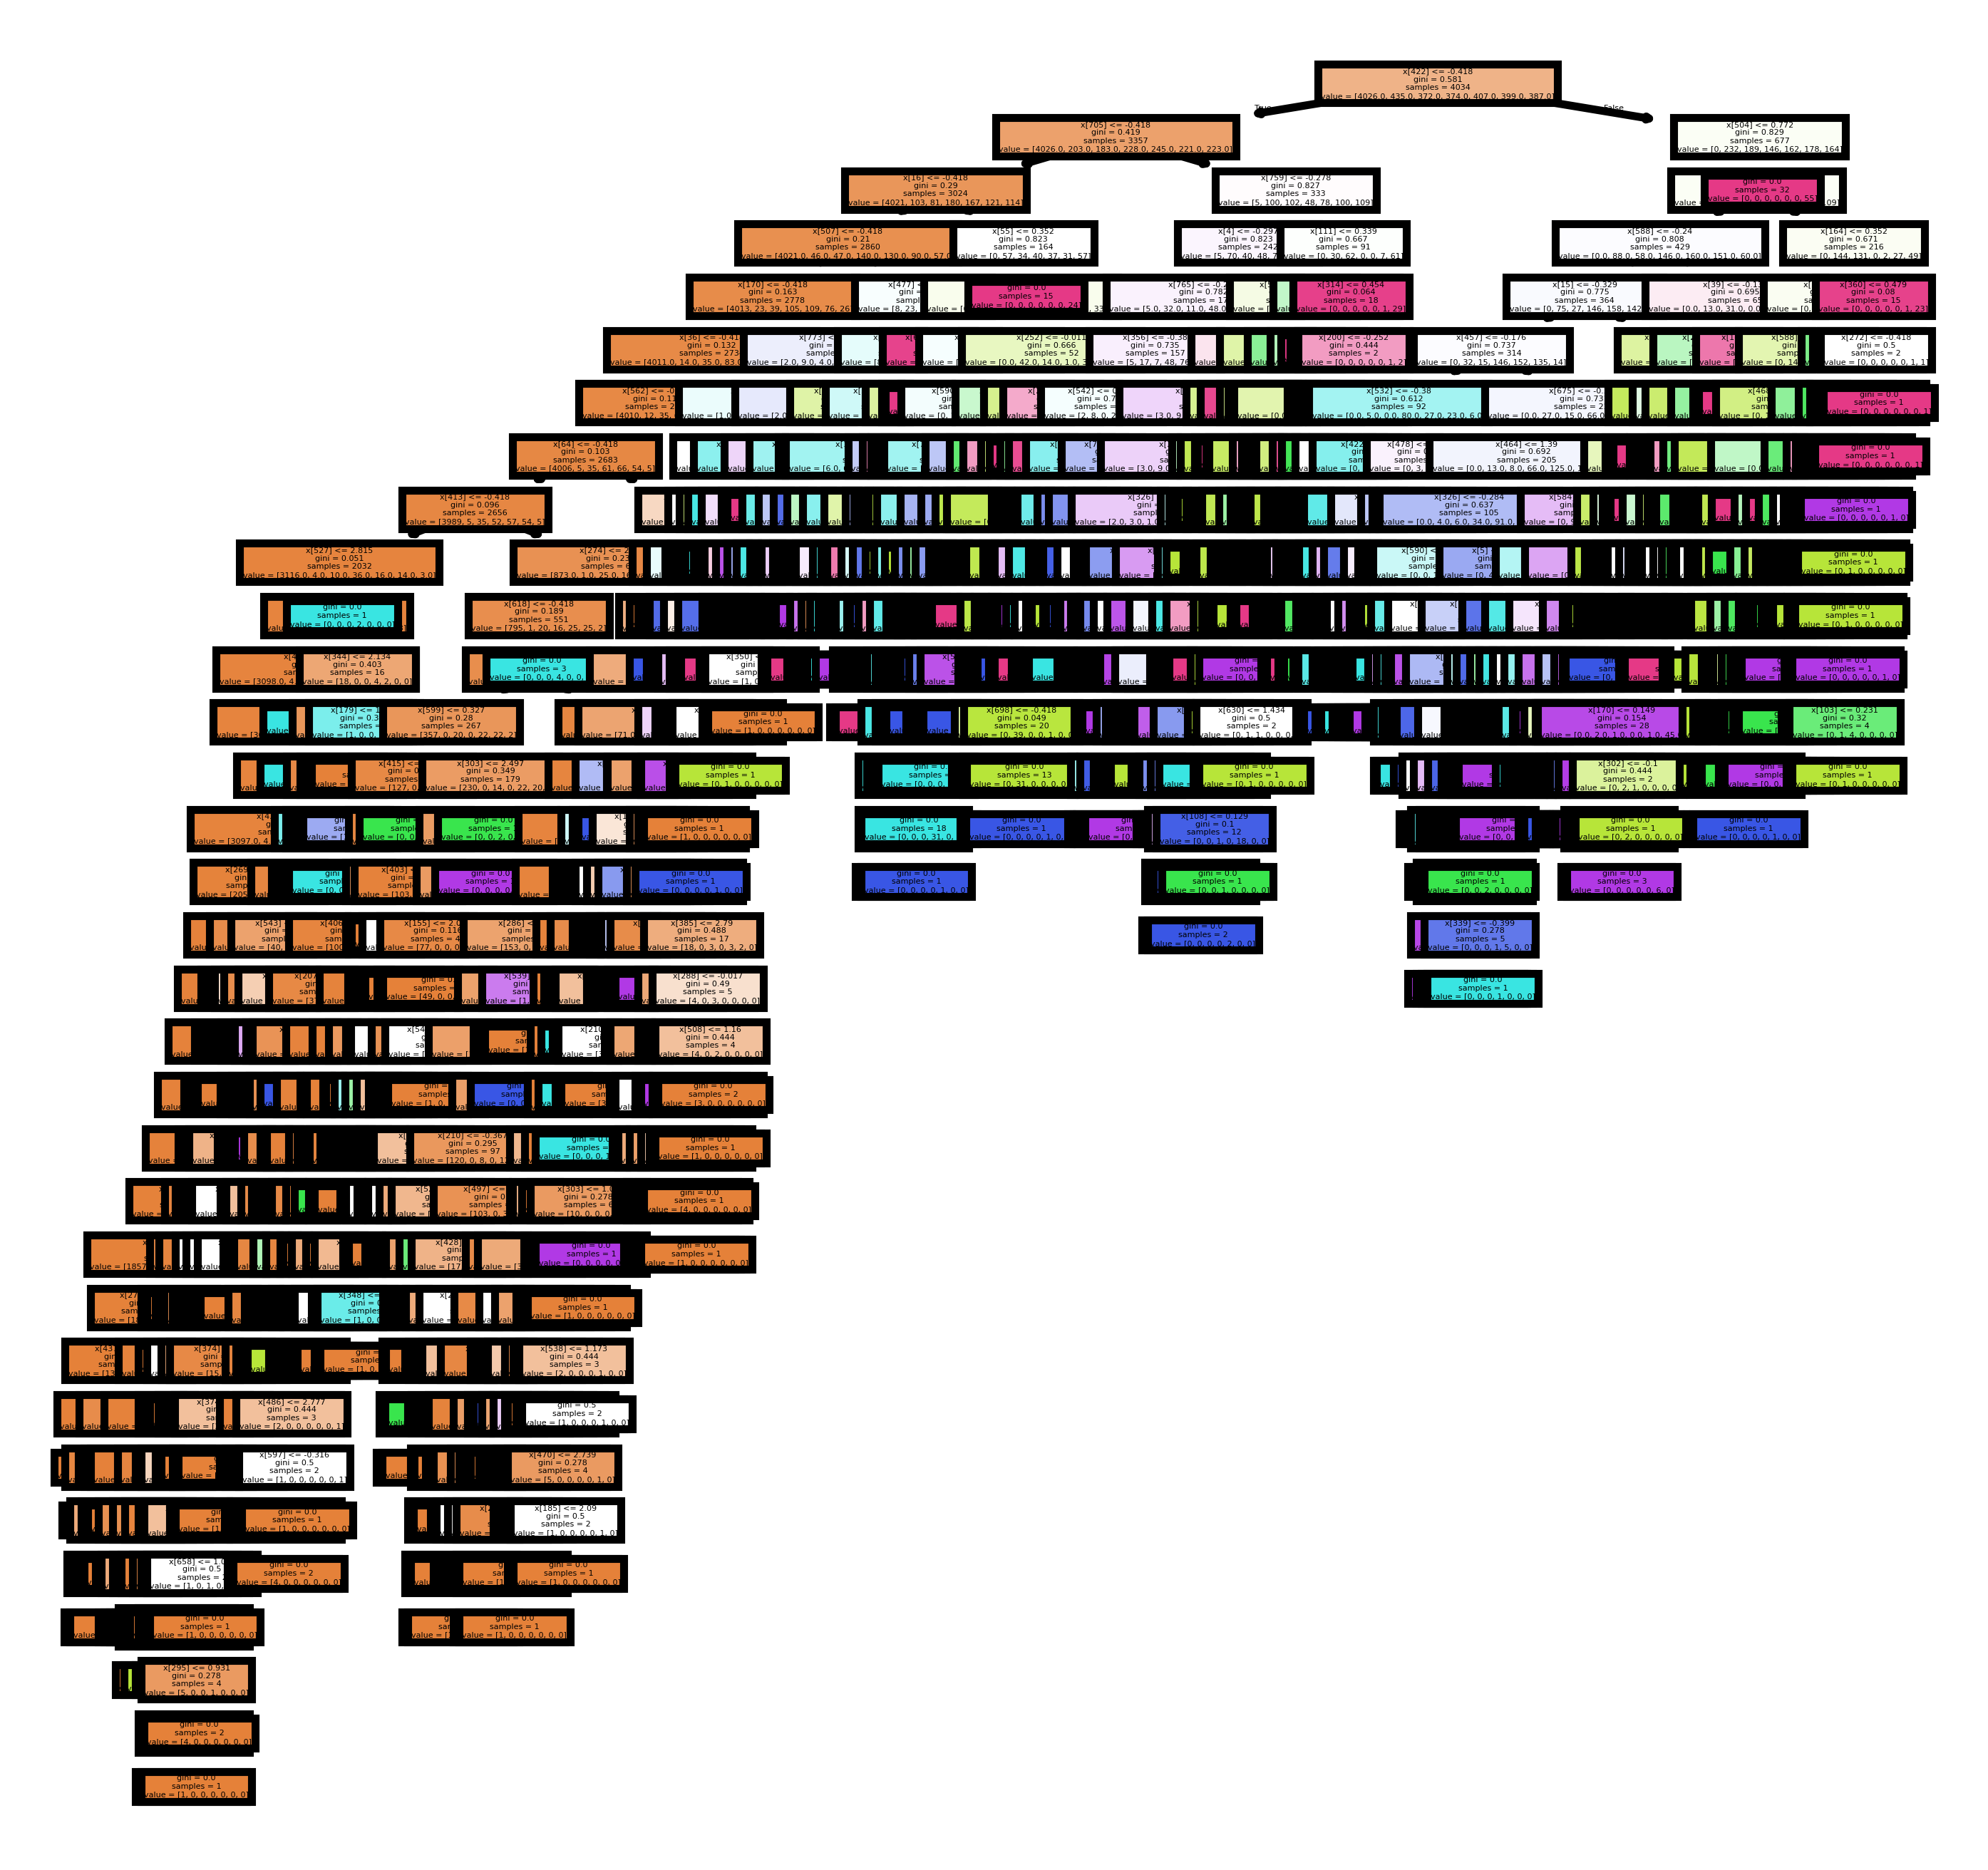

In [ ]:
with open('randomForestClassModel.pkl', 'rb') as fid:
    randomForestClassModel = pickle.load(fid)
with open('randomForestMulticlassData.pkl', 'rb') as fid:
    randomForestMulticlassData = pickle.load(fid)
#with open('randomForestMulticlassDataCm.pkl', 'rb') as fid:
 #   randomForestMulticlassDataCm = pickle.load(fid)

from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(randomForestClassModel.estimators_[0],
               filled = True);
fig.savefig('rf_individualtree.png')

multiclassVisualizer(randomForestMulticlassData, randomForestMulticlassDataCm)

##Visualize Binary Convolutional Neural Network

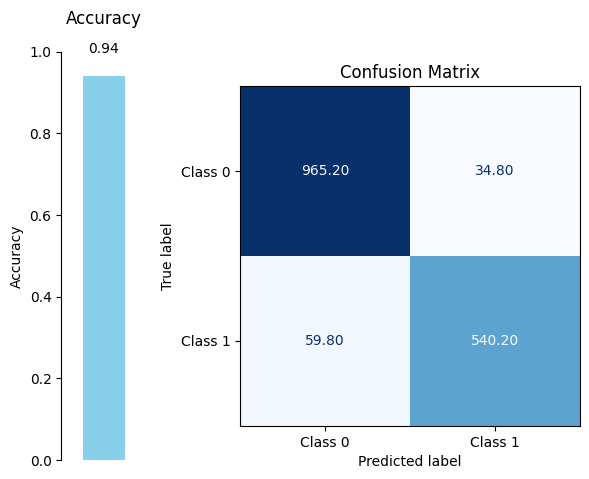

In [ ]:
with open('cnnBinaryModel.pkl', 'rb') as fid:
    cnnBinaryModel = pickle.load(fid)
with open('cnnBinaryData.pkl', 'rb') as fid:
    cnnBinaryData = pickle.load(fid)

binaryVisualizer(cnnBinaryData)

Model loaded successfully


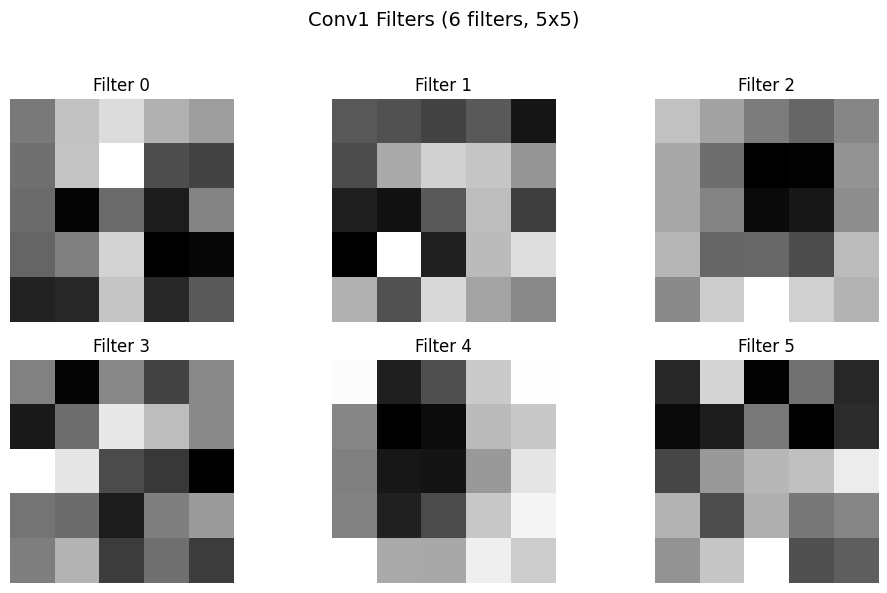

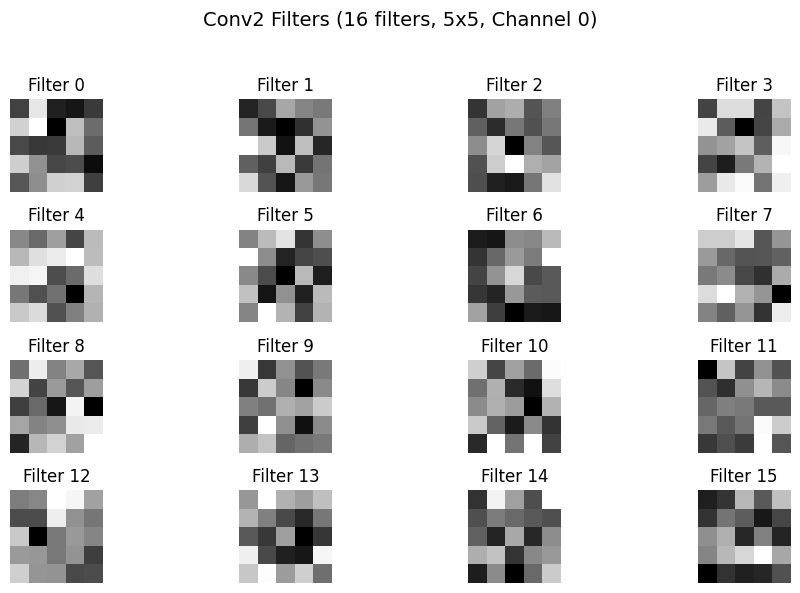

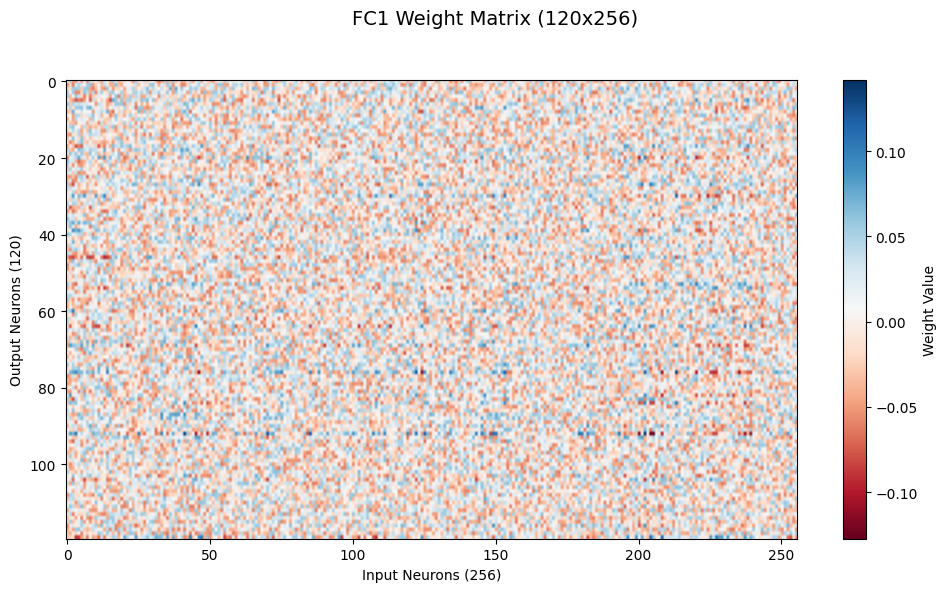

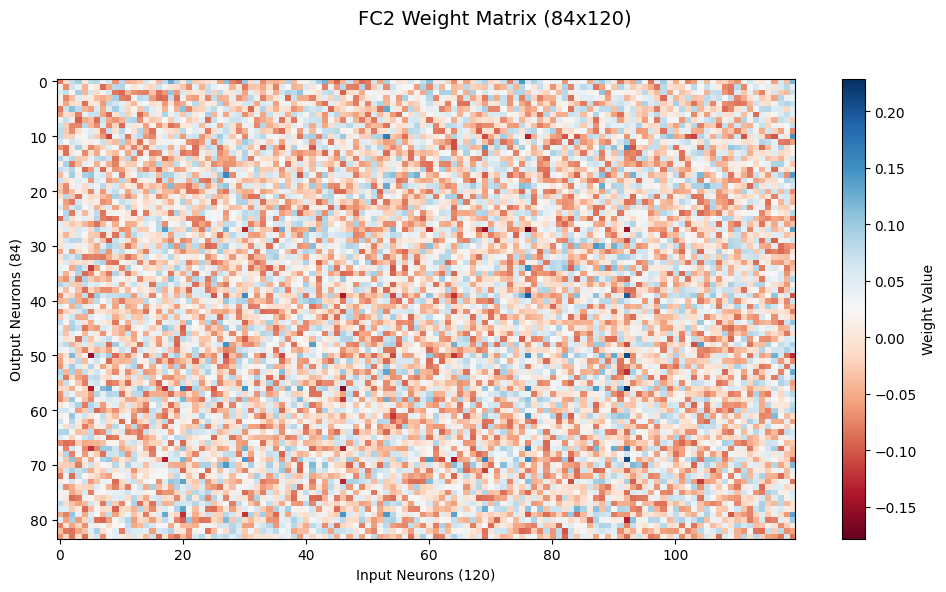

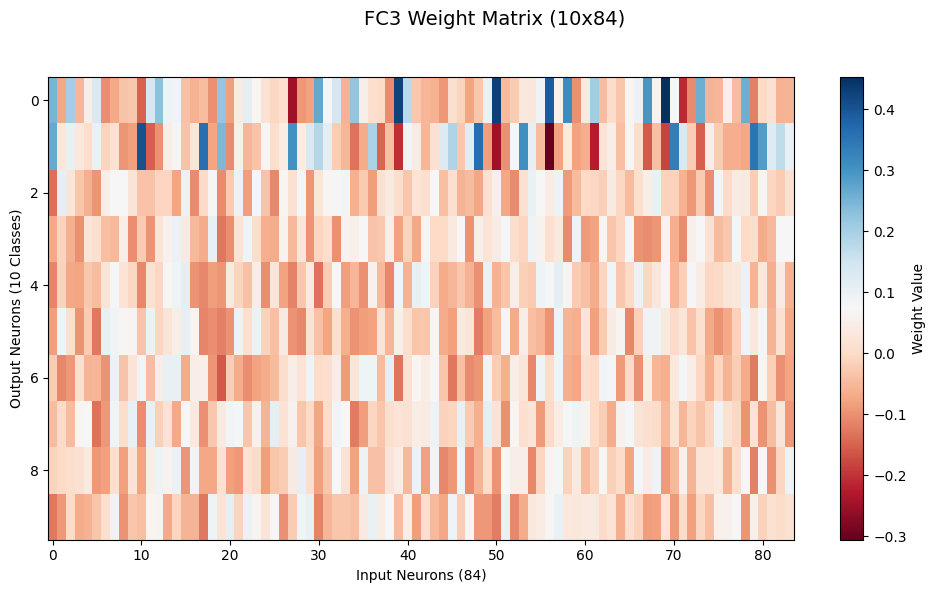

Sample image label: 9


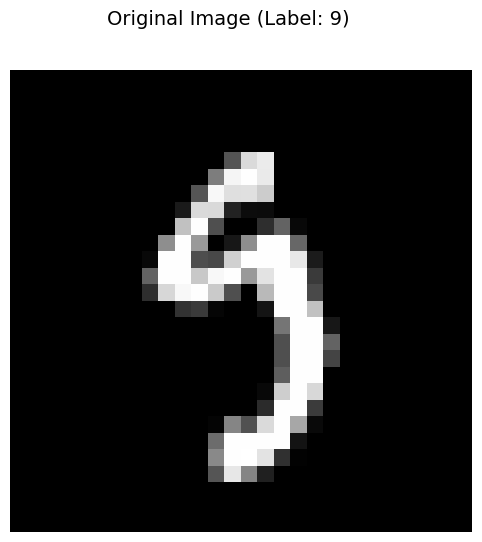

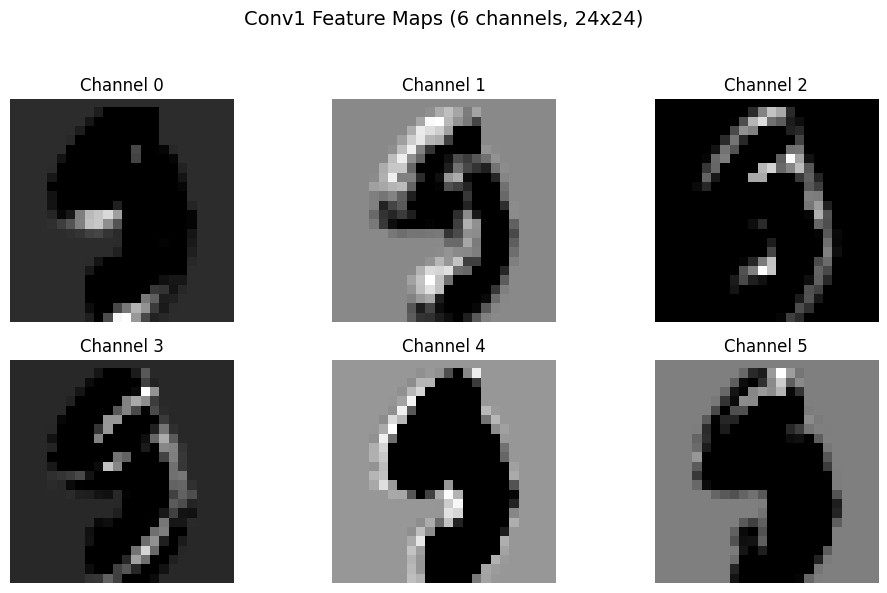

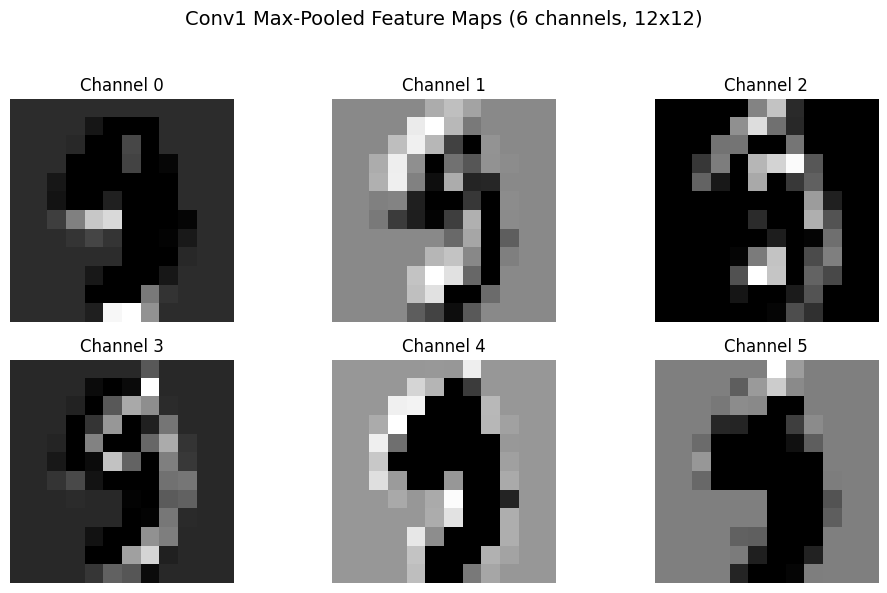

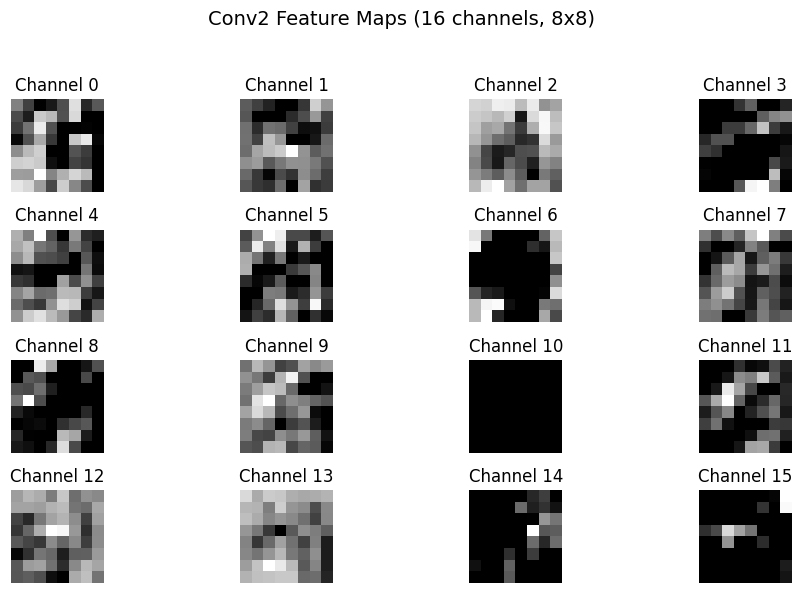

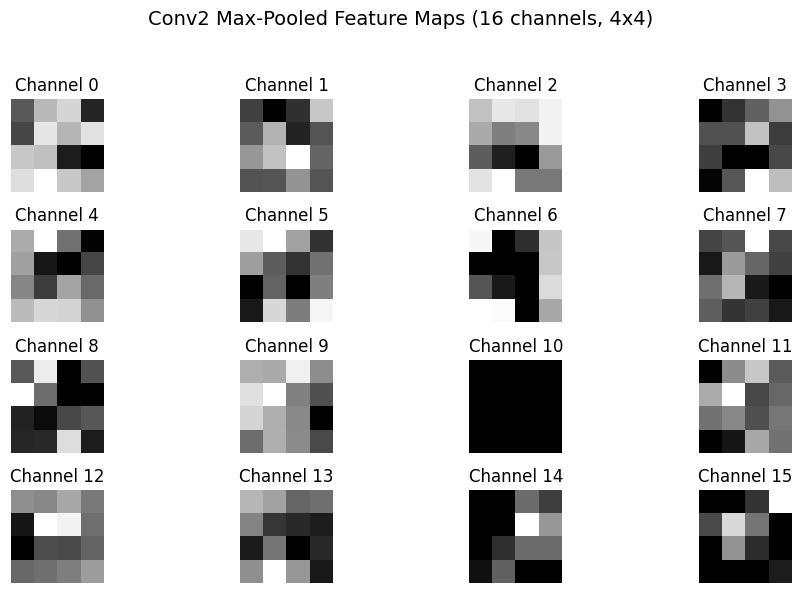

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from torch.utils.data import DataLoader, TensorDataset

# --- Step 1: Load the Trained Model ---
model = cnnBinaryModel
model.eval()  # Set to evaluation mode
print("Model loaded successfully")

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# --- Step 2: Load MNIST Test Data for Feature Maps ---
try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
except FileNotFoundError:
    print("mnist_test.pkl not found. Please ensure the file exists.")
    exit(1)

# Normalize test data (same as training)
mnist_mean = 0.1307
mnist_std = 0.3081
X_test = mnist_test.iloc[:, 1:].values.astype(np.float32) / 255.0
X_test = (X_test - mnist_mean) / mnist_std
X_test = X_test.reshape(-1, 1, 28, 28)  # Shape: [n_samples, 1, 28, 28]
y_test = mnist_test.iloc[:, 0].values.astype(np.int64)

# Create DataLoader for a single sample
test_dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# --- Step 3: Visualize Convolutional Filters ---
# Extract weights
conv1_filters = model.conv1.weight.detach().cpu().numpy()  # Shape: [6, 1, 5, 5]
conv2_filters = model.conv2.weight.detach().cpu().numpy()  # Shape: [16, 6, 5, 5]

# Plot conv1 filters (6 filters)
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Filters (6 filters, 5x5)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    filter_img = conv1_filters[i, 0]  # Shape: [5, 5]
    plt.imshow(filter_img, cmap='gray')
    plt.title(f"Filter {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 filters (16 filters, show first channel)
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Filters (16 filters, 5x5, Channel 0)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    filter_img = conv2_filters[i, 0]  # Shape: [5, 5]
    plt.imshow(filter_img, cmap='gray')
    plt.title(f"Filter {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Step 4: Visualize Fully Connected Layer Weights ---
# Extract weights
fc1_weights = model.fc1.weight.detach().cpu().numpy()  # Shape: [120, 256]
fc2_weights = model.fc2.weight.detach().cpu().numpy()  # Shape: [84, 120]
fc3_weights = model.fc3.weight.detach().cpu().numpy()  # Shape: [10, 84]

# Plot fc1 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC1 Weight Matrix (120x256)", fontsize=14)
plt.imshow(fc1_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (256)")
plt.ylabel("Output Neurons (120)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot fc2 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC2 Weight Matrix (84x120)", fontsize=14)
plt.imshow(fc2_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (120)")
plt.ylabel("Output Neurons (84)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot fc3 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC3 Weight Matrix (10x84)", fontsize=14)
plt.imshow(fc3_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (84)")
plt.ylabel("Output Neurons (10 Classes)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Step 5: Visualize Feature Maps for a Sample Image ---
# Get a single test image
data_iter = iter(test_loader)
sample_image, sample_label = next(data_iter)
sample_image = sample_image.to(device)  # Shape: [1, 1, 28, 28]
sample_label = sample_label.item()
print(f"Sample image label: {sample_label}")

# Forward pass through conv1 and conv2
with torch.no_grad():
    c1 = F.relu(model.conv1(sample_image))  # Shape: [1, 6, 24, 24]
    s2 = F.max_pool2d(c1, (2, 2))  # Shape: [1, 6, 12, 12]
    c3 = F.relu(model.conv2(s2))  # Shape: [1, 16, 8, 8]
    s4 = F.max_pool2d(c3, 2)  # Shape: [1, 16, 4, 4]

# Move to CPU and convert to numpy
c1 = c1.cpu().numpy().squeeze(0)  # Shape: [6, 24, 24]
s2 = s2.cpu().numpy().squeeze(0)  # Shape: [6, 12, 12]
c3 = c3.cpu().numpy().squeeze(0)  # Shape: [16, 8, 8]
s4 = s4.cpu().numpy().squeeze(0)  # Shape: [16, 4, 4]

# Plot original image
plt.figure(figsize=(10, 6))
plt.suptitle(f"Original Image (Label: {sample_label})", fontsize=14)
plt.imshow(sample_image.cpu().numpy().squeeze(), cmap='gray')
plt.axis('off')
plt.show()

# Plot conv1 feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Feature Maps (6 channels, 24x24)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(c1[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv1 max-pooled feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Max-Pooled Feature Maps (6 channels, 12x12)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(s2[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Feature Maps (16 channels, 8x8)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(c3[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 max-pooled feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Max-Pooled Feature Maps (16 channels, 4x4)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(s4[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##Visualize Multiclass Convolutional Neural Network

Model loaded successfully


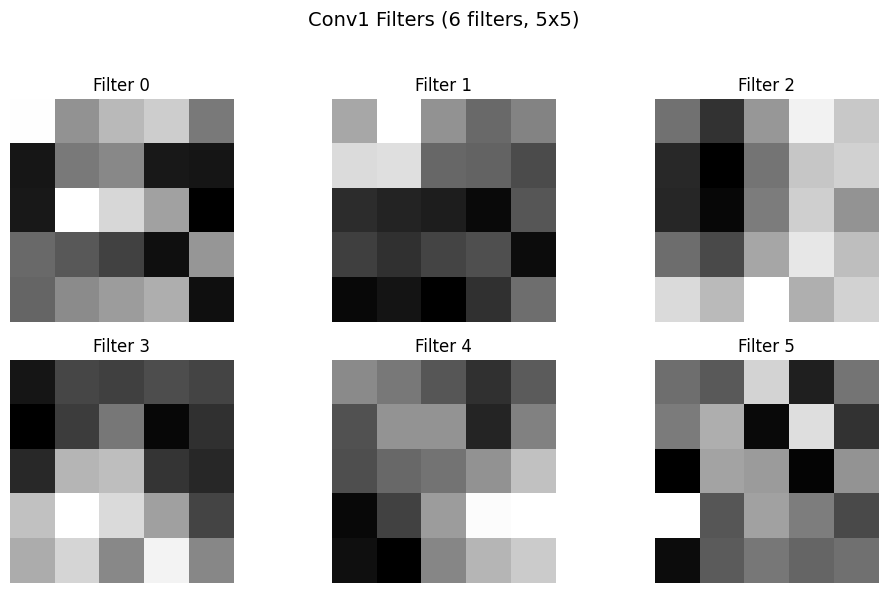

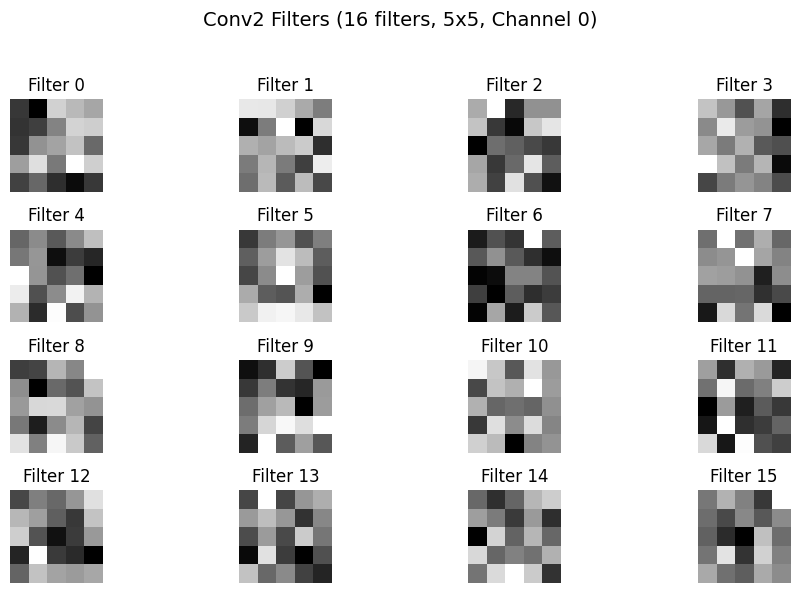

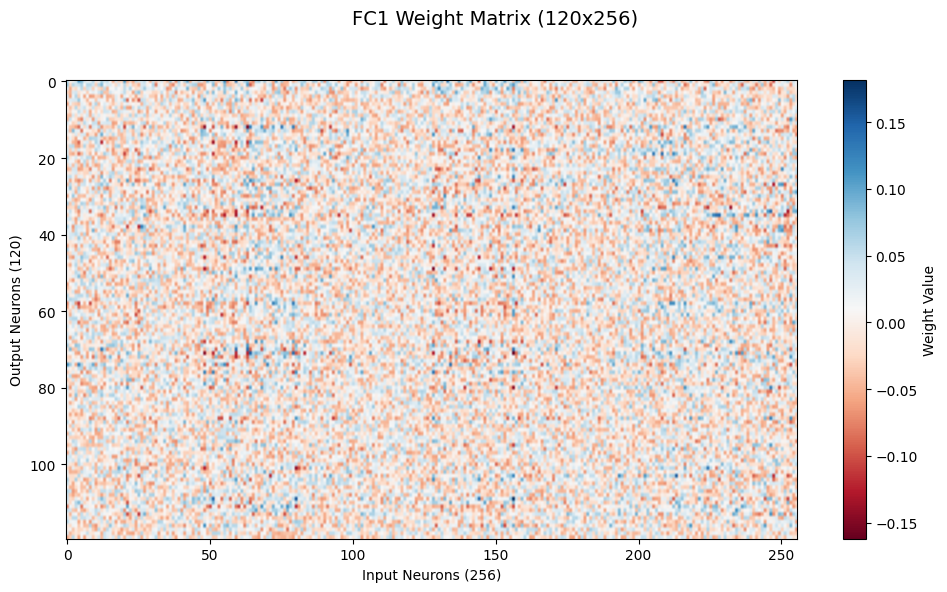

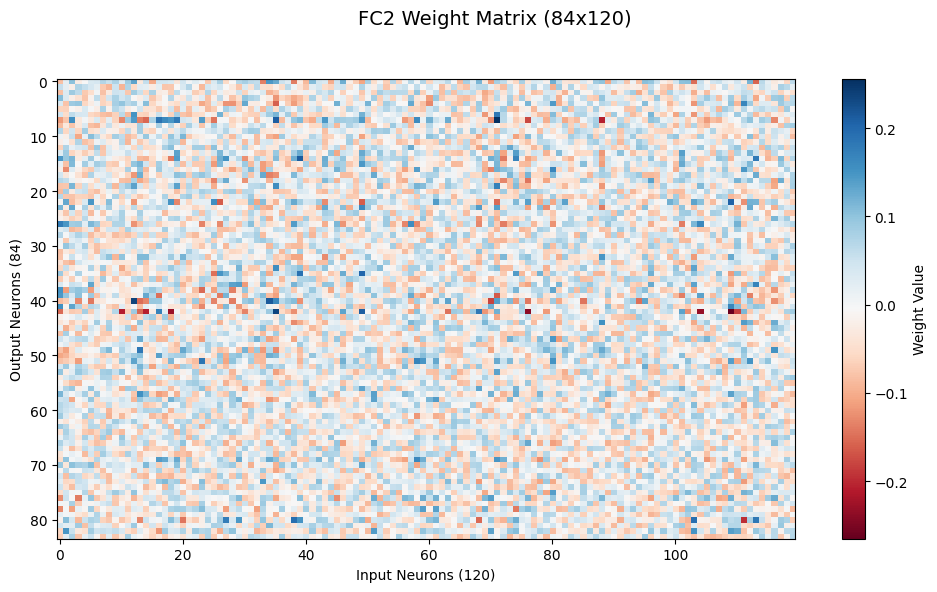

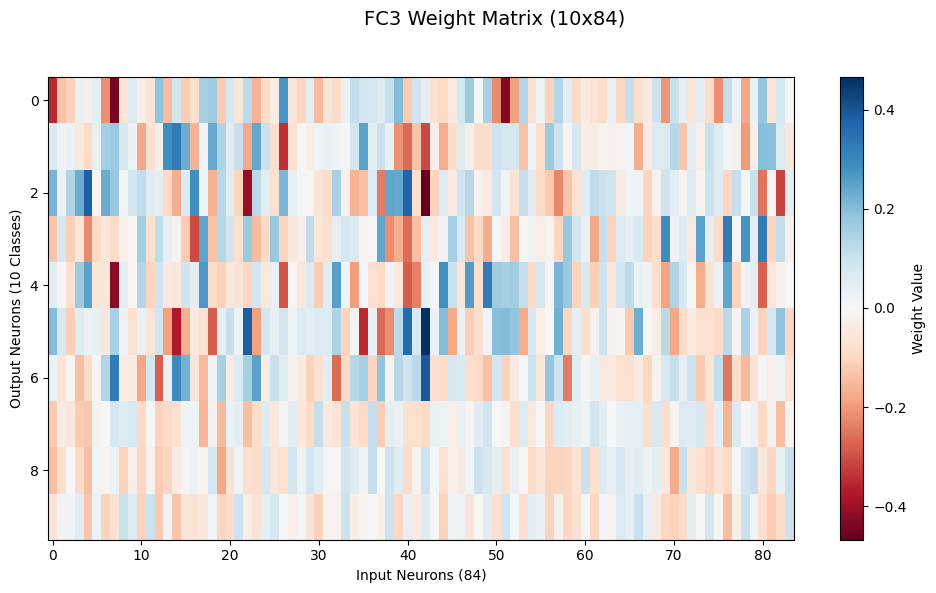

Sample image label: 5


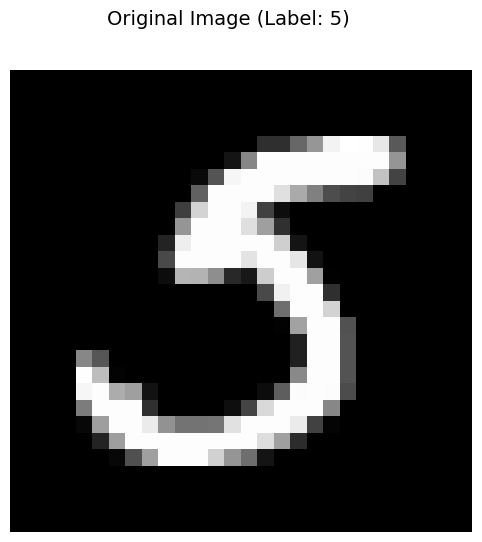

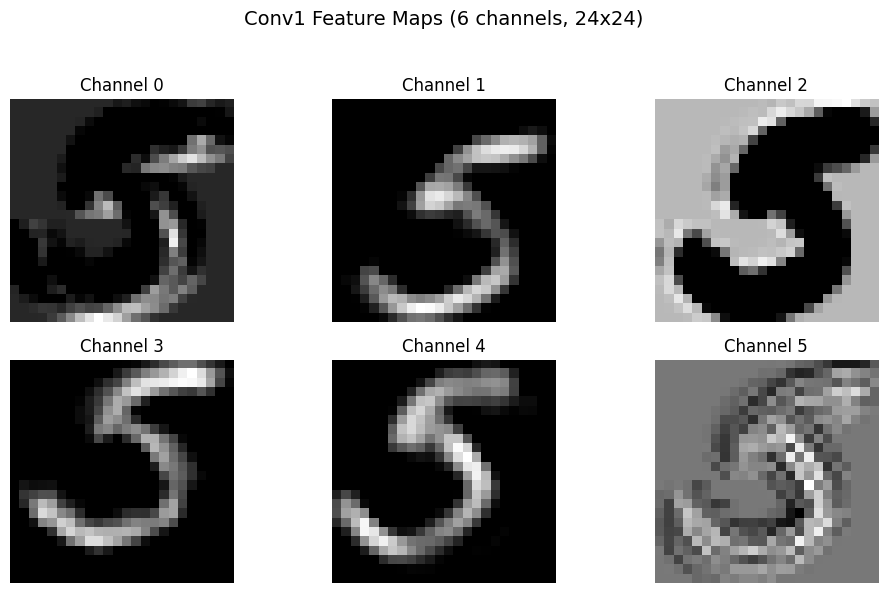

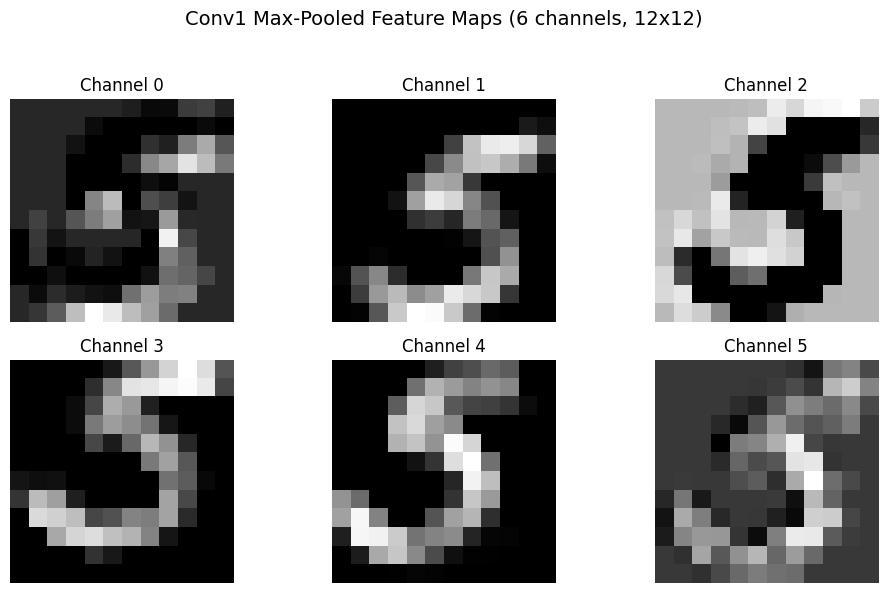

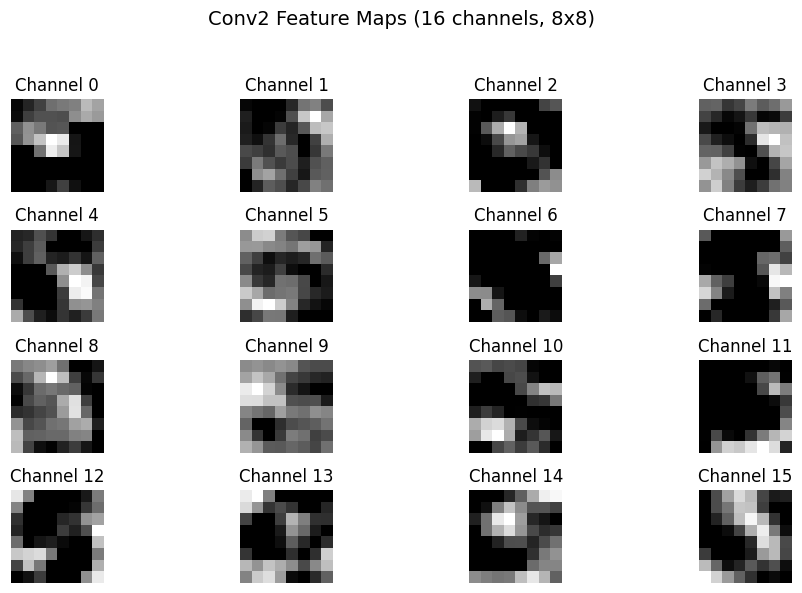

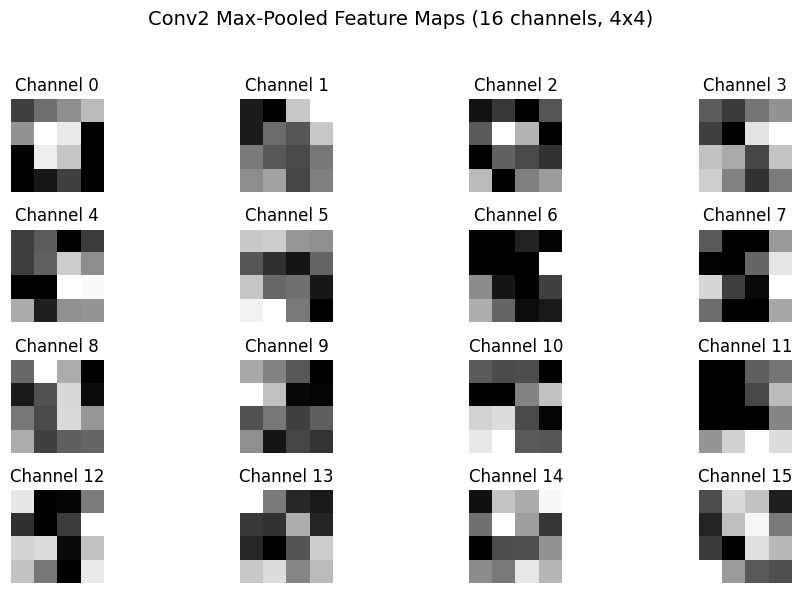

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from torch.utils.data import DataLoader, TensorDataset

# --- Step 1: Load the Trained Model ---
model = cnnClassModel
model.eval()  # Set to evaluation mode
print("Model loaded successfully")

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# --- Step 2: Load MNIST Test Data for Feature Maps ---
try:
    with open('mnist_test.pkl', 'rb') as fid:
        mnist_test = pickle.load(fid)
except FileNotFoundError:
    print("mnist_test.pkl not found. Please ensure the file exists.")
    exit(1)

# Normalize test data (same as training)
mnist_mean = 0.1307
mnist_std = 0.3081
X_test = mnist_test.iloc[:, 1:].values.astype(np.float32) / 255.0
X_test = (X_test - mnist_mean) / mnist_std
X_test = X_test.reshape(-1, 1, 28, 28)  # Shape: [n_samples, 1, 28, 28]
y_test = mnist_test.iloc[:, 0].values.astype(np.int64)

# Create DataLoader for a single sample
test_dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# --- Step 3: Visualize Convolutional Filters ---
# Extract weights
conv1_filters = model.conv1.weight.detach().cpu().numpy()  # Shape: [6, 1, 5, 5]
conv2_filters = model.conv2.weight.detach().cpu().numpy()  # Shape: [16, 6, 5, 5]

# Plot conv1 filters (6 filters)
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Filters (6 filters, 5x5)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    filter_img = conv1_filters[i, 0]  # Shape: [5, 5]
    plt.imshow(filter_img, cmap='gray')
    plt.title(f"Filter {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 filters (16 filters, show first channel)
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Filters (16 filters, 5x5, Channel 0)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    filter_img = conv2_filters[i, 0]  # Shape: [5, 5]
    plt.imshow(filter_img, cmap='gray')
    plt.title(f"Filter {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Step 4: Visualize Fully Connected Layer Weights ---
# Extract weights
fc1_weights = model.fc1.weight.detach().cpu().numpy()  # Shape: [120, 256]
fc2_weights = model.fc2.weight.detach().cpu().numpy()  # Shape: [84, 120]
fc3_weights = model.fc3.weight.detach().cpu().numpy()  # Shape: [10, 84]

# Plot fc1 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC1 Weight Matrix (120x256)", fontsize=14)
plt.imshow(fc1_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (256)")
plt.ylabel("Output Neurons (120)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot fc2 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC2 Weight Matrix (84x120)", fontsize=14)
plt.imshow(fc2_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (120)")
plt.ylabel("Output Neurons (84)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot fc3 weights
plt.figure(figsize=(10, 6))
plt.suptitle("FC3 Weight Matrix (10x84)", fontsize=14)
plt.imshow(fc3_weights, cmap='RdBu', aspect='auto')
plt.colorbar(label='Weight Value')
plt.xlabel("Input Neurons (84)")
plt.ylabel("Output Neurons (10 Classes)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Step 5: Visualize Feature Maps for a Sample Image ---
# Get a single test image
data_iter = iter(test_loader)
sample_image, sample_label = next(data_iter)
sample_image = sample_image.to(device)  # Shape: [1, 1, 28, 28]
sample_label = sample_label.item()
print(f"Sample image label: {sample_label}")

# Forward pass through conv1 and conv2
with torch.no_grad():
    c1 = F.relu(model.conv1(sample_image))  # Shape: [1, 6, 24, 24]
    s2 = F.max_pool2d(c1, (2, 2))  # Shape: [1, 6, 12, 12]
    c3 = F.relu(model.conv2(s2))  # Shape: [1, 16, 8, 8]
    s4 = F.max_pool2d(c3, 2)  # Shape: [1, 16, 4, 4]

# Move to CPU and convert to numpy
c1 = c1.cpu().numpy().squeeze(0)  # Shape: [6, 24, 24]
s2 = s2.cpu().numpy().squeeze(0)  # Shape: [6, 12, 12]
c3 = c3.cpu().numpy().squeeze(0)  # Shape: [16, 8, 8]
s4 = s4.cpu().numpy().squeeze(0)  # Shape: [16, 4, 4]

# Plot original image
plt.figure(figsize=(10, 6))
plt.suptitle(f"Original Image (Label: {sample_label})", fontsize=14)
plt.imshow(sample_image.cpu().numpy().squeeze(), cmap='gray')
plt.axis('off')
plt.show()

# Plot conv1 feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Feature Maps (6 channels, 24x24)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(c1[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv1 max-pooled feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv1 Max-Pooled Feature Maps (6 channels, 12x12)", fontsize=14)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(s2[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Feature Maps (16 channels, 8x8)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(c3[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Plot conv2 max-pooled feature maps
plt.figure(figsize=(10, 6))
plt.suptitle("Conv2 Max-Pooled Feature Maps (16 channels, 4x4)", fontsize=14)
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(s4[i], cmap='gray')
    plt.title(f"Channel {i}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#Sources
https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/

https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

https://medium.com/machine-intelligence-and-deep-learning-lab/a-review-of-deepfool-a-simple-and-accurate-method-to-fool-deep-neural-networks-b016fba9e48e

https://medium.com/@zachariaharungeorge/adversarial-attacks-with-carlini-wagner-approach-8307daa9a503

https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

https://gist.github.com/bveliqi/61d1a77221f3faaaee7660a9badf552f